<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div>

# Artificial Intelligence - MSc

## ED5005 - Project and Dissertation SEM 2023_4

### Title: "The AI Augmented Underwriter - Integrating unsupervised learning for an understandable approach to predictive insurance underwriting."

* "Integrating unsupervised learning techniques for an interpretable, explainable approach to predictive insurance underwriting."
* "Integrating unsupervised and supervised learning with human-in-the-loop to increase interpretability and explainability in predictive underwriting"
* "Integrating unsupervised and supervised learning with human-in-the-loop as an explainable approach to augmented underwriting in Life Insurance"
* "Integrating Unsupervised Learning and Human-in-the-Loop for Explainable Predictive Modelling in Life Insurance Underwriting"

***
### Supervisor: Martin Cunneen
### Student Name: Paul Trayers</span>
### Student ID: 8907021</span>
### Date of Final Submission: Aug 4th 2024</span>

<br><br>
Copyright (C) 2024 - All rights reserved, do not copy or distribute without permission of the author.

***

# Introduction

For this project...

We load this dataset directly from a URL. AutoGluon's `TabularDataset` is a subclass of pandas [Prudential Life Insurance](https://kaggle.com/competitions/prudential-life-insurance-assessment), so any `DataFrame` methods can be used on `TabularDataset` as well.




@misc{prudential-life-insurance-assessment,
    author = {Anna Montoya, BigJek14, Bull, denisedunleavy, egrad, FleetwoodHack, Imbayoh, PadraicS, Pru_Admin, tpitman, Will Cukierski},
    title = {Prudential Life Insurance Assessment},
    publisher = {Kaggle},
    year = {2015},
    url = {https://kaggle.com/competitions/prudential-life-insurance-assessment}
}

# 1. Exploratory Data Analysis (EDA)

## 1.1 Import Libraries

In [7]:
# Import key modules that will be used throughout the project.

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # graphs/plotting
import seaborn as sns

## 1.2 Import Dataset

In [8]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/', force_remount=True)

# Load the CSV data file into a Pandas dataframe.
df = pd.read_csv('/content/drive/My Drive/ED5005_Project/data/train.csv')

# Review main characteristics of the Pandas dataframe.
print(df.dtypes.to_string())
df.describe()


Mounted at /content/drive/
Id                       int64
Product_Info_1           int64
Product_Info_2          object
Product_Info_3           int64
Product_Info_4         float64
Product_Info_5           int64
Product_Info_6           int64
Product_Info_7           int64
Ins_Age                float64
Ht                     float64
Wt                     float64
BMI                    float64
Employment_Info_1      float64
Employment_Info_2        int64
Employment_Info_3        int64
Employment_Info_4      float64
Employment_Info_5        int64
Employment_Info_6      float64
InsuredInfo_1            int64
InsuredInfo_2            int64
InsuredInfo_3            int64
InsuredInfo_4            int64
InsuredInfo_5            int64
InsuredInfo_6            int64
InsuredInfo_7            int64
Insurance_History_1      int64
Insurance_History_2      int64
Insurance_History_3      int64
Insurance_History_4      int64
Insurance_History_5    float64
Insurance_History_7      int64
Insurance_Hi

Id  Product_Info_1  Product_Info_3  Product_Info_4  \
count  59381.000000    59381.000000    59381.000000    59381.000000   
mean   39507.211515        1.026355       24.415655        0.328952   
std    22815.883089        0.160191        5.072885        0.282562   
min        2.000000        1.000000        1.000000        0.000000   
25%    19780.000000        1.000000       26.000000        0.076923   
50%    39487.000000        1.000000       26.000000        0.230769   
75%    59211.000000        1.000000       26.000000        0.487179   
max    79146.000000        2.000000       38.000000        1.000000   

       Product_Info_5  Product_Info_6  Product_Info_7       Ins_Age  \
count    59381.000000    59381.000000    59381.000000  59381.000000   
mean         2.006955        2.673599        1.043583      0.405567   
std          0.083107        0.739103        0.291949      0.197190   
min          2.000000        1.000000        1.000000      0.000000   
25%          2.000000        3.000000        1.000000      0.238806   
50%          2.000000        3.000000        1.000000      0.402985   
75%          2.000000        3.000000        1.000000      0.567164   
max          3.000000        3.000000        3.000000      1.000000   

                 Ht            Wt  ...  Medical_Keyword_40  \
count  59381.000000  59381.000000  ...        59381.000000   
mean       0.707283      0.292587  ...            0.056954   
std        0.074239      0.089037  ...            0.231757   
min        0.000000      0.000000  ...            0.000000   
25%        0.654545      0.225941  ...            0.000000   
50%        0.709091      0.288703  ...            0.000000   
75%        0.763636      0.345188  ...            0.000000   
max        1.000000      1.000000  ...            1.000000   

       Medical_Keyword_41  Medical_Keyword_42  Medical_Keyword_43  \
count        59381.000000        59381.000000        59381.000000   
mean             0.010054            0.045536            0.010710   
std              0.099764            0.208479            0.102937   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_44  Medical_Keyword_45  Medical_Keyword_46  \
count        59381.000000        59381.000000        59381.000000   
mean             0.007528            0.013691            0.008488   
std              0.086436            0.116207            0.091737   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_47  Medical_Keyword_48      Response  
count        59381.000000        59381.000000  59381.000000  
mean             0.019905            0.054496      5.636837  
std              0.139676            0.226995      2.456833  
min              0.000000            0.000000      1.000000  
25%              0.000000            0.000000      4.000000  
50%              0.000000            0.000000      6.000000  
75%              0.000000            0.000000      8.000000  
max              1.000000            1.000000      8.000000  

[8 rows x 127 columns]

From the cell above, the dataframe contains different datatypes. Any with `object` dtype contain non-numeric (character) data and must be pre-processed to make machine-interpretable.

In [9]:
# set the 'Id' column as the index of the DataFrame
df_index_set = df.set_index('Id')

In [10]:
df_index_set.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

The values of each column (risk feature) for the first five life insurance applicants in the dataset are listed in each row, with the Id serving as the index in this case.

As can be observed above, there is a combination of normalized and non-normalized numeric-valued features. Before we train and test our models further, we must examine and, if necessary, pre-process each of these columns.



Text(0.5, 1.0, 'Response Distribution')

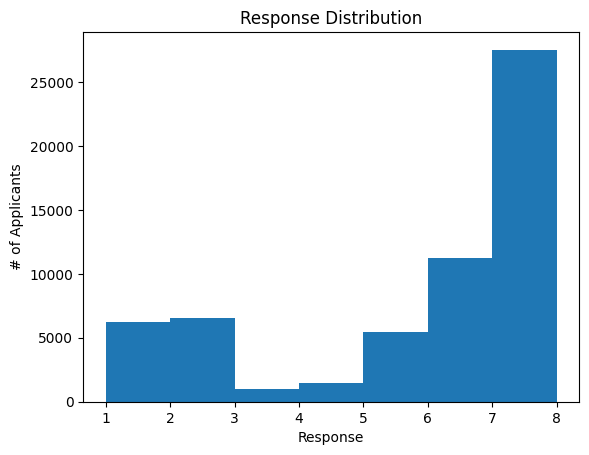

In [11]:
# Visualise the distribution of applicants' risk ratings in the full dataset.
plt.hist(df_index_set['Response'], bins=sorted(df_index_set['Response'].unique()))
plt.xlabel('Response')
plt.ylabel('# of Applicants')
plt.title('Response Distribution')

The histogram displays the distribution of applicants across the entire dataset based on their risk ratings (Response).

The distribution is "unbalanced" being skewed towards classes 6–8, which is significant, even though classes 1-2 also make up a sizeable portion of the dataset. Later, we will assess how well our ML models are able to "mimic" this distribution, as an indicator of whether they have been adequately fitted.


## 1.3 Distributions

In [12]:
# Split out the full set of the main dataset's columns into separate lists for easier use.

ColSet1_ProdInfo = ['Product_Info_1','Product_Info_2','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']
ColSet2_ApplicantInfo = ['Ins_Age','Ht','Wt','BMI']
ColSet3_EmploymentInfo = ['Employment_Info_1','Employment_Info_2','Employment_Info_3','Employment_Info_4','Employment_Info_5','Employment_Info_6']
ColSet4_InsuredInfo = ['InsuredInfo_1','InsuredInfo_2','InsuredInfo_3','InsuredInfo_4','InsuredInfo_5','InsuredInfo_6','InsuredInfo_7']
ColSet5_InsuranceHistoryInfo = ['Insurance_History_1','Insurance_History_2','Insurance_History_3','Insurance_History_4','Insurance_History_5','Insurance_History_7','Insurance_History_8','Insurance_History_9']
ColSet6_FamilyHistoryInfo = ['Family_Hist_1','Family_Hist_2','Family_Hist_3','Family_Hist_4','Family_Hist_5']

ColSet7_MedicalHistoryInfo = ['Medical_History_1','Medical_History_2','Medical_History_3','Medical_History_4','Medical_History_5','Medical_History_6','Medical_History_7','Medical_History_8',
                              'Medical_History_9','Medical_History_10','Medical_History_11','Medical_History_12','Medical_History_13','Medical_History_14','Medical_History_15',
                              'Medical_History_16','Medical_History_17','Medical_History_18','Medical_History_19','Medical_History_20','Medical_History_21','Medical_History_22',
                              'Medical_History_23','Medical_History_24','Medical_History_25','Medical_History_26','Medical_History_27','Medical_History_28','Medical_History_29',
                              'Medical_History_30','Medical_History_31','Medical_History_32','Medical_History_33','Medical_History_34','Medical_History_35','Medical_History_36',
                              'Medical_History_37','Medical_History_38','Medical_History_39','Medical_History_40','Medical_History_41']

ColSet8_MedicalKeywordInfo = ['Medical_Keyword_1','Medical_Keyword_2','Medical_Keyword_3','Medical_Keyword_4','Medical_Keyword_5','Medical_Keyword_6','Medical_Keyword_7','Medical_Keyword_8',
                              'Medical_Keyword_9','Medical_Keyword_10','Medical_Keyword_11','Medical_Keyword_12','Medical_Keyword_13','Medical_Keyword_14','Medical_Keyword_15','Medical_Keyword_16',
                              'Medical_Keyword_17','Medical_Keyword_18','Medical_Keyword_19','Medical_Keyword_20','Medical_Keyword_21','Medical_Keyword_22','Medical_Keyword_23','Medical_Keyword_24',
                              'Medical_Keyword_25','Medical_Keyword_26','Medical_Keyword_27','Medical_Keyword_28','Medical_Keyword_29','Medical_Keyword_30','Medical_Keyword_31','Medical_Keyword_32',
                              'Medical_Keyword_33','Medical_Keyword_34','Medical_Keyword_35','Medical_Keyword_36','Medical_Keyword_37','Medical_Keyword_38','Medical_Keyword_39','Medical_Keyword_40',
                              'Medical_Keyword_41','Medical_Keyword_42','Medical_Keyword_43','Medical_Keyword_44','Medical_Keyword_45','Medical_Keyword_46','Medical_Keyword_47','Medical_Keyword_48']

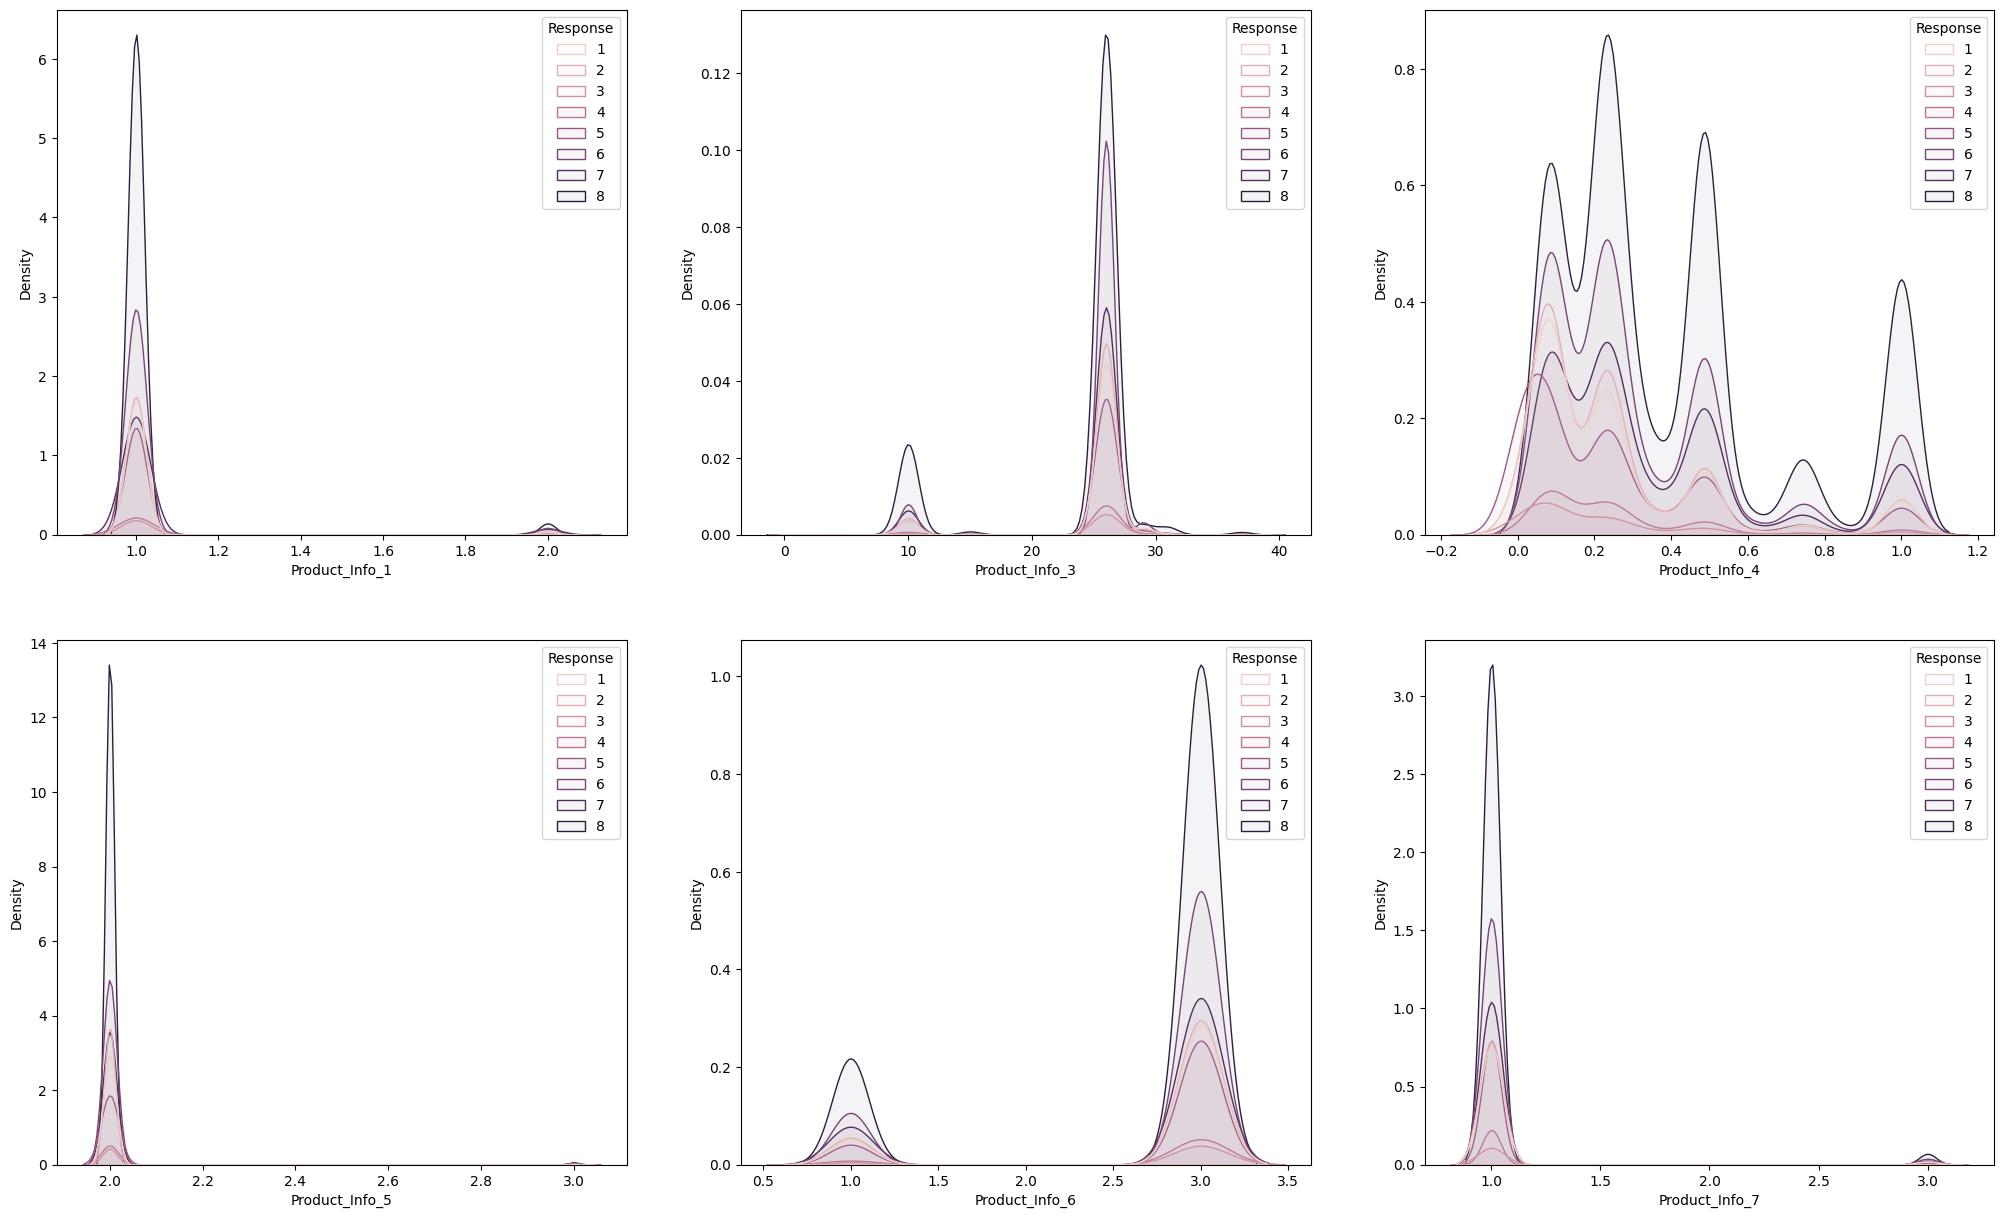

In [13]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Product_Info_2 has been excluded - as this has not yet been encoded into numeric values.
ColSet1_ProdInfo_kde = ['Product_Info_1','Product_Info_3','Product_Info_4','Product_Info_5','Product_Info_6','Product_Info_7']

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet1_ProdInfo_kde].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])


**Product Information**

The KDE plots show distributions of Response group/cohort of applicants across various `Product_Info` variables which we can observe have varying modalities. However, they all appear to have a high degree of overlap across the `Response` variable with no major difference in relative densities. Therefore the variations existing between the features do nor particularly help in predicting applicant risk rating.


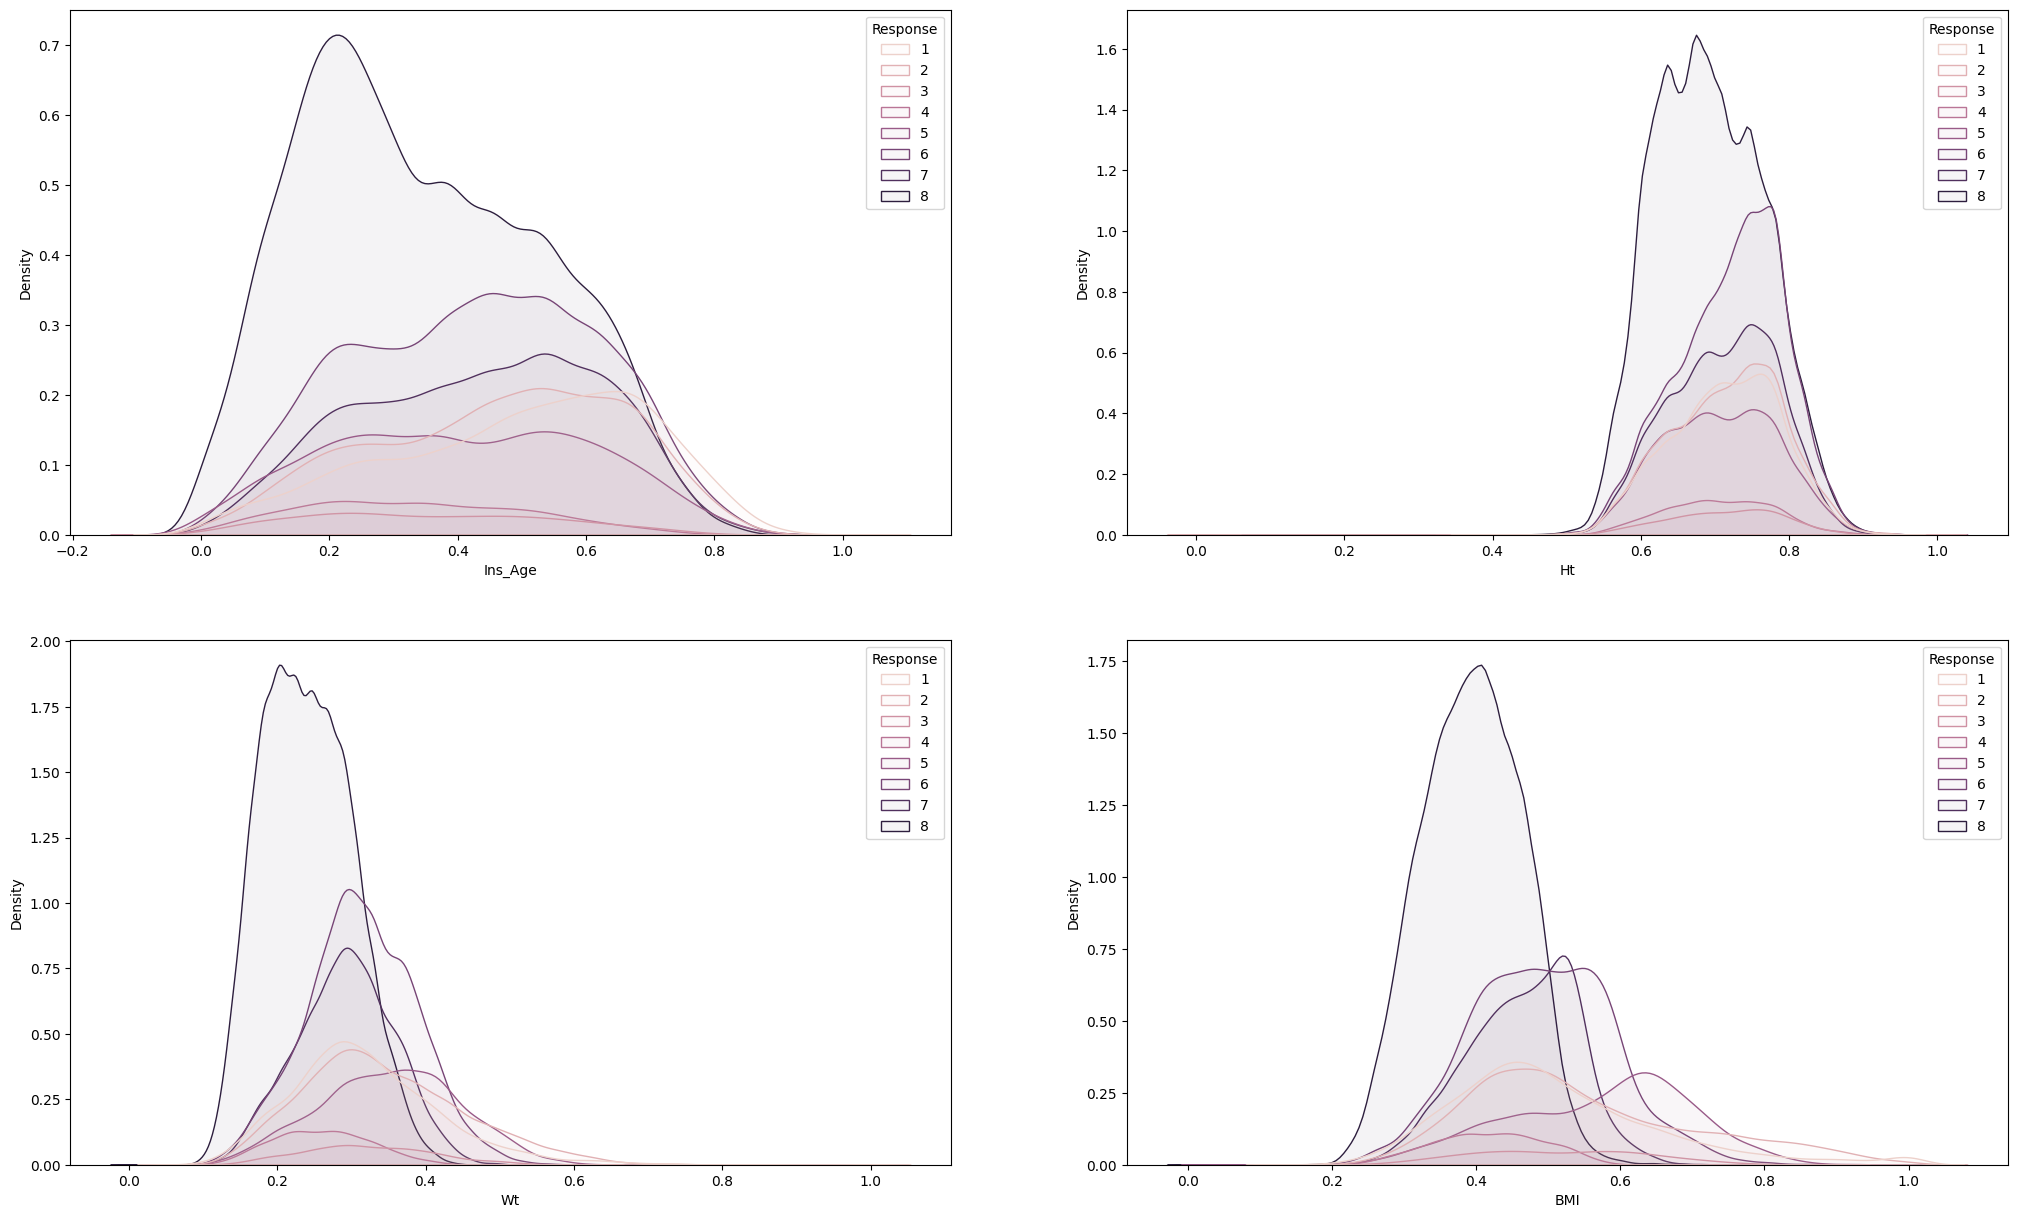

In [14]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet2_ApplicantInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//2,i%2])

**Biophysicial Information**

**Ins_Age:** This KDE plot highlights significant variation in the distribution across different Response groups, with each group showing distinct patterns in terms of peak broadening and shouldering. While the majority of the density is spread between x=0 and x=0.9, the shapes and skews of the distributions differ notably among cohorts. For instance, Response category 8 shows a positive skew towards x=0.2, whereas most other categories exhibit negative skews towards x=0.4. Lower Response categories (1 to 4) tend to have broader, more uniform distributions, while higher categories (5 to 8) feature sharper peaks and more pronounced skews. This indicates that as the Response category increases, the age distribution becomes more concentrated around specific ranges.
The main demographic insight is that younger individuals (closer to x=0.2) are more prevalent in higher Response categories, whereas a wider age range is seen in lower Response categories.

**Ht:** This KDE plot highlights significant variation in the 'Ht' distribution across different Response groups, with each group showing distinct patterns in terms of peak broadening and shouldering. The majority of the density is spread between x=0.6 and x=0.8, indicating that most individuals fall within this height range. Each cohort's skew mirrors that seen in the 'Ins_Age' distribution: Response category 8 displays a positive skew, while most other categories exhibit a negative skew. This pattern underscores the demographic insight that individuals in higher Response categories tend to have characteristics concentrated around certain ranges, while lower categories display a broader distribution.

**Wt:** This KDE plot illustrates significant variation in the `Wt` distribution across different Response groups, with distinct patterns of peak broadening and shouldering. Most of the distribution density lies between x=0.2 and x=0.5. Notably, the distribution for Response category 8 is concentrated around lower 'Wt' values (x=0.2), whereas the rest of the population is more broadly distributed across the 0.2 to 0.5 interval.

**BMI:** This KDE plot of BMI reveals significant variation in the composition and structure of each Response group distribution, with noticeable broadening and shouldering of the peaks. Similar to the 'Wt' distribution, the majority of the density is spread between x=0.4 and x=0.6. Response category 8 has a distinct peak centered at x=0.4, while most other categories are spread across the x=0.4 to x=0.6 range. Notably, one of the "medium" risk-rating distributions exhibits a pronounced negative skew towards x=0.6, differing from its peers that skew more towards x=0.5.

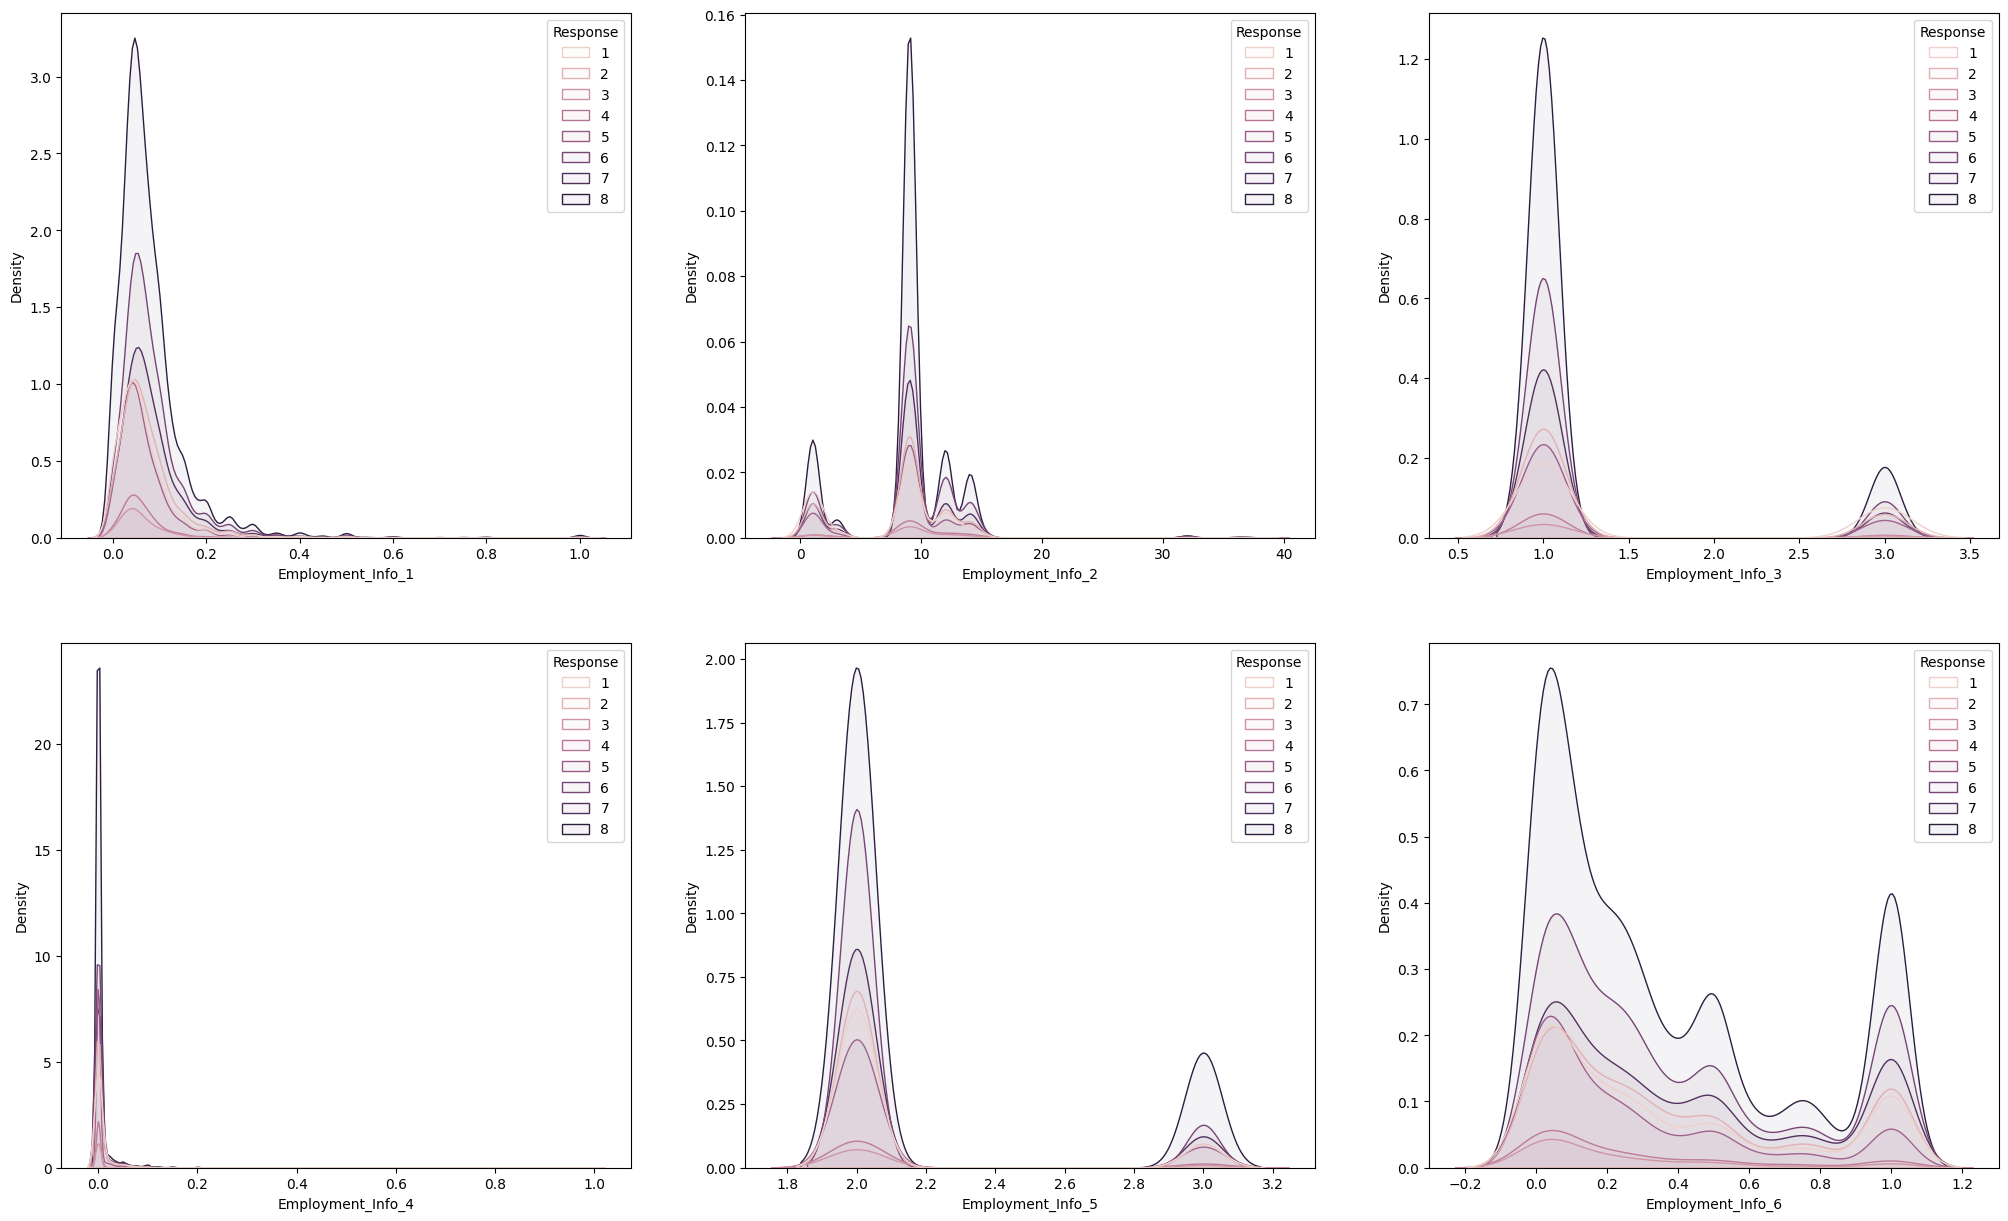

In [15]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet3_EmploymentInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

**Employment Information**

These KDE plots display distributions of `Employment_Info` features with varying modalities, but a common trend is that they closely overlap between each Response group (cohort of applicants), showing no significant differences in relative densities. Therefore, variations in these features are unlikely to contribute individually to predicting an applicant's risk rating.

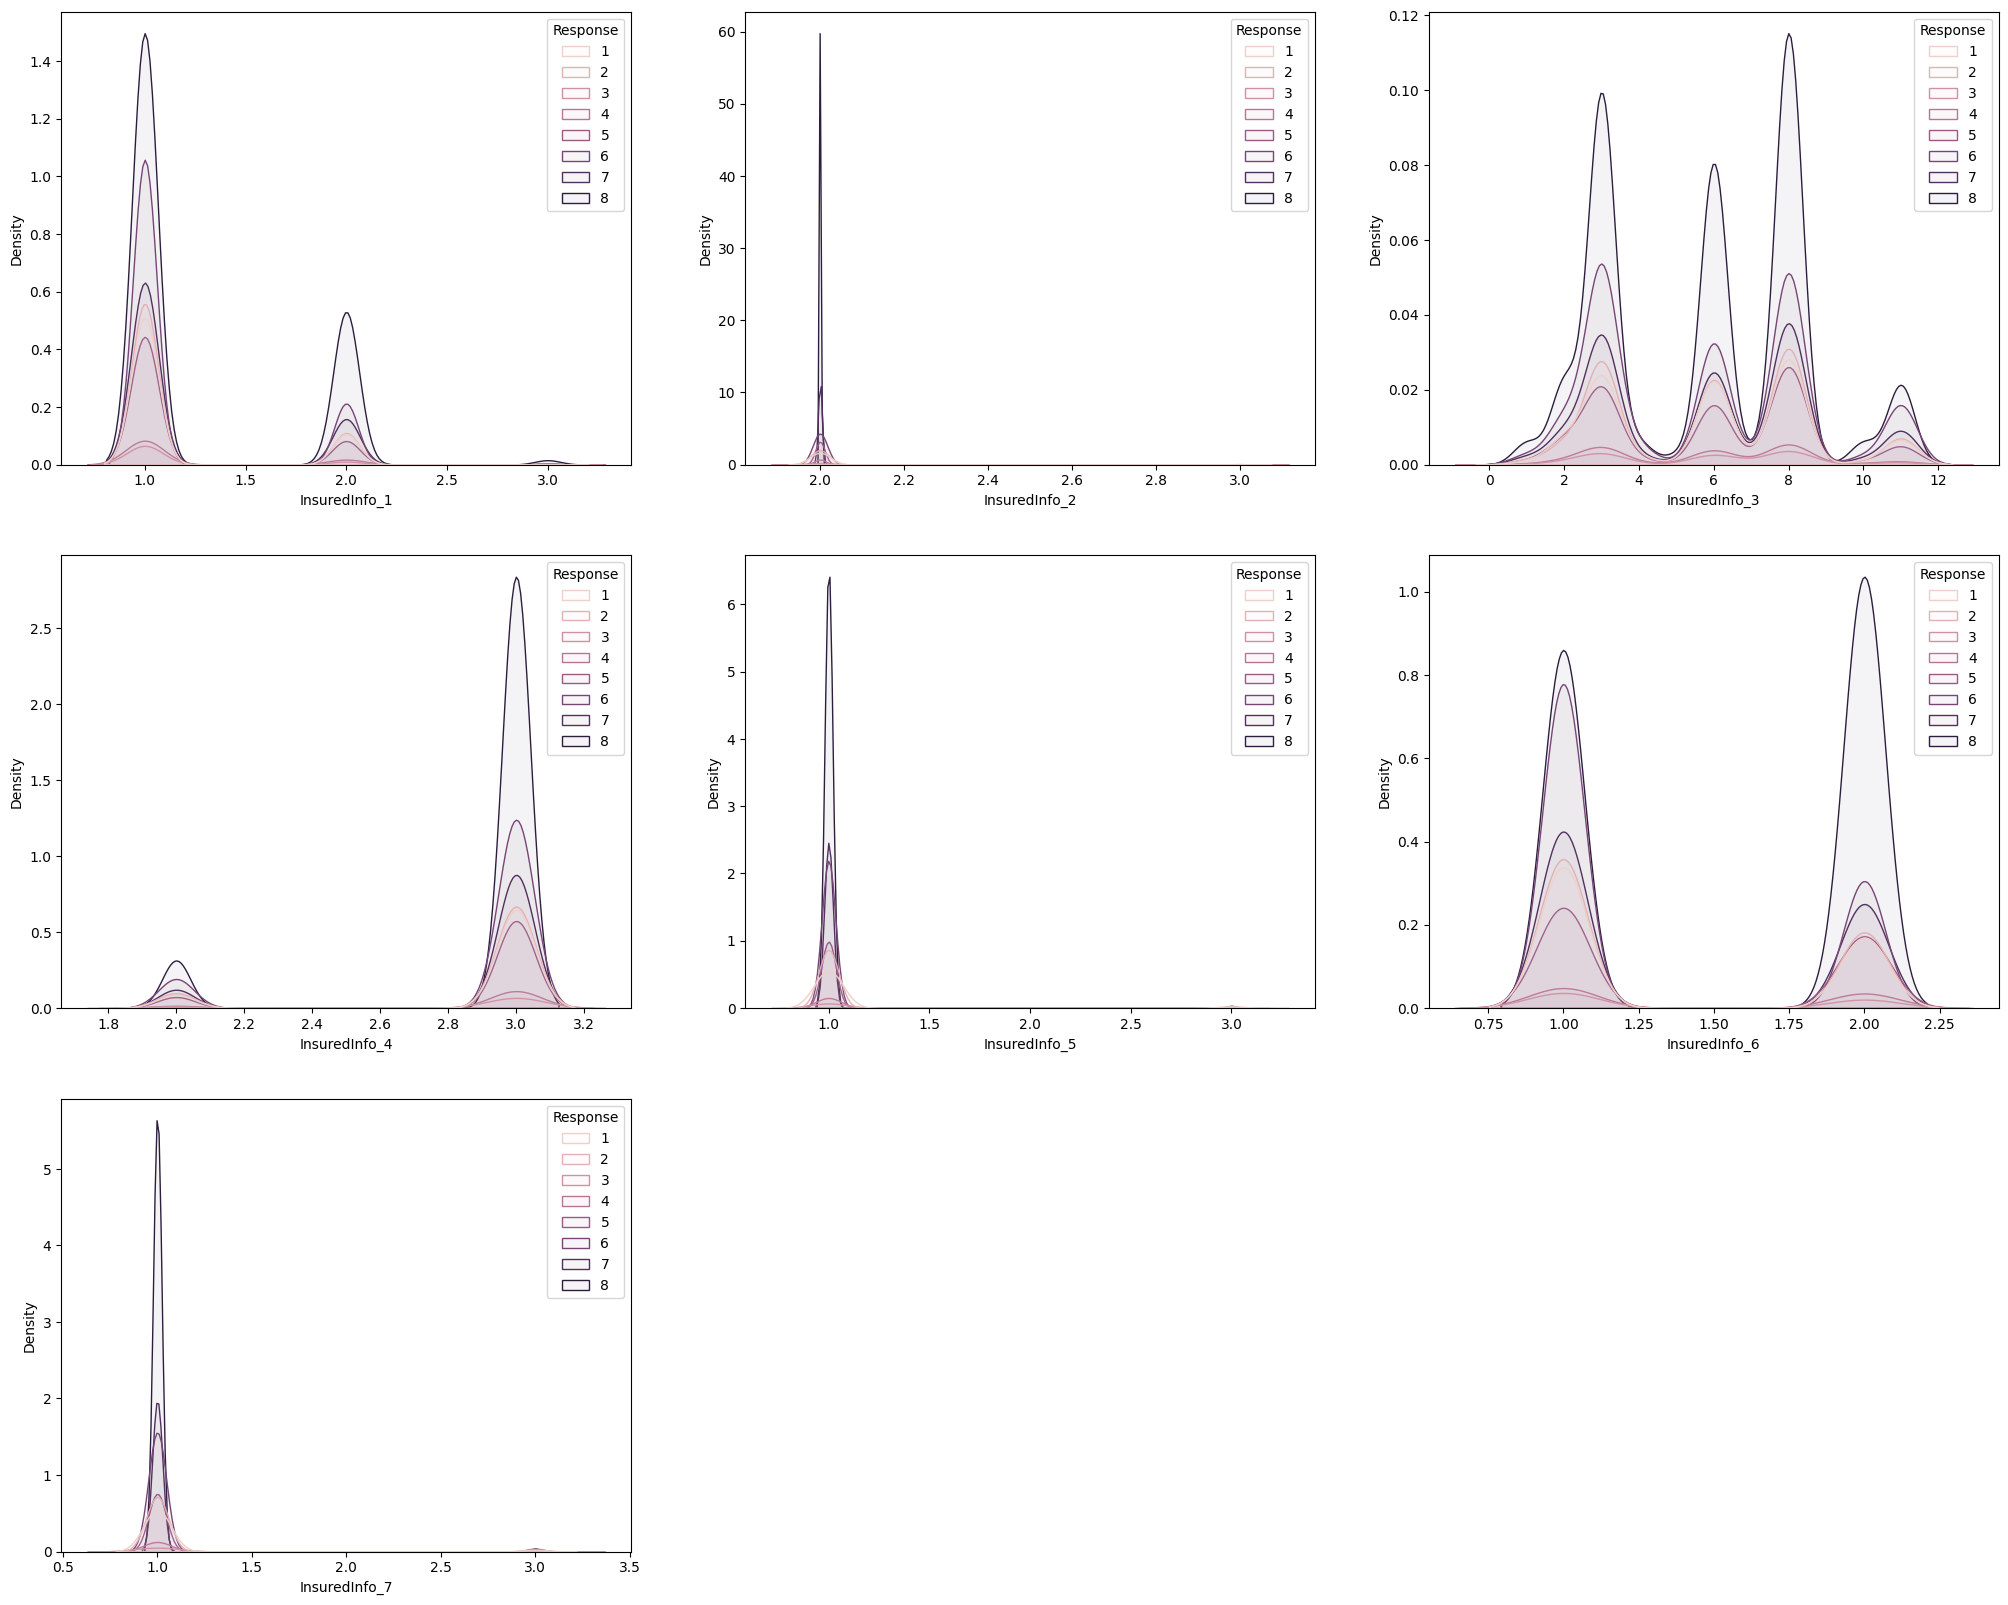

In [16]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet4_InsuredInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

**Insured Information**

These KDE plots illustrate distributions of various `InsuredInfo` features with varying modalities; however, a consistent trend is that they all closely overlap across different Response groups/cohorts of applicants, with no significant differences in relative densities. Consequently, variations in these features are unlikely to individually aid in predicting an applicant's risk rating.

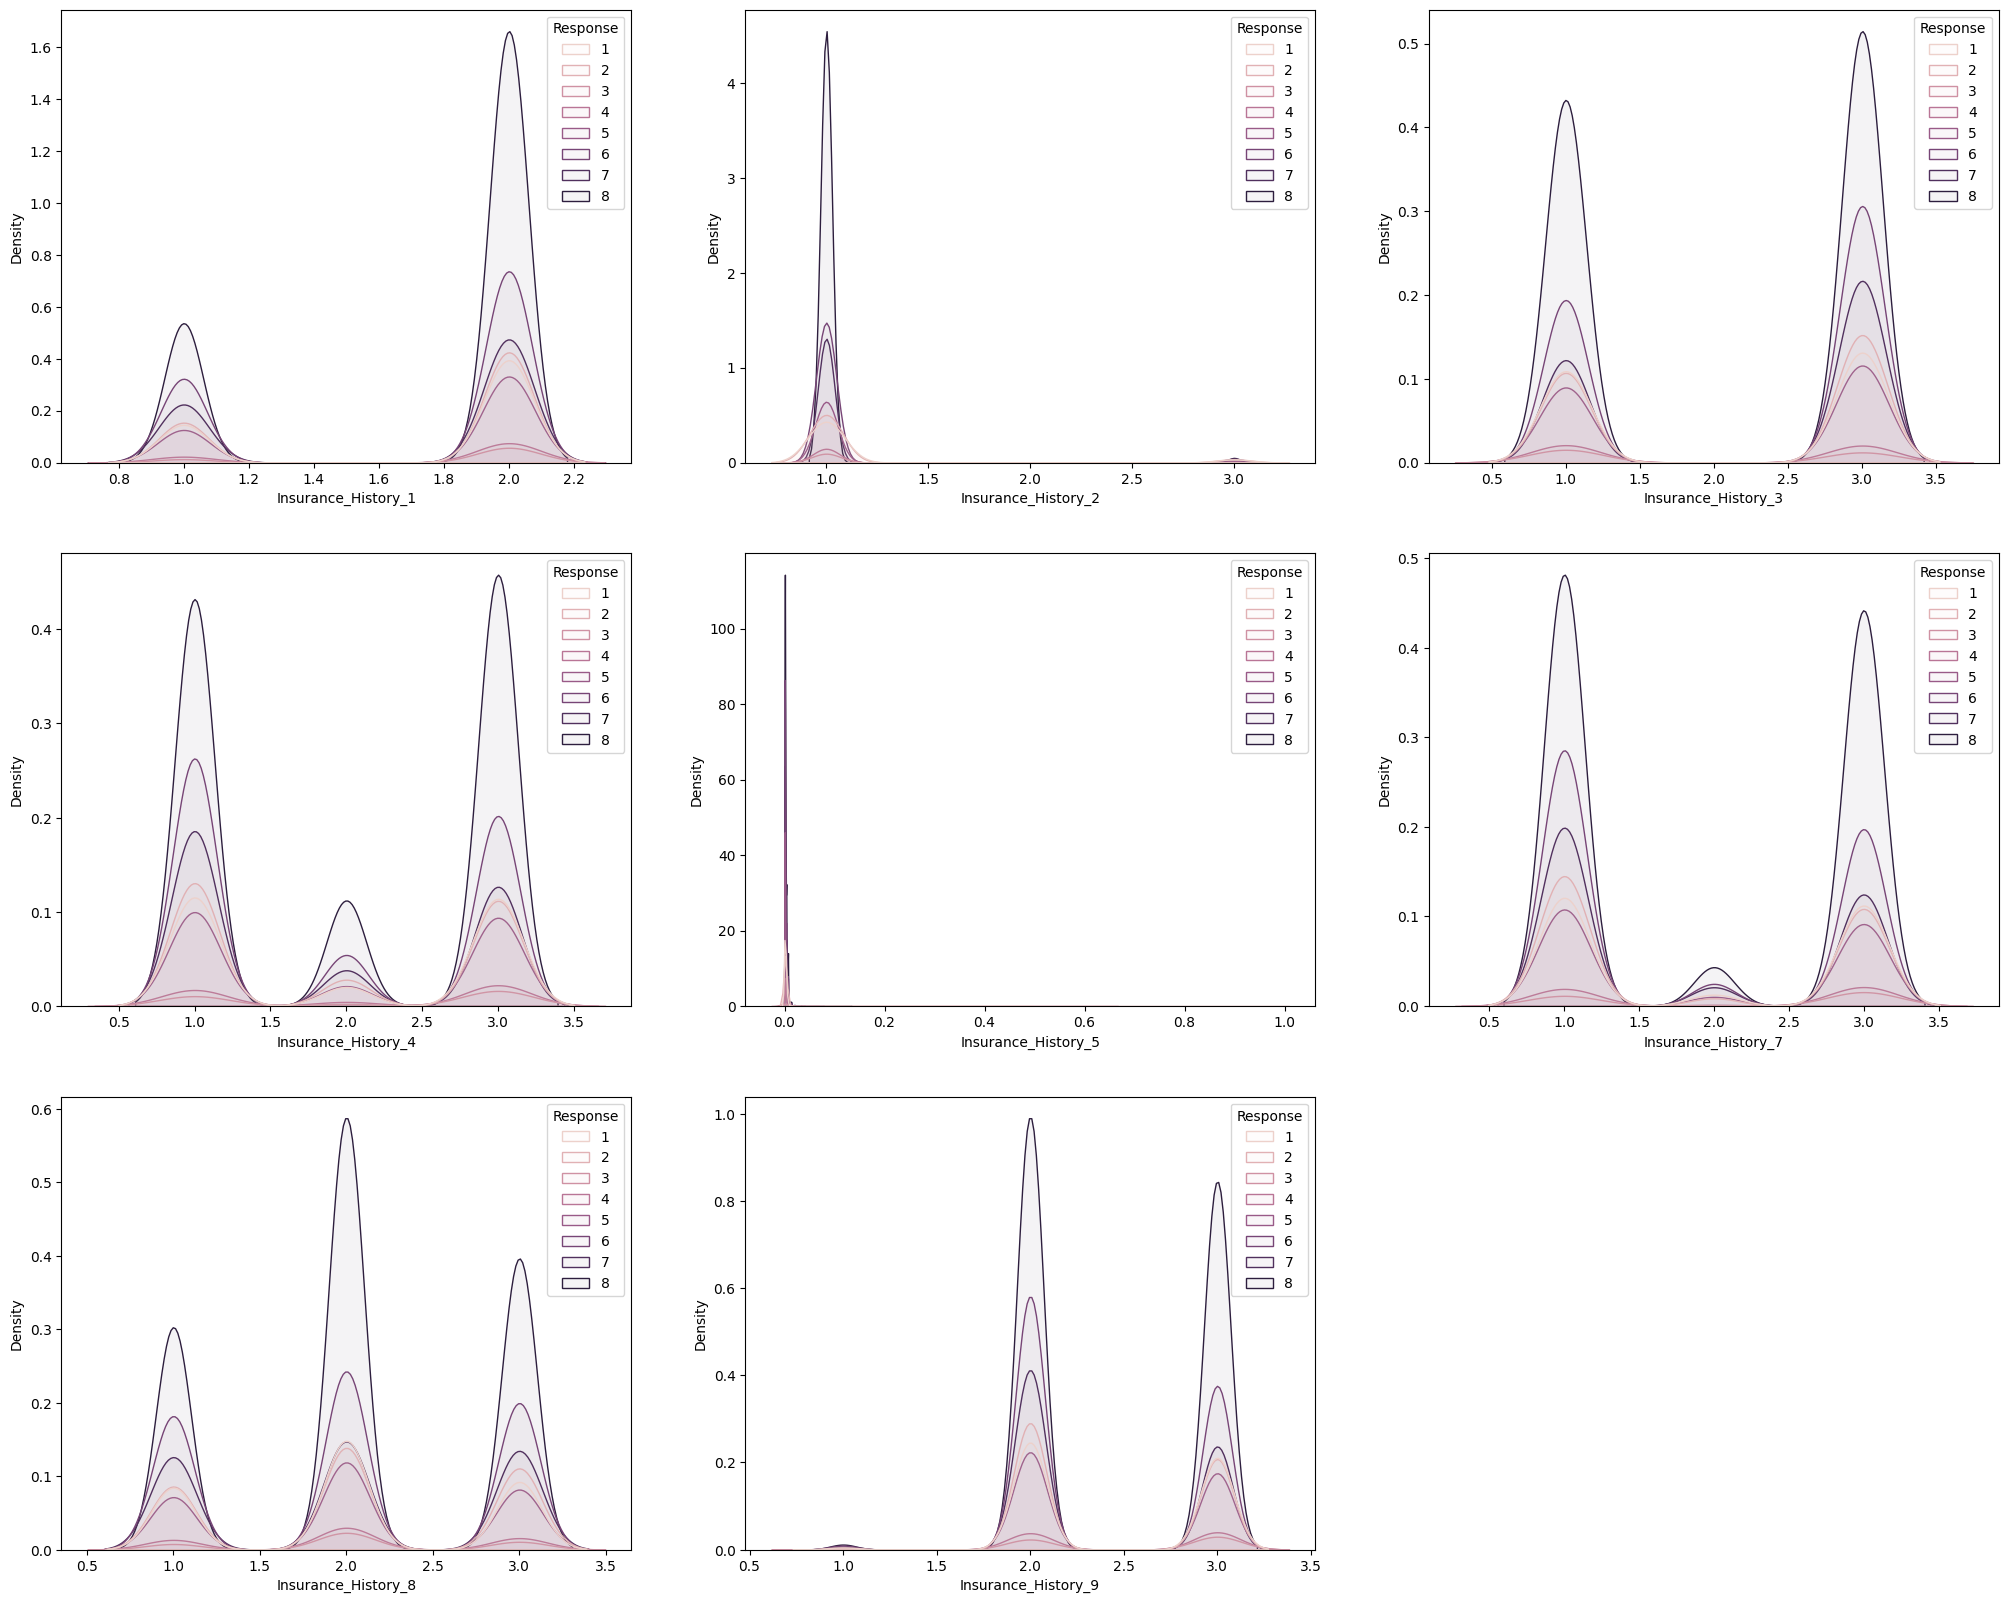

In [17]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet5_InsuranceHistoryInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.
fig.delaxes(axes[2,2])

**Insurance History Information**

These KDE plots display various distributions with differing modalities across `Insurance_History` variables. However, a consistent trend is that they all closely overlap across each Response group/cohort of applicants, showing no significant differences in relative densities. Therefore, variations in these features are unlikely to individually contribute to predicting an applicant's risk rating.

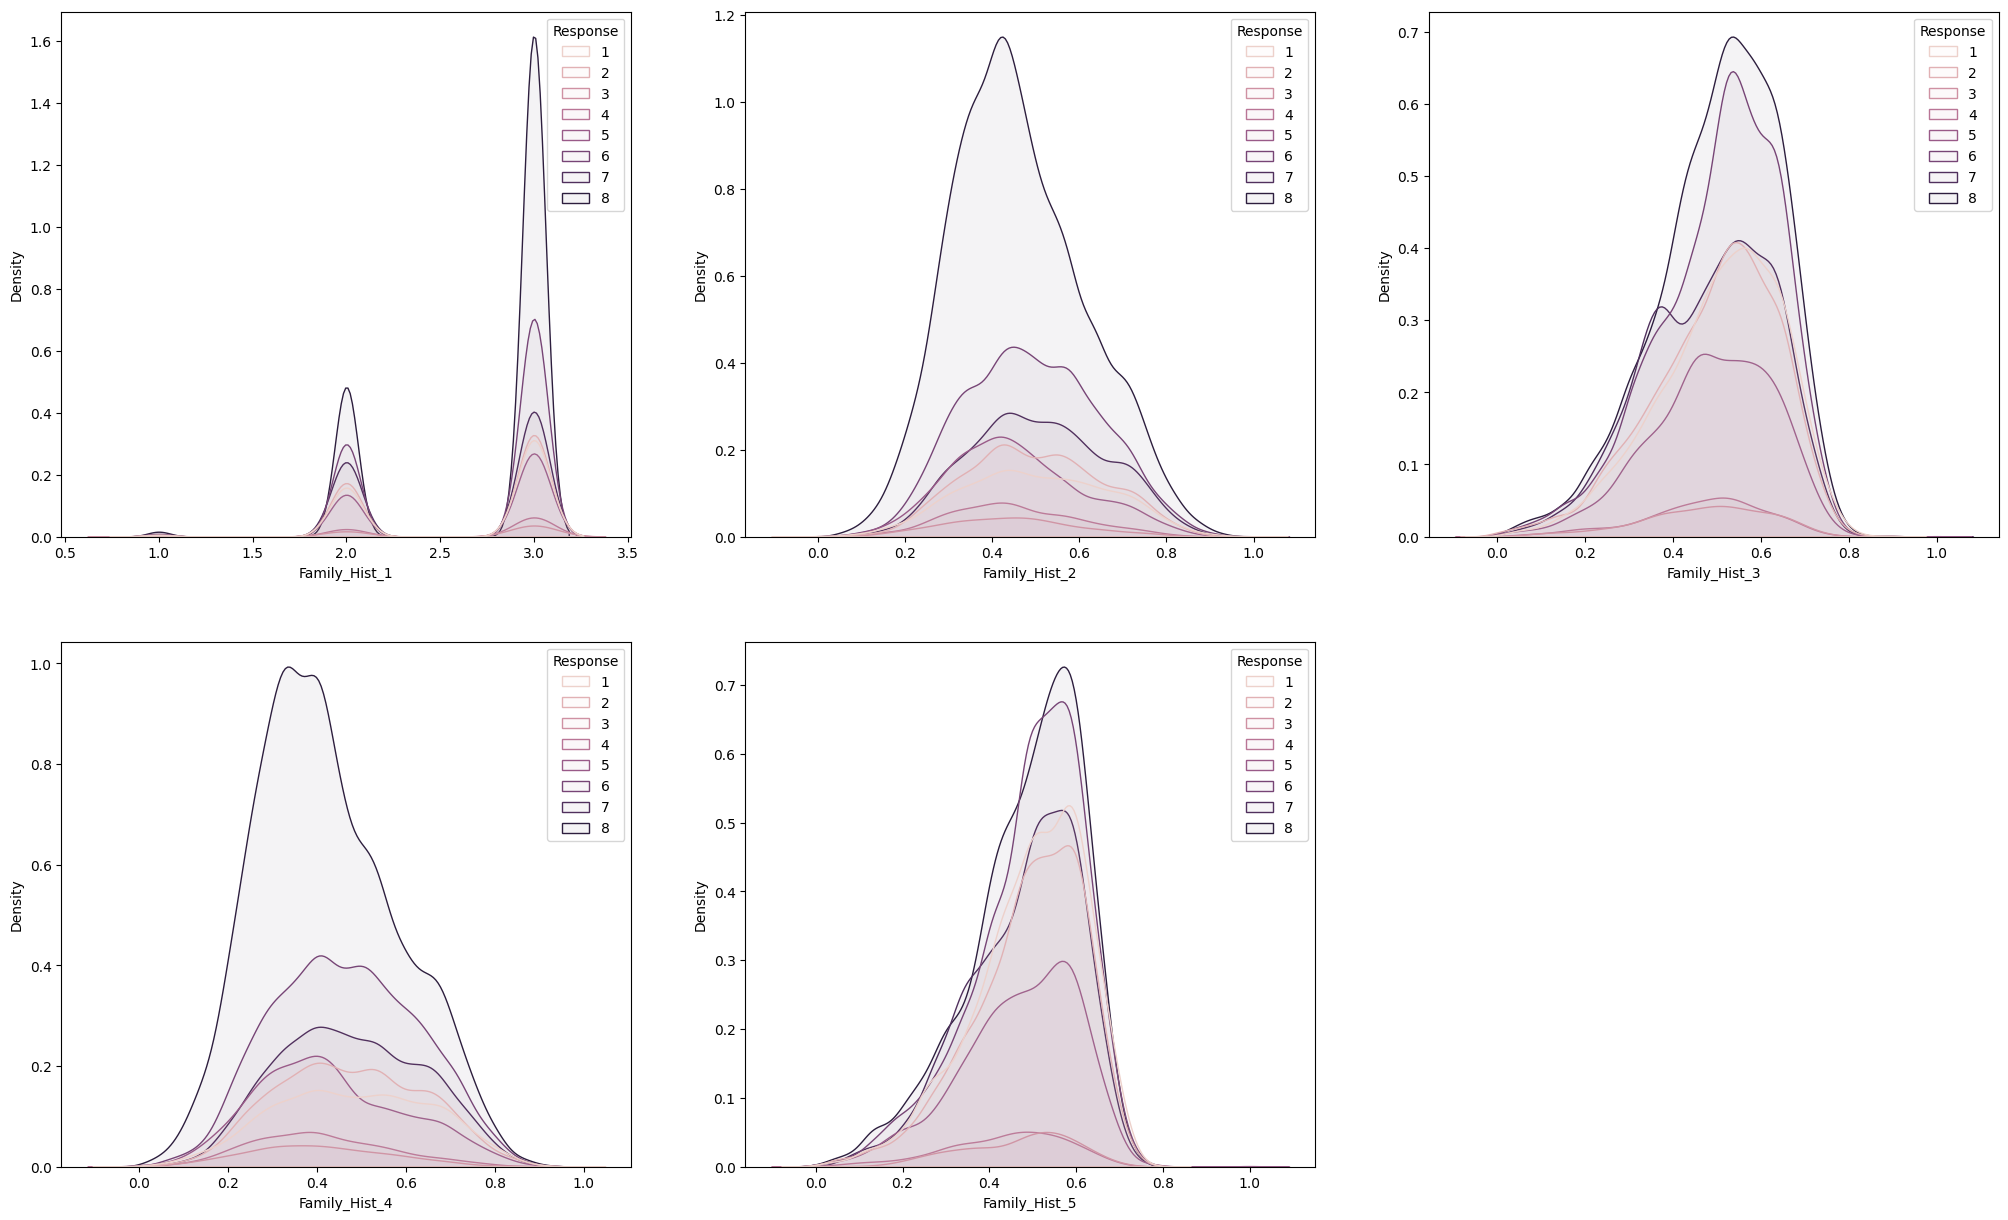

In [18]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,15))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet6_FamilyHistoryInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

# Delete any unused sets of axes in the subplot grid.
fig.delaxes(axes[1,2])


### Family History Information

#### Family_Hist_1:
This KDE plot exhibits a bimodal distribution with peaks at x=2 and x=3, along with a very low-density curve at x=1. The most prominent peak is at x=3. However, since this feature shows minimal variation in relative densities across the different Response classes, it is unlikely that variations in this feature will significantly contribute to predicting an applicant's risk rating.

#### Family_Hist_2 - Family_Hist_5:
These KDE plots display several unimodal distributions with some variation in the composition and structure of each Response group's distribution. Each peak demonstrates broadening and shouldering. While most of the distributions' densities are spread between x=0.2 and x=0.8, each cohort's distribution varies somewhat in shape and skewness/kurtosis. For example, class 8 generally features more positive kurtosis compared to most other classes, which tend to show broader density plots.

<ipython-input-19-523de3efe9db>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_index_set,


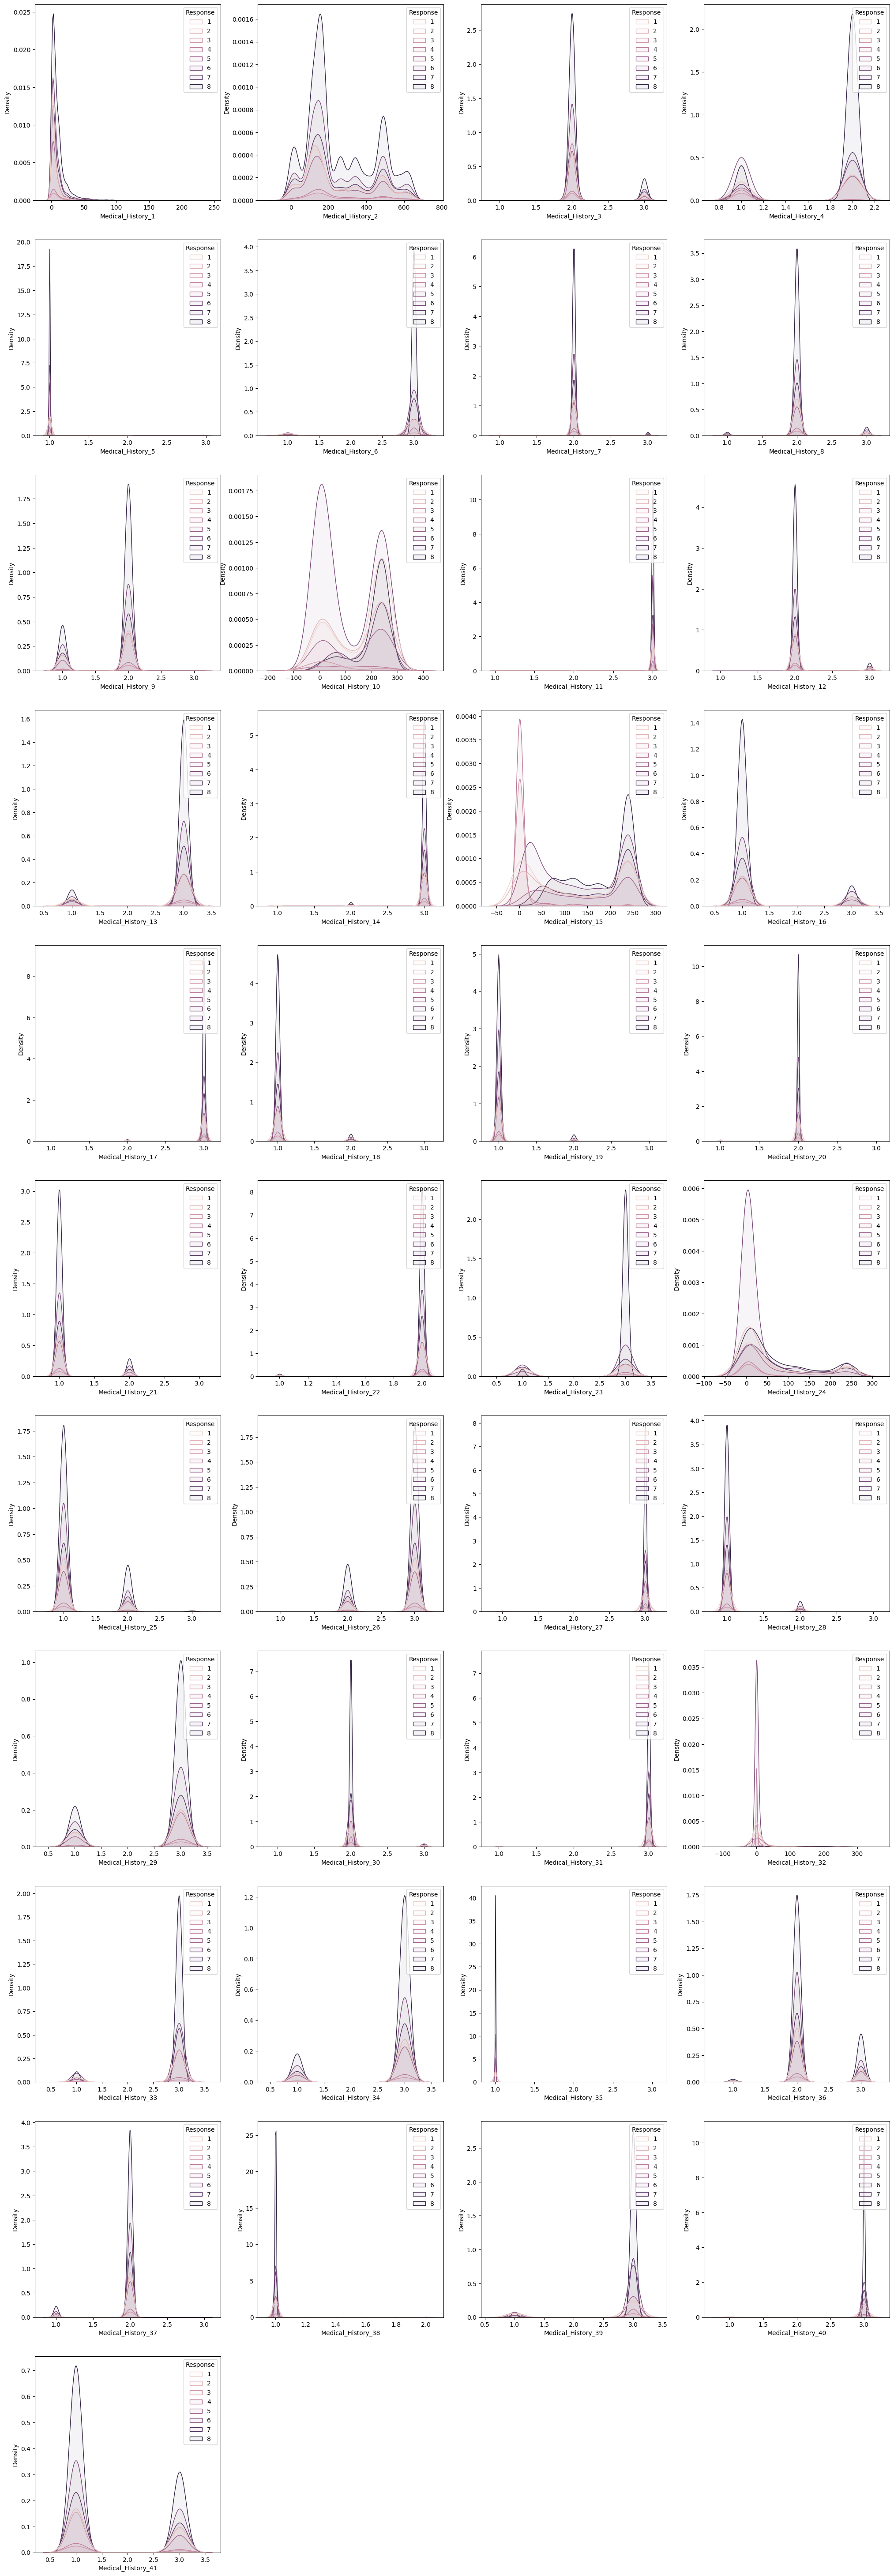

In [19]:
# Set up a subplot grid.
fig, axes = plt.subplots(nrows=11, ncols=4, figsize=(25, 75))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet7_MedicalHistoryInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//4,i%4])

# Delete any unused sets of axes in the subplot grid.
fig.delaxes(axes[10,1])
fig.delaxes(axes[10,2])
fig.delaxes(axes[10,3])


### Medical History

Most of these KDE plots feature distributions that closely overlap across the different Response groups/cohorts of applicants. Therefore, variations in these underlying features are unlikely to individually provide predictive power for determining an applicant's risk rating. However, there are a few notable exceptions:

#### Medical_History_2/15/24:
These KDE plots show multimodal distributions with some degree of predictive distinction in terms of variance, as the peaks of each Response group distribution show different degrees of broadening and shouldering. However, it can be noted that the scales of the y-axes here, the densities for each underlying distribution, are very small, limiting the ability of these features to individually distinguish between Response groups.

#### Medical_History_10:
This KDE plot displays some interesting characteristics. For low-risk applicant cohorts, the distributions appear bimodal, whereas at higher risk levels, the distribution tends toward a single peak. However, as we later identify, this column has a very high proportion of missing values, therefore its distribution should not be misconstrued as highly predictive.

#### Medical_History_23:
This KDE plot indicates that this feature shows some potential. As the Response value/risk rating increases, each peak in the bimodal distribution becomes sharper, with a more positive kurtosis. In simpler terms, values further from the peaks' centers tend to correlate with a lower risk rating, whereas values that closely overlap with the peaks tend to represent applicants with higher risk ratings.

<ipython-input-20-f103a7435cda>:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df_index_set,


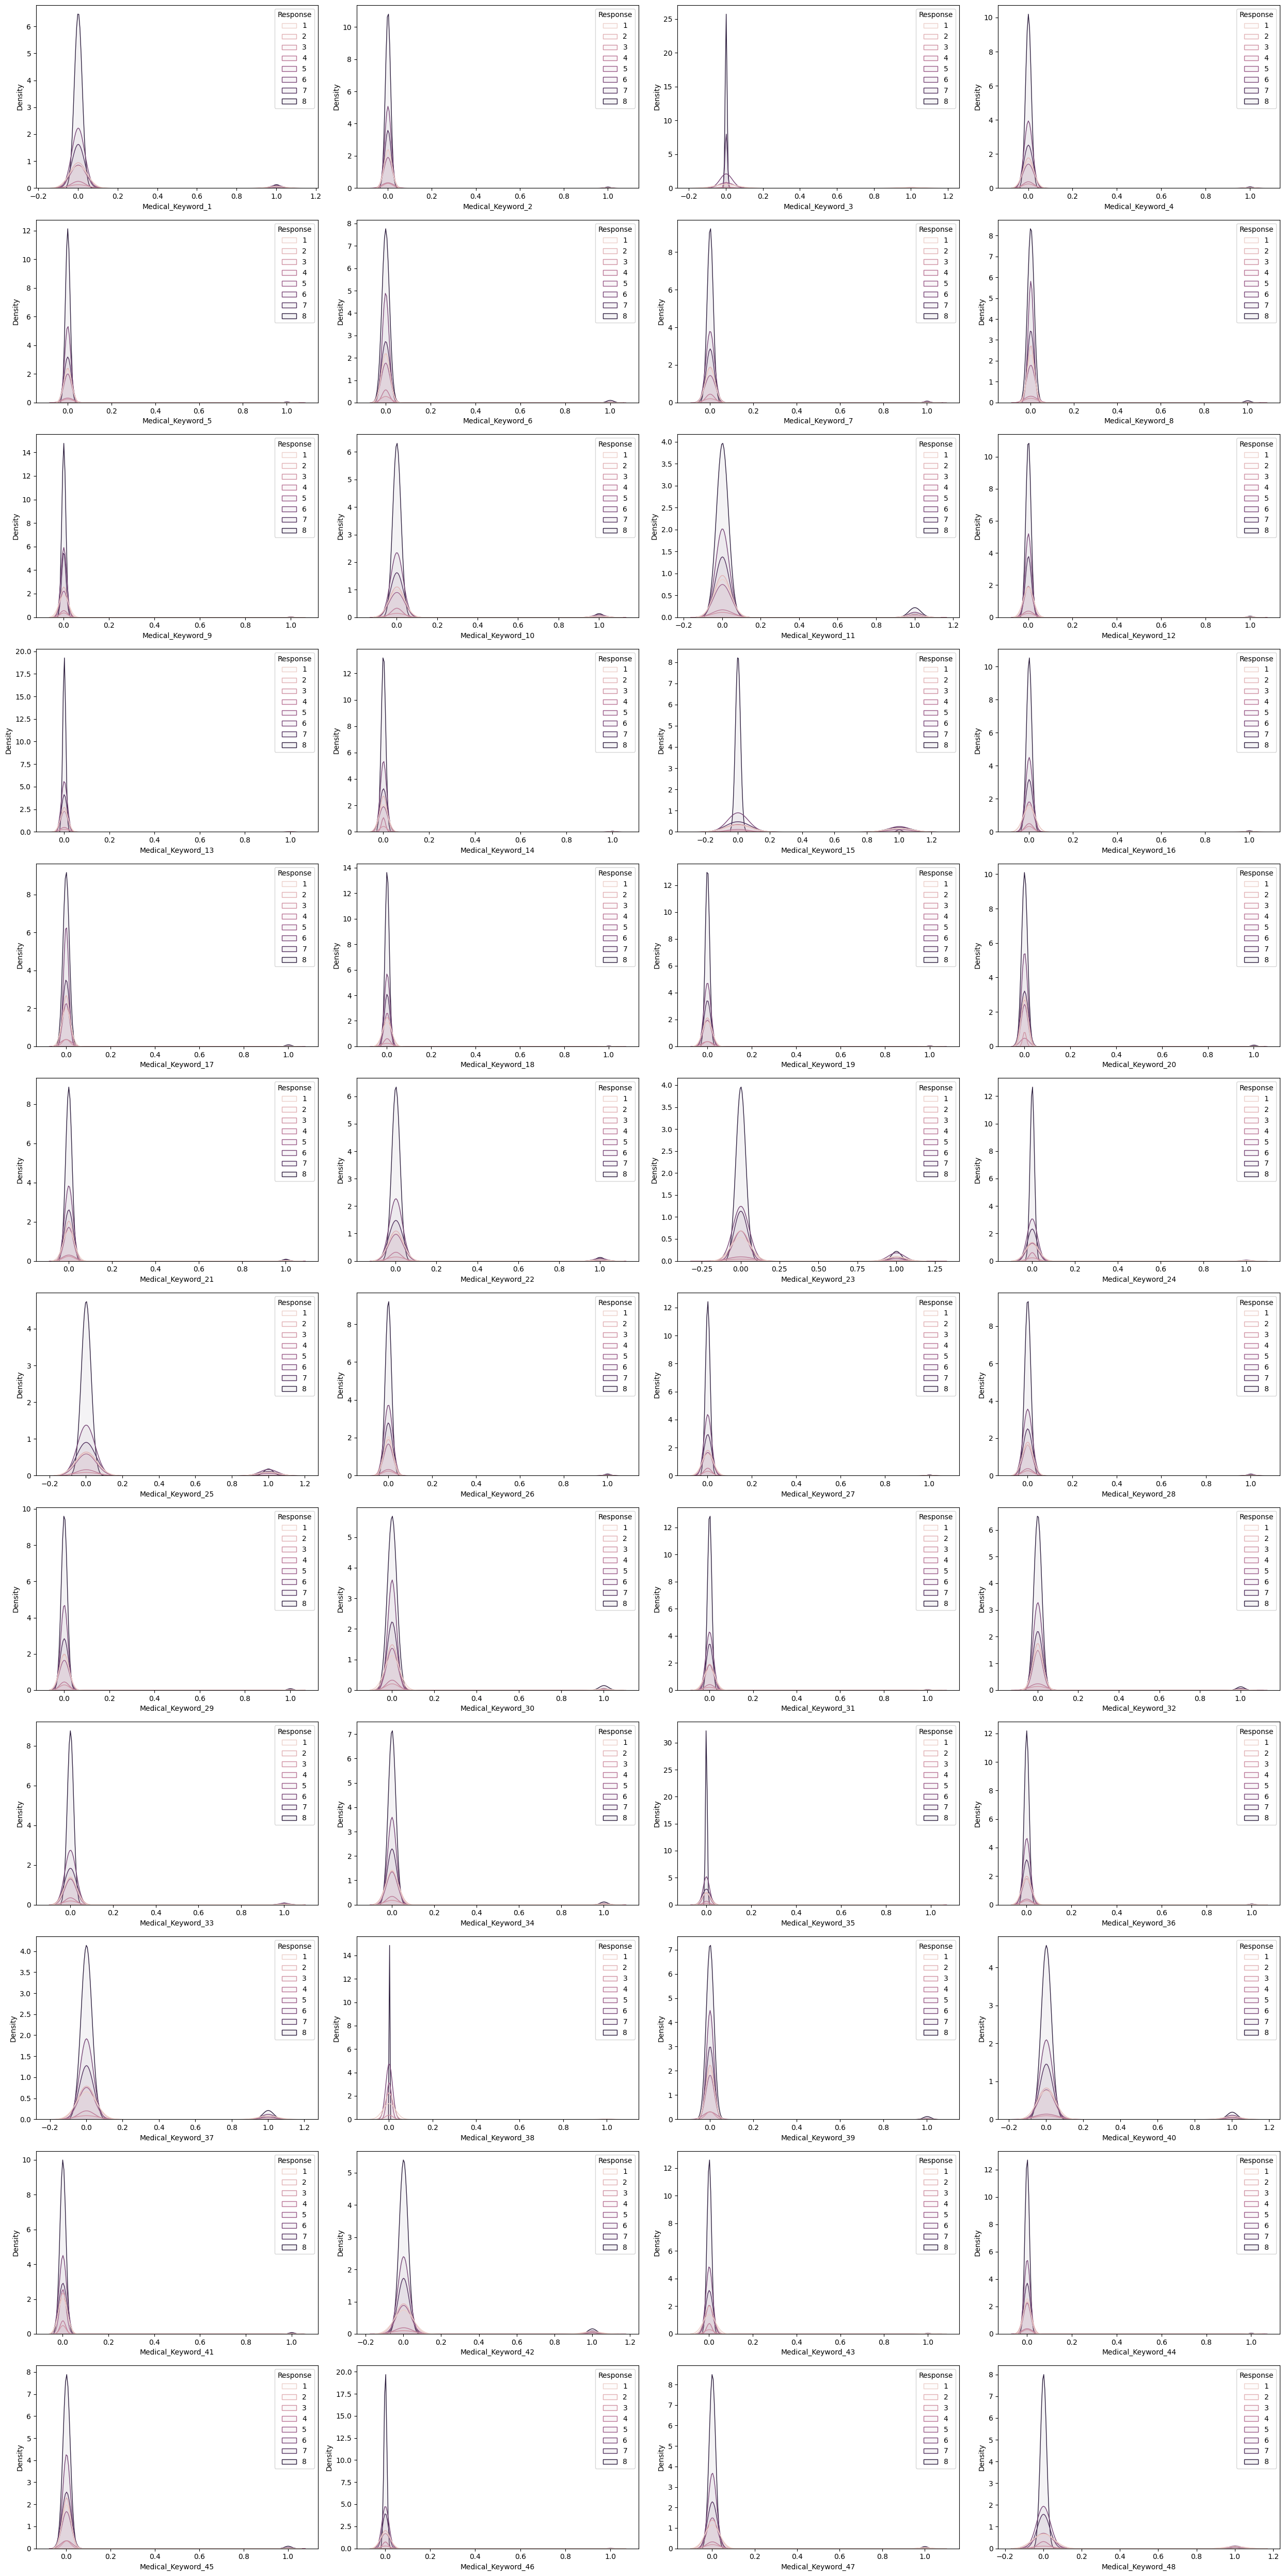

In [20]:
# Set up a subplot grid with a reduced figure size.
fig, axes = plt.subplots(nrows=12, ncols=4, figsize=(25,50))

# Produce kernel density estimate plots for each set of columns.
for i, column in enumerate(df_index_set[ColSet8_MedicalKeywordInfo].columns):
    sns.kdeplot(data=df_index_set,
                x=column,
                hue="Response", fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//4, i%4])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


### Medical Keywords

These KDE plots display distributions with varying modalities, yet they consistently show a close overlap between each Response group/cohort of applicants, with no significant differences in relative densities. Therefore, variations in these features are unlikely to individually contribute to predicting an applicant's risk rating.

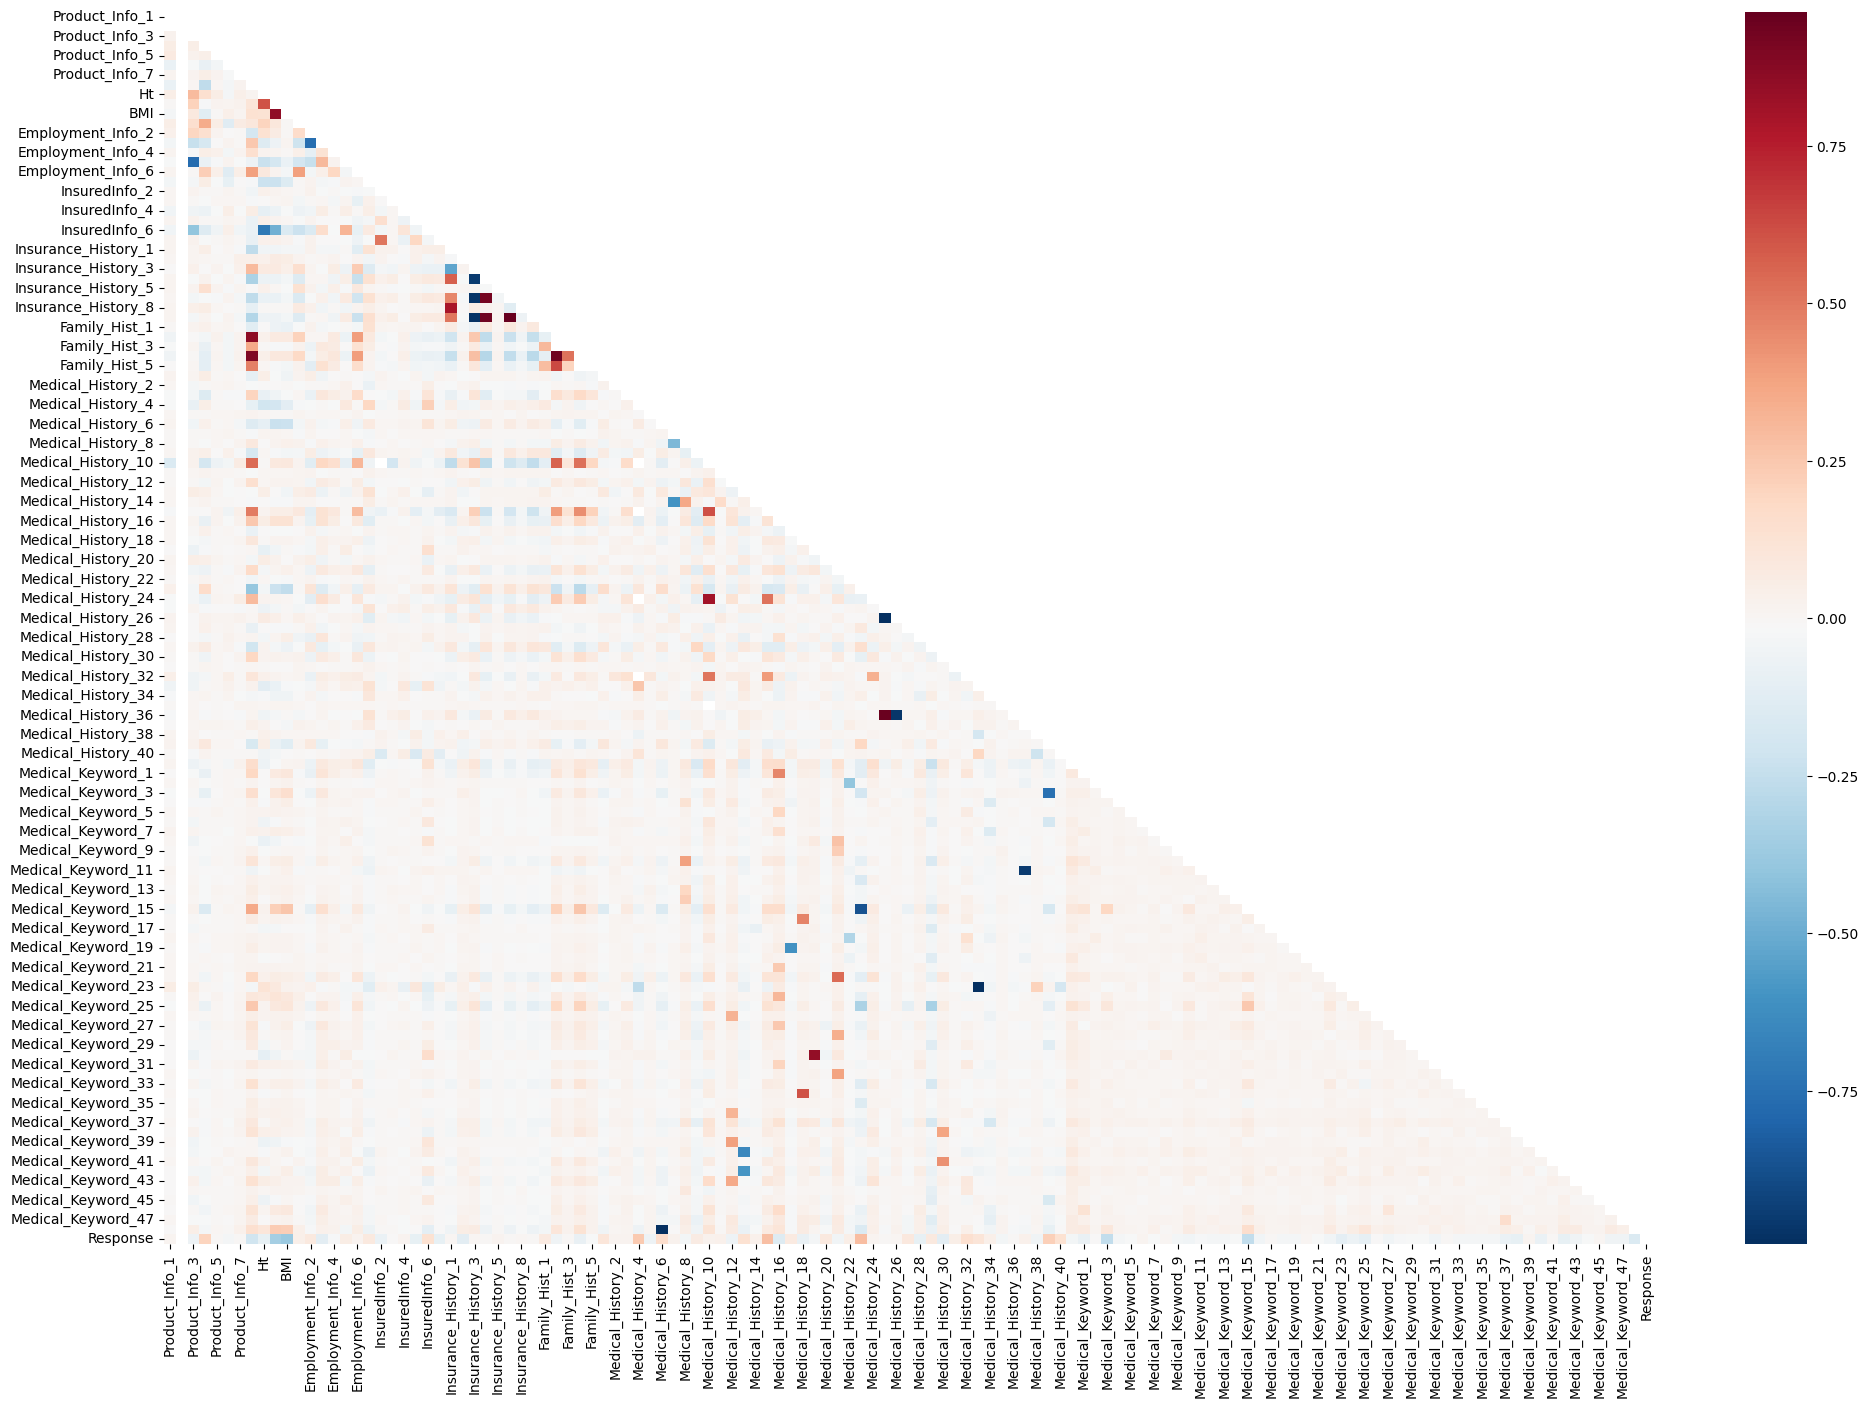

In [21]:
# We know that at least columns in the Dataframe contain non-numeric data, preventing the correlation calculation...
# Convert relevant columns to numeric type if they contain numerical data represented as strings
for column in df_index_set.columns:
    if df_index_set[column].dtype == 'object':  # Check if the column is of object type (likely string)
        try:
            df_index_set[column] = pd.to_numeric(df_index_set[column], errors='coerce')  # Attempt conversion, replacing non-convertible values with NaN
        except:
            pass  # Skip columns that cannot be converted

# Produce a correlation matrix of the dataset - then, create a mask to hide the upper-right half of the matrix.
corrs = df_index_set.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True

# Convert the correlation matrix into a heatmap using Seaborn.
plt.figure(figsize=(24,16))
sns.heatmap(corrs, cmap='RdBu_r', mask=mask)
plt.show()

Based on the chart above, we can infer the following for each column set:

### Column Set 1 - Product Info:
These features show minimal interaction or correlation with most other feature sets, except for `Employment_Info_1`, `Employment_Info_5`, and `Insured_Info_6`. These columns may be directly correlated because an applicant's employment or financial status can influence the type of policy or product they apply for.

### Column Set 2 - Applicant Info:
These columns exhibit varying interactions with other feature sets, with the strongest correlations (excluding those within the same column set) observed between some `Family_Hist` columns and `Insured_Info_6`.

### Column Set 3 - Employment Info:
Aside from two strong anti-correlations between `Employment_Info_2` and `Employment_Info_3`, and between `Employment_Info_5` and `Product_Info_3` and a few moderate interactions between `Employment_Info_6` and `Family_Hist_2` / `Family_Hist_4`, this column set does not strongly interact with other features.

### Column Set 4 - Insured Info:
The column `InsuredInfo_2` shows a fairly strong correlation with `InsuredInfo_7` and a strong anti-correlation with some `Applicant Info` columns. Otherwise, this column set has minimal interaction with other features.

### Column Set 5 - Insurance History Info:
This feature set exhibits several strong inter-correlations among the `Insurance_History` columns but shows minimal interaction with other features.

### Column Set 6 - Family History Info:
The columns `Family_Hist_2` and `Family_Hist_4` show a very strong positive correlation with `Ins_Age`, and to a lesser degree with `Medical_History_10` and `Medical_History_15`.

### Column Set 7 - Medical History Info:
This column set shows several correlation hotspots with various Medical_Keyword columns, as well as with `Ins_Age` and some `Family_Hist` columns.

### Column Set 8 - Medical Keyword Info:
These columns exhibit several correlation hotspots with various `Medical_History` columns but do not show notable interactions with other features.

# 2 Data Pre-processing

## 2.1 Missing Values

It is important to assess the completeness of our dataset to ensure that any identified correlations or trends are supported by sufficient evidence. We need enough data points to validate any inferences or predictions derived from the dataset.

The following checks are designed to highlight areas where the dataset is incomplete.








In [22]:
# Determine which columns contain nulls/missing values.
cols_with_missing = [col for col in df_index_set.columns
                     if df_index_set[col].isnull().any()]

# Summarise how many missing values are present in each column.
df_index_set[cols_with_missing].isna().sum()

Product_Info_2         59381
Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [23]:
## Calculate the proportion of zeroes relative to non-zero values.
for col in cols_with_missing:
    sum = df_index_set[col].isna().sum()
    length = len(df_index_set[col].index)
    ratio = sum/length
    print('Proportion of zeroes in', col, 'is: ', round(ratio*100,2), '%.')

Proportion of zeroes in Product_Info_2 is:  100.0 %.
Proportion of zeroes in Employment_Info_1 is:  0.03 %.
Proportion of zeroes in Employment_Info_4 is:  11.42 %.
Proportion of zeroes in Employment_Info_6 is:  18.28 %.
Proportion of zeroes in Insurance_History_5 is:  42.77 %.
Proportion of zeroes in Family_Hist_2 is:  48.26 %.
Proportion of zeroes in Family_Hist_3 is:  57.66 %.
Proportion of zeroes in Family_Hist_4 is:  32.31 %.
Proportion of zeroes in Family_Hist_5 is:  70.41 %.
Proportion of zeroes in Medical_History_1 is:  14.97 %.
Proportion of zeroes in Medical_History_10 is:  99.06 %.
Proportion of zeroes in Medical_History_15 is:  75.1 %.
Proportion of zeroes in Medical_History_24 is:  93.6 %.
Proportion of zeroes in Medical_History_32 is:  98.14 %.


In the code above, we have examined the entire dataset to identify which columns contain missing values and to count the number of missing values in each of these columns.

#### Data Leakage
To prevent test-data leakage during model validation and testing, it is essential to ensure that only the training set is used to assess the completeness of our data. Therefore, we need to split the full dataset into training, validation, and testing sets. After splitting, we will review the training set for missing values.

## 2.2 Train-Test Split

Here, we will create separate DataFrames to store the features and target variables.

These DataFrames will then be used with the `train_test_split()` function from sklearn to divide the data into training, validation, and test subsets.

In [24]:
# Assign the features to their own dataframe.
X_original = df_index_set.drop(['Response'], axis=1)

# Assign the target variable to its own dataframe.
y_original = df_index_set.Response

# Perform a train-test split to obtain the training, validation and test data as separate dataframes.
from sklearn.model_selection import train_test_split

# Split out test/holdout set from full dataset.
# We will set the size of the X/y test datasets to be 20% of the original (full) X/y datasets, via the train_size/test_size parameters.
X_other, X_test, y_other, y_test = train_test_split(X_original, y_original, train_size=0.8, test_size=0.2, random_state=0, stratify=y_original)

# Split remaining portion into training/validation sets.
# We will set the size of the X/y train datasets to be 60% of the original (full) X/y datasets, via the train_size/test_size parameters.
X_train, X_val, y_train, y_val = train_test_split(X_other, y_other, train_size=0.75, test_size=0.25, random_state=0, stratify=y_other)

## 2.3 Review and Handle Columns

### 2.3.1 Locating/handling excess zeroes

We now examine the training data to identify any missing values.

Statistical tests can determine if these values are missing completely at random (MCAR), missing at random (MAR), or missing not at random (MNAR). This assessment helps us understand whether the remaining data is still likely to represent the general population. For this analysis, for simplicity we assume that any missing data is MCAR and that any subsequent analysis or imputation is free from implicit bias.

We assume that the data is missing completely at random (MCAR) because, in many cases, missing values can occur due to non-systematic reasons, such as random errors in data entry or collection. This assumption allows us to proceed without complex adjustments. Alternatively, if we were not to assume MCAR, we would need to perform more rigorous statistical tests to determine the nature of the missing data (MAR or MNAR). This would involve understanding the underlying mechanisms causing the missing values and potentially using advanced imputation techniques or modeling approaches that account for the non-randomness in the data.

In [25]:
# Determine which columns contain nulls/missing values.
X_train_cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Summarise how many missing values are present in each column.
X_train[X_train_cols_with_missing].isna().sum()

Product_Info_2         35628
Employment_Info_1         16
Employment_Info_4       4002
Employment_Info_6       6518
Insurance_History_5    15196
Family_Hist_2          17141
Family_Hist_3          20591
Family_Hist_4          11458
Family_Hist_5          25107
Medical_History_1       5368
Medical_History_10     35299
Medical_History_15     26744
Medical_History_24     33312
Medical_History_32     34980
dtype: int64

In [26]:
## Calculate the proportion of zeroes relative to non-zero values.
for col in X_train_cols_with_missing:
    sum = X_train[col].isna().sum()
    length = len(X_train[col].index)
    ratio = sum/length
    print('Proportion of zeroes in', col, 'is: ', round(ratio*100,2), '%.')

Proportion of zeroes in Product_Info_2 is:  100.0 %.
Proportion of zeroes in Employment_Info_1 is:  0.04 %.
Proportion of zeroes in Employment_Info_4 is:  11.23 %.
Proportion of zeroes in Employment_Info_6 is:  18.29 %.
Proportion of zeroes in Insurance_History_5 is:  42.65 %.
Proportion of zeroes in Family_Hist_2 is:  48.11 %.
Proportion of zeroes in Family_Hist_3 is:  57.79 %.
Proportion of zeroes in Family_Hist_4 is:  32.16 %.
Proportion of zeroes in Family_Hist_5 is:  70.47 %.
Proportion of zeroes in Medical_History_1 is:  15.07 %.
Proportion of zeroes in Medical_History_10 is:  99.08 %.
Proportion of zeroes in Medical_History_15 is:  75.06 %.
Proportion of zeroes in Medical_History_24 is:  93.5 %.
Proportion of zeroes in Medical_History_32 is:  98.18 %.


A number of columns have been identified in the code above, with different proportions of missing values - some are still in workable condition and can be preprocessed via imputation methods in order to provide machine-interpretable inputs for our models. However, there are still a handful of columns which are highly incomplete - any attempt to perform imputation would likely introduce significant bias/skew into these features' distributions.

Under these conditions, it may be safer to simply remove the columns altogether - intuitively, this makes sense as the number of non-blank values already represents a very small portion of these columns. Here, we have elected to delete columns where their proportions of missing values in the training subset are greater than 40%, selected as being as a reasonable threshold.

In [27]:
# These columns have been selected as they contain a high proportion of blanks/missing values (deemed here as >40%) in the TRAINING dataset.
cols_to_delete_due_to_missing_data = ['Insurance_History_5',
                                      'Family_Hist_2', 'Family_Hist_3', 'Family_Hist_5',
                                      'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_History_32']

# Delete columns from ALL datasets where the proportion of zeroes in the TRAINING dataset exceeds a stipulated threshold.
X_train = X_train.drop(cols_to_delete_due_to_missing_data, axis=1)
X_val = X_val.drop(cols_to_delete_due_to_missing_data, axis=1)
X_test = X_test.drop(cols_to_delete_due_to_missing_data, axis=1)

### 2.3.2 Handle Columns with Missing Values (Iterative Imputation)



In this step, we apply iterative imputation to the remaining columns with missing values. This process estimates the missing feature values based on the other features, effectively filling in the gaps with predicted values.

As a result, all rows and columns in the dataset will now contain machine-interpretable values, making the data ready for feature scaling, selection, and model fitting.

In [28]:
# These columns still contain missing values, and require imputation before they can be supplied as inputs to each ML classifier.
cols_to_impute = ['Employment_Info_1', 'Employment_Info_4', 'Employment_Info_6',
                 'Family_Hist_4',
                 'Medical_History_1']

In [29]:
# Import the IterativeImputer class from sklearn - NOTE: enable_iterative_imputer also needs to be imported as this is an experimental feature.
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Take a copy of each dataset before transforming.
copy_X_train = X_train.copy()
copy_X_val = X_val.copy()
copy_X_test = X_test.copy()

# Filter the splits down to the columns that require imputation.
X_train_pre_impute = copy_X_train[cols_to_impute]
X_val_pre_impute = copy_X_val[cols_to_impute]
X_test_pre_impute = copy_X_test[cols_to_impute]

# Save the other columns into separate dataframes, for re-joining later on.
X_train_no_impute = copy_X_train.drop(cols_to_impute, axis=1)
X_val_no_impute = copy_X_val.drop(cols_to_impute, axis=1)
X_test_no_impute = copy_X_test.drop(cols_to_impute, axis=1)

# Initialise the IterativeImputer transformer.
X_imputer = IterativeImputer(random_state=0)

# Transform the train/val/test datasets using iterative imputation.
X_train_post_impute = pd.DataFrame(X_imputer.fit_transform(X_train_pre_impute), columns=X_train_pre_impute.columns)
X_val_post_impute = pd.DataFrame(X_imputer.transform(X_val_pre_impute), columns=X_val_pre_impute.columns)
X_test_post_impute = pd.DataFrame(X_imputer.transform(X_test_pre_impute), columns=X_train_pre_impute.columns)

# Reset the indexes of each dataset, as they are dropped during imputation.
X_train_post_impute.index = X_train_pre_impute.index
X_val_post_impute.index = X_val_pre_impute.index
X_test_post_impute.index = X_test_pre_impute.index

# Re-join the imputed columns with the remaining columns in each dataset.
X_train_imputed = pd.concat([X_train_no_impute, X_train_post_impute], axis=1)
X_val_imputed = pd.concat([X_val_no_impute, X_val_post_impute], axis=1)
X_test_imputed = pd.concat([X_test_no_impute, X_test_post_impute], axis=1)

### 2.3.3 Checks - before/after iterative imputation

We will now review the dataset before and after iterative imputation, in order to understand how each column's distribution has been affected.

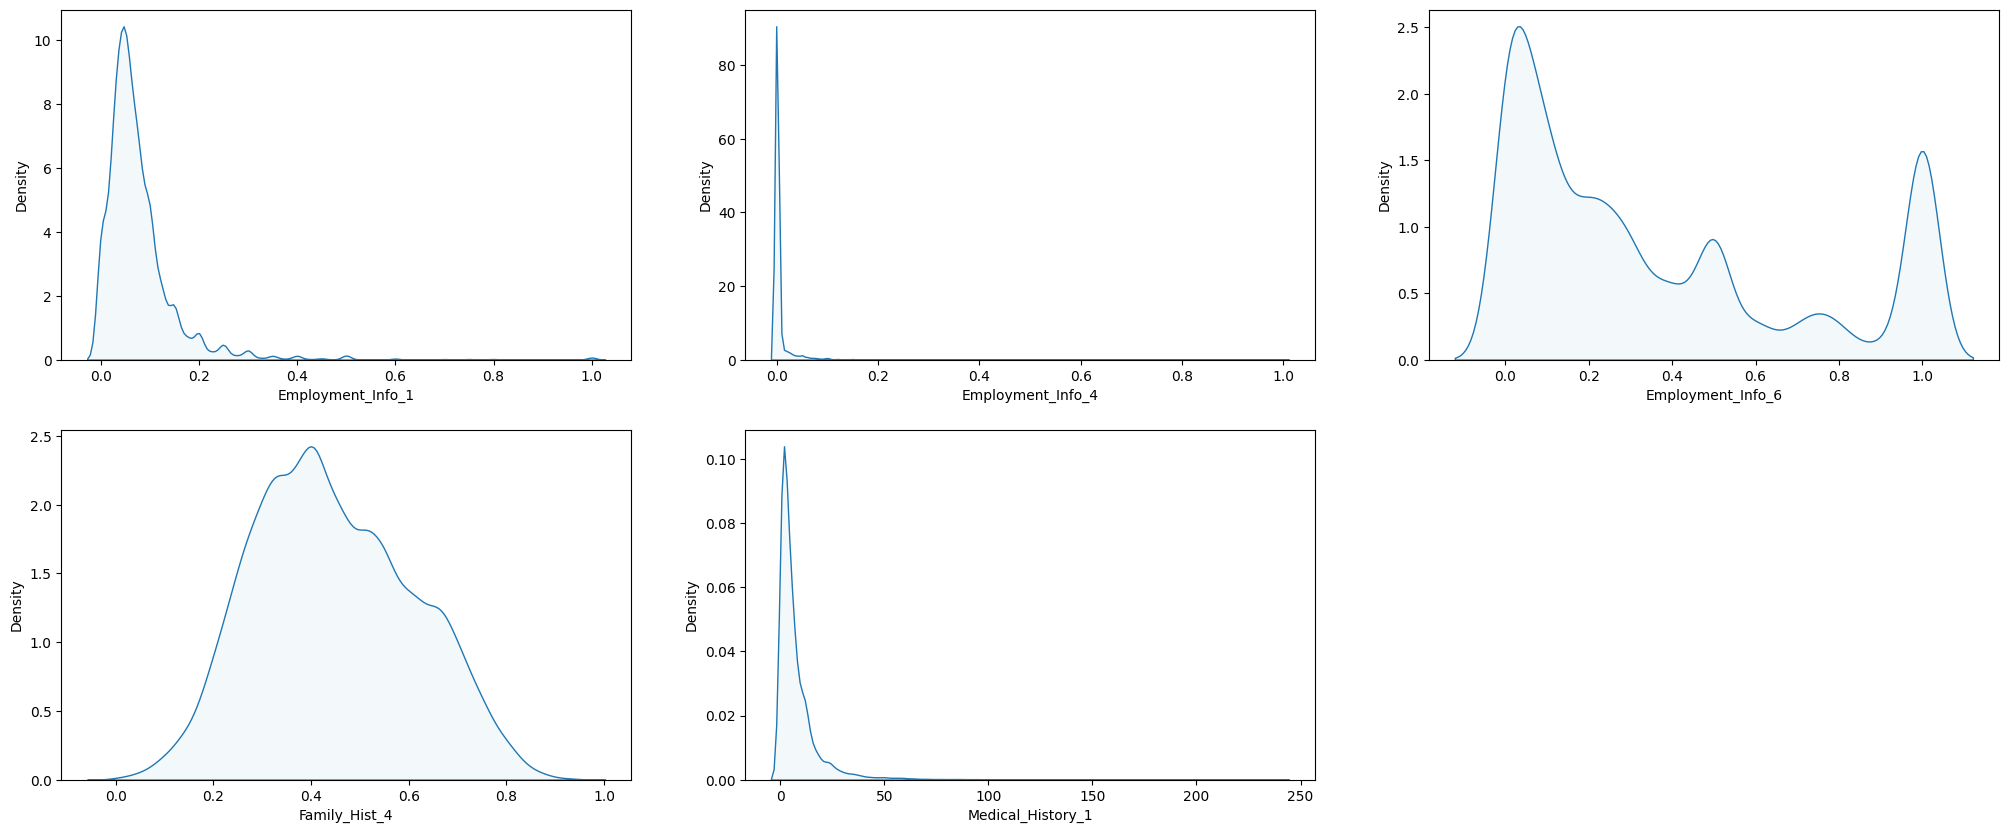

In [30]:
# KDE Plots - Before imputation.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

for i, column in enumerate(df_index_set[X_train_post_impute.columns].columns):
    sns.kdeplot(data=df_index_set[X_train_post_impute.columns],
                x=column,
                fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

fig.delaxes(axes[1,2])

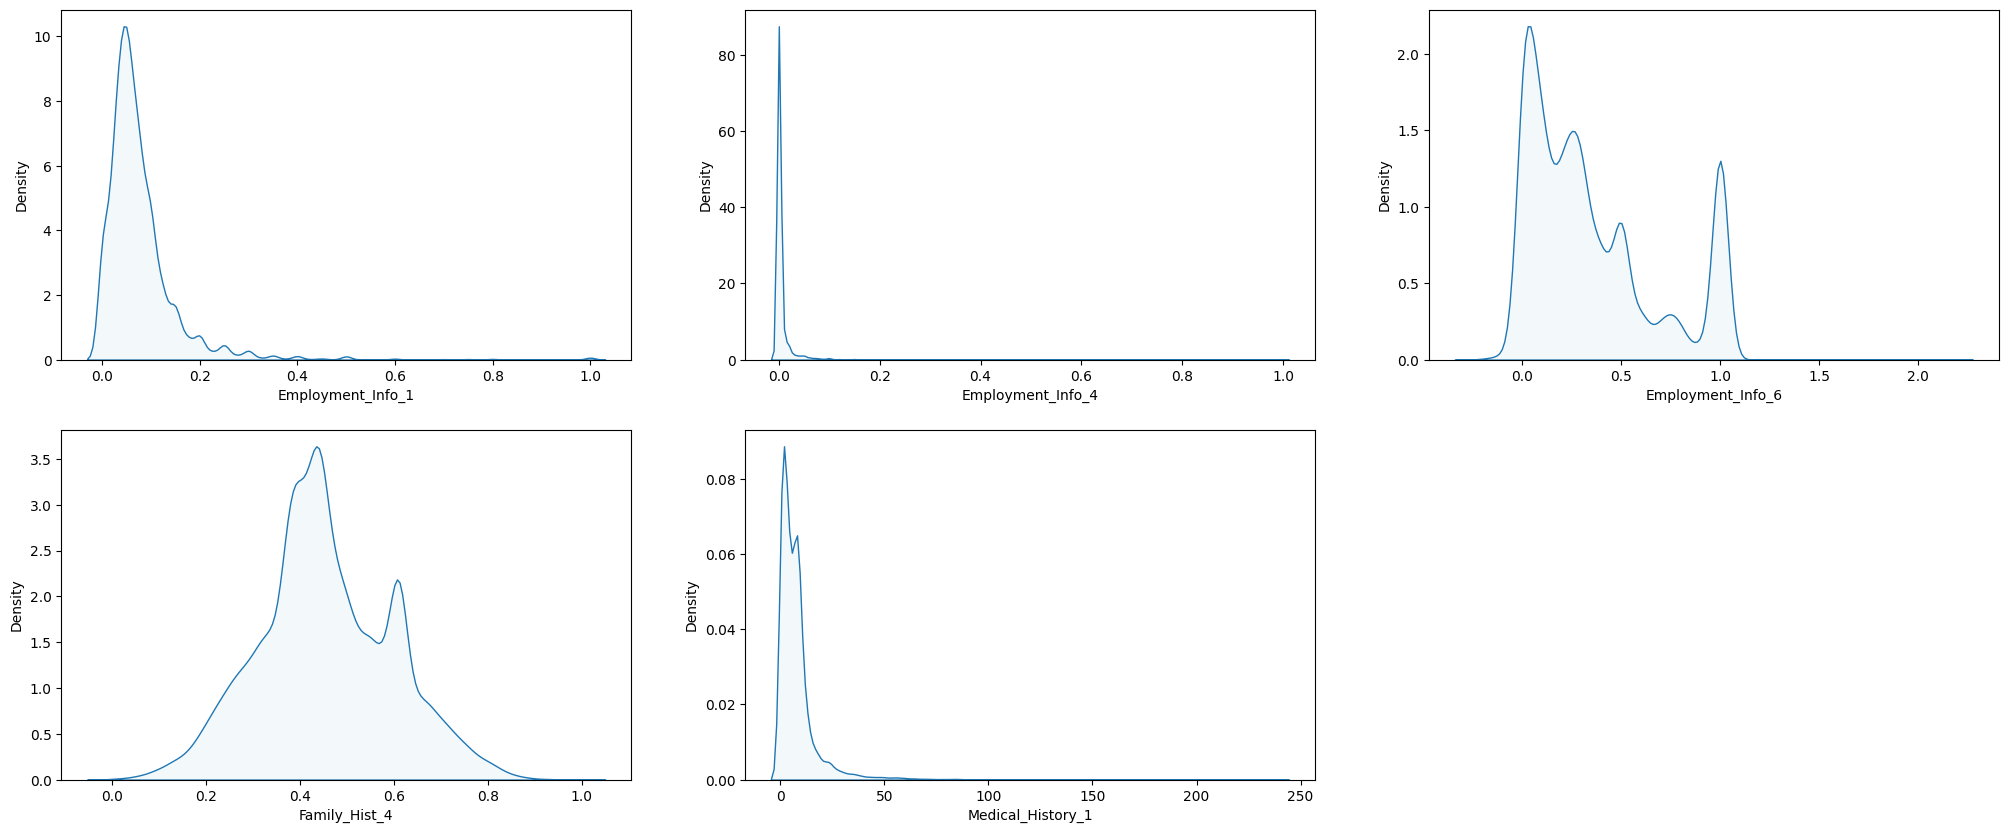

In [31]:
# KDE Plots - After imputation.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(25,10))

for i, column in enumerate(X_train_post_impute.columns):
    sns.kdeplot(data=X_train_post_impute,
                x=column,
                fill=True, common_norm=True, alpha=0.05,
                ax=axes[i//3,i%3])

fig.delaxes(axes[1,2])

As shown above, the distributions of three of the five columns remain largely unchanged. However, we have introduced additional probability density and peak splitting into `Family_Hist_4` (around x=0.4 and x=0.6) and `Medical_History_1` (around x=10).

It is important to be cautious later when evaluating the significance of these two features and explaining how predictions were generated for our chosen model. This is crucial because the changes in these distributions might influence how the model interprets and uses these features, potentially affecting the model's accuracy and reliability.

## 2.4 Review potential sources of data leakage

Data leakage or "data snooping" occurs when information from outside the training dataset is included in creating the model. We need to ensure that no aspect of data preprocessing, feature selection, or model evaluation is influenced by data that should not be known at the point of training. Examples of this includes data not available at the time of prediction and features based on the entire dataset, including the test set, rather than just the training set.

In this case the Response variable could artificially boost model performance and would not be indicative of real-world performance. Applying transformations such as scaling and normalization to the entire dataset before splitting would causes information leakage from the test set into the training process.

Other examples are when cross-validation folds are not properly managed, allowing data from the test fold to influence the training process, which can occur if time series data is randomly split without considering temporal order.Also including features directly correlated with the target variable but not available at the time of predictionc e.g. any variable that is a direct result of the target variable.

### Impact of Data Snooping

Impacts of data snooping would be that the above would results in the model appearing to perform much better on the test data than it would on unseen data. The model may not generalize well to new, unseen data because it has been influenced by information it wouldn't have in a real-world scenario.

### Avoiding Data Snooping

To avoid data snooping for this data set we take the following steps;

#### Data Splitting
We have split the data using train_test_split() into training, validation and test sets before any preprocessing steps.

#### Separate Data Processing
We apply data transformations within the training set only, and then apply the same transformations to the validation and test sets.

#### Feature Engineering
Generally we should perform feature engineering only on the training set and then apply the engineered features to the test set without recalculating.

#### Cross-Validation Practices
In general, we are using cross-validation techniques that respect the structure and any temporal aspects of the data (however we are not using timeseries data).

Carefully managing data preparation to ensure strict separation between training and evaluation phases, data snooping can be effectively avoided, leading to more accurate and reliable models.

# 3. Feature Engineering

## 3.1 Perform feature engineering (using training data)


In this section, we implement supervised (e.g. categorical encoding) and unsupervised (e.g. K-means clustering) learning techniques in order to create new features within our dataset that our models can be fitted to.

In [32]:
# Create a clone copy of each imputed dataset to avoid changing any original data.
copy_X_train_imputed = X_train_imputed.copy()
copy_X_val_imputed = X_val_imputed.copy()
copy_X_test_imputed = X_test_imputed.copy()

### 3.1.1 One-Hot Encoding

We will one-hot encode the `Product_Info_2` column, to convert any categorical inputs are to numerical, machine-interpretable values that can be supplied to each classification model.

In [33]:
from sklearn.preprocessing import OneHotEncoder

# Initialise a one-hot encoder to columns that contain categorical data.
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_col = ['Product_Info_2']

## We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't represented
## in the training data, setting sparse=False ensures that the encoded columns are returned as a numpy array
## (instead of a sparse matrix).

# Use the one-hot encoder to transform the categorical data columns.
OH_col_train = pd.DataFrame(OH_encoder.fit_transform(copy_X_train_imputed[OH_col]))
OH_col_val = pd.DataFrame(OH_encoder.transform(copy_X_val_imputed[OH_col]))
OH_col_test = pd.DataFrame(OH_encoder.transform(copy_X_test_imputed[OH_col]))

# One-hot encoding removes the index; re-assign the original index.
OH_col_train.index = copy_X_train_imputed.index
OH_col_val.index = copy_X_val_imputed.index
OH_col_test.index = copy_X_test_imputed.index

# Add column-labelling back in, using the get_feature_names_out() function.
OH_col_train.columns = OH_encoder.get_feature_names_out(OH_col)
OH_col_val.columns = OH_encoder.get_feature_names_out(OH_col)
OH_col_test.columns = OH_encoder.get_feature_names_out(OH_col)

# Create dataframes that only include the numerical features/columns (these will be concatenated with the one-hot encoded dataframes).
copy_X_train_imputed_no_OH_col = copy_X_train_imputed.drop(OH_col, axis=1)
copy_X_val_imputed_no_OH_col = copy_X_val_imputed.drop(OH_col, axis=1)
copy_X_test_imputed_no_OH_col = copy_X_test_imputed.drop(OH_col, axis=1)

# Concatenate the one-hot encoded columns with the existing numerical features/columns.
X_train_enc = pd.concat([copy_X_train_imputed_no_OH_col, OH_col_train], axis=1)
X_val_enc = pd.concat([copy_X_val_imputed_no_OH_col, OH_col_val], axis=1)
X_test_enc = pd.concat([copy_X_test_imputed_no_OH_col, OH_col_test], axis=1)

### 3.1.2 Scaling / Normalisation

Here, we perform min-max scaling on the encoded datasets, so that all features lie between 0 and 1 - so that, when training any of the classification models, all features will have variances with the same order of magnitude as each other. Thus, no single feature will dominate the objective function and prohibit the model from learning from other features correctly as expected.

In [34]:
from sklearn.preprocessing import MinMaxScaler

# Initialise the MinMaxScaler model, then fit it to the (encoded) training dataset.
MM_scaler = MinMaxScaler()
MM_scaler.fit(X_train_enc)

# Then, normalise/transform the training, validation and test datasets.
X_train_scale = pd.DataFrame(MM_scaler.transform(X_train_enc),
                             index=X_train_enc.index,
                             columns=X_train_enc.columns)

X_val_scale = pd.DataFrame(MM_scaler.transform(X_val_enc),
                             index=X_val_enc.index,
                             columns=X_val_enc.columns)

X_test_scale = pd.DataFrame(MM_scaler.transform(X_test_enc),
                             index=X_test_enc.index,
                             columns=X_test_enc.columns)

### 3.1.3 K-means clustering

We now use K-means clustering to group together applicants based on their commonalities. First we will train our K-means clustering algorithm using the training subset, before predicting cluster groups on all three subsets.

These cluster labels will be incorporated as an additional feature in our datasets, and may in fact prove to be useful in helping to understand applicants' risk rating assignments later on.

In [35]:
# Create copies of the scaled datasets, prior to performing K-Means clustering.
copy_X_train_scale = X_train_scale.copy()
copy_X_val_scale = X_val_scale.copy()
copy_X_test_scale = X_test_scale.copy()

from sklearn.cluster import KMeans

We now use the elbow-analysis method to determine the optimal number of clusters to use.

In [36]:
# Determine the optimal number of clusters.
# Method: Cluster the dataset into k clusters, then calculate the inertia/sum of squared distances.
# Repeat this by looping through k=1 to k=30.

Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(copy_X_train_scale)
    Sum_of_squared_distances.append(km.inertia_)

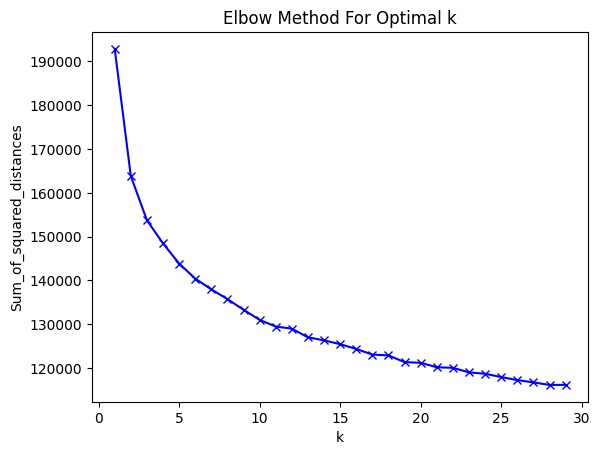

In [37]:
# Create a plot of K-values versus their respective inertias/sums of squared distances.
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

As shown above, the "elbow" of the curve begins to form at k=15.

Increasing k beyond this value does not yield a significant benefit in the rate of reduction in the training dataset's inertia - so, we will set k=15 when initialising the KMeans() clustering algorithm below.

In [38]:
# Set n_clusters=15, as derived from the elbow-method analysis above:
kmeans = KMeans(n_clusters=15, n_init=10, random_state=0)

# Fit the K-Means clustering algorithm to the training dataset, then predict the train/valid/test datasets.
copy_X_train_scale["Cluster"] = kmeans.fit_predict(copy_X_train_scale)
copy_X_val_scale["Cluster"] = kmeans.predict(copy_X_val_scale)
copy_X_test_scale["Cluster"] = kmeans.predict(copy_X_test_scale)

# Convert the cluster labels into one-hot encoded variants.
X_train_cluster_OH_enc = pd.get_dummies(copy_X_train_scale.Cluster).add_prefix('KMeansCluster_')
X_val_cluster_OH_enc = pd.get_dummies(copy_X_val_scale.Cluster).add_prefix('KMeansCluster_')
X_test_cluster_OH_enc = pd.get_dummies(copy_X_test_scale.Cluster).add_prefix('KMeansCluster_')

# Re-join the K-Means clustering labels onto the original dataframes.
X_train_KMeans = pd.concat([copy_X_train_scale, X_train_cluster_OH_enc], axis=1)
X_val_KMeans = pd.concat([copy_X_val_scale, X_val_cluster_OH_enc], axis=1)
X_test_KMeans = pd.concat([copy_X_test_scale, X_test_cluster_OH_enc], axis=1)

# Remove the initially derived "Cluster" columns from each dataset.
X_train_KMeans = X_train_KMeans.drop(['Cluster'], axis=1)
X_val_KMeans = X_val_KMeans.drop(['Cluster'], axis=1)
X_test_KMeans = X_test_KMeans.drop(['Cluster'], axis=1)

## 3.2 Perform feature selection (using validation data)

In this section, we use several methods to determine which features within our dataset will be most important for fitting each of the classification models - this is done in order to prevent overfitting.

At this stage, it is important to now switch over to using the validation dataset for feature selection/model refinement, so that we do not continually rely on the training dataset and risk invoking data leakage into our model generation process.

### 3.2.1 Method 1: Mutual Information (MI)

Here, we will calculate the MI scores of the validation dataset, using two custom functions that rely on the mutual_info_classif() function available within sklearn.

This will help us to understand whether there are any useful features in our dataset that should be preserved, during feature selection.

In [39]:
# Import the mutual_info_classif() class from sklearn.
from sklearn.feature_selection import mutual_info_classif

# Define a custom function that calculates Mutual Information (MI) scores for a given dataset.
def make_mi_scores(X, y):
    mi_scores = mutual_info_classif(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Define a custom function that plots MI scores in descending order (i.e. most important to least important).
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

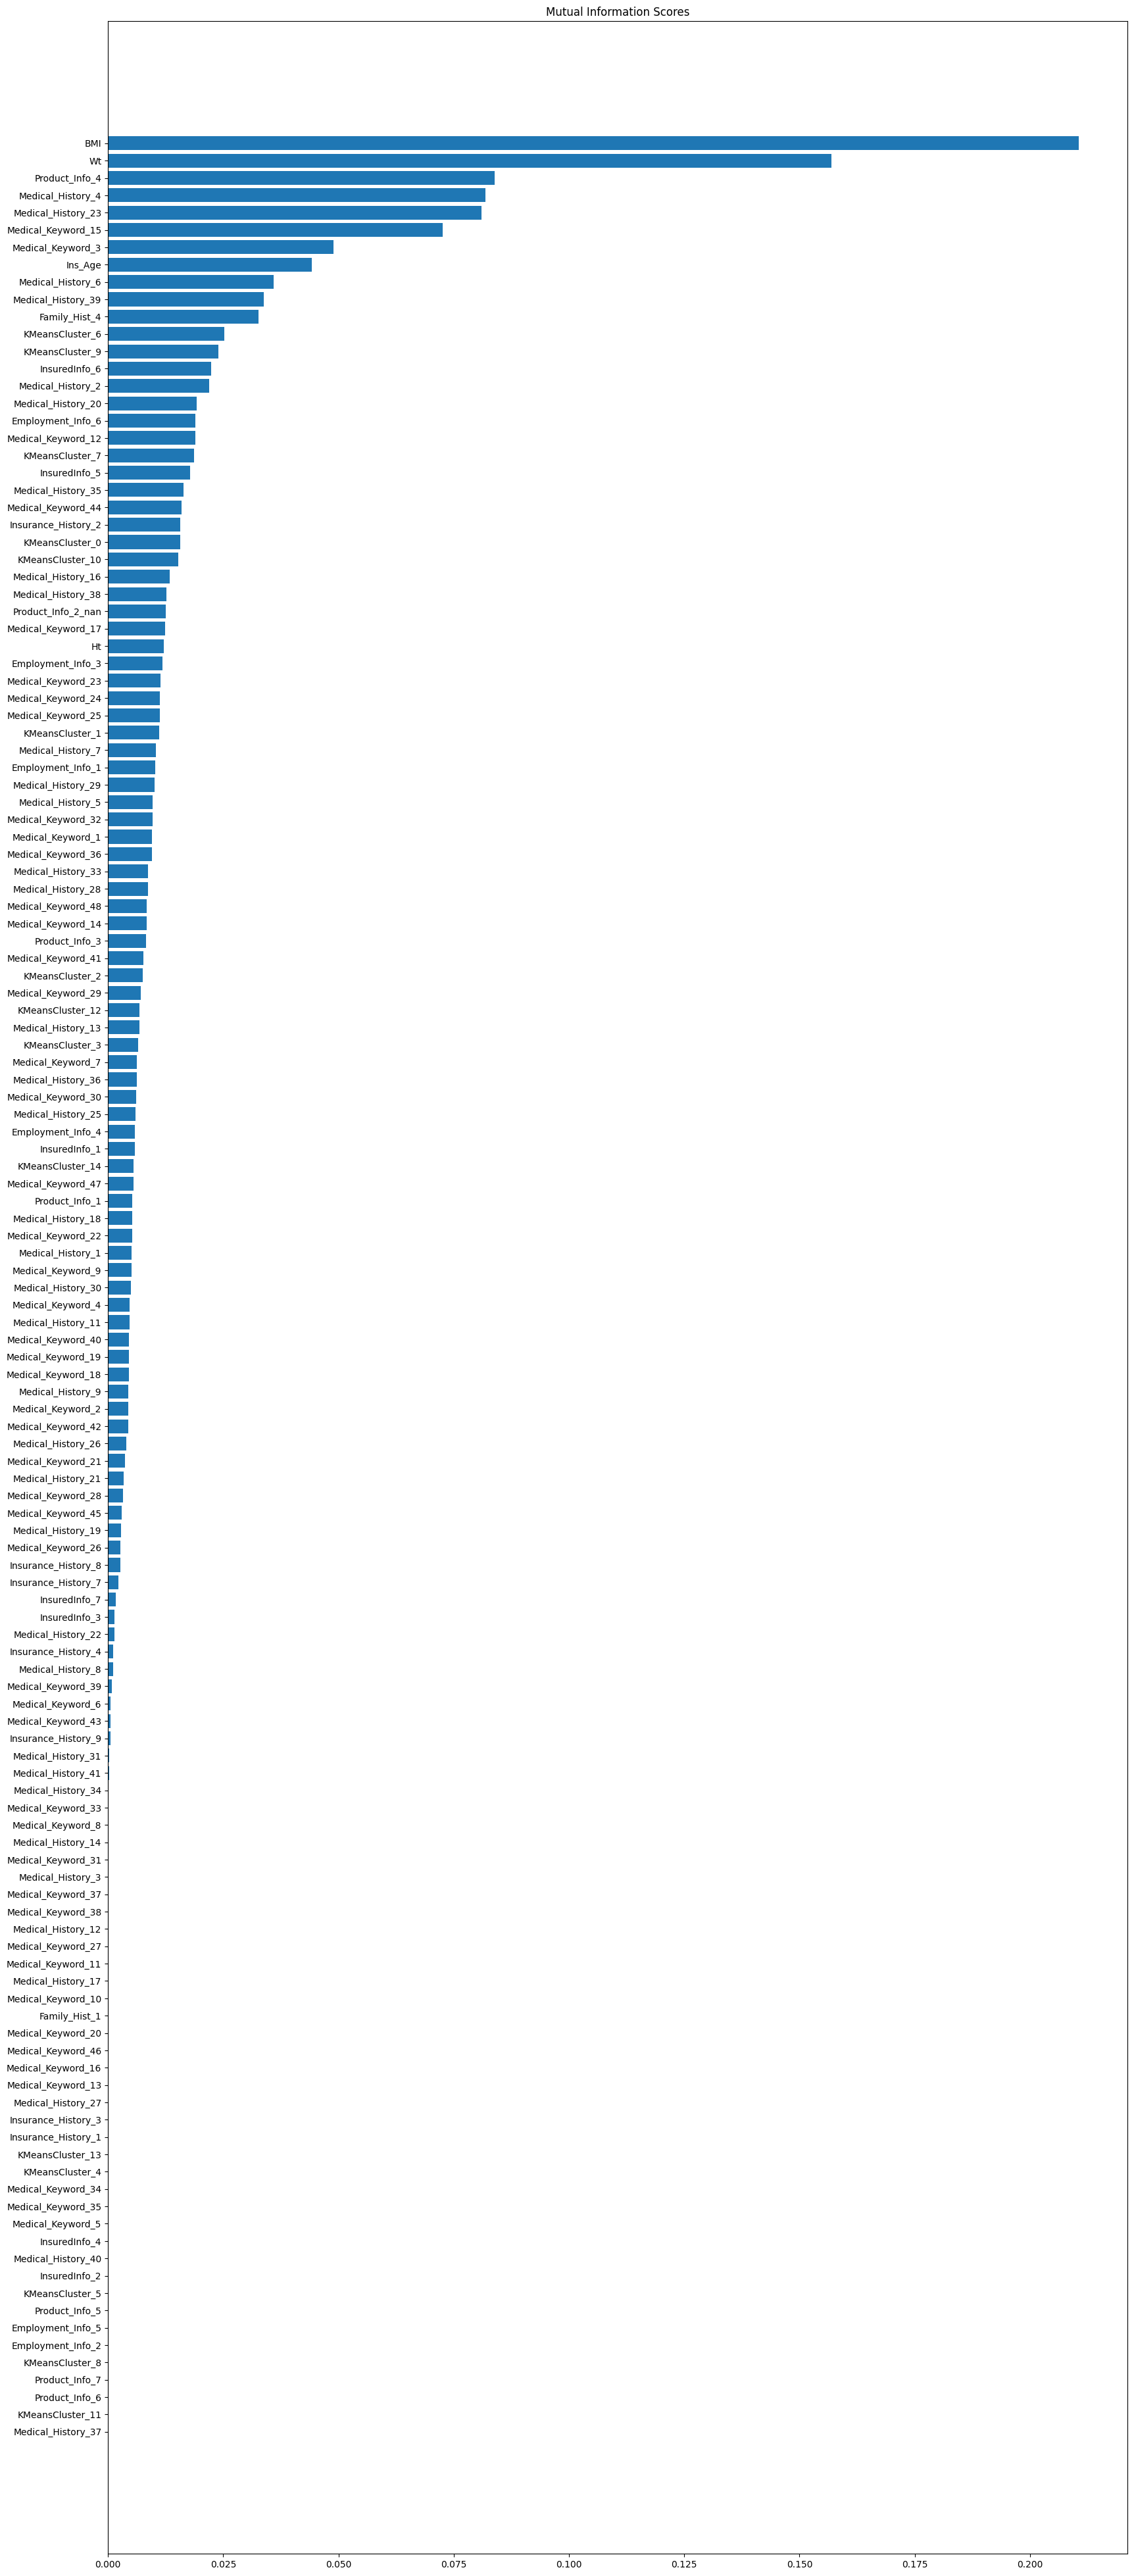

In [40]:
# Calculate MI scores on the validation dataset.
mi_scores_X_val = make_mi_scores(X_val_KMeans, y_val)

# Plot the MI scores obtained from the validation dataset.
plt.figure(dpi=100, figsize=(20,50))
plot_mi_scores(mi_scores_X_val)

From the chart above, we can see that the top 5 ranked features (in descending order) are BMI, Wt, Product_Info_4, Medical_Keyword_15, and Medical_History_23. This means that these features have strong statistical dependences with the Response variable, i.e. that they contribute significantly to reducing uncertainty in the value of the Response variable (given a known value of the feature).

Features that have low/zero MI scores indicate that they do not significantly contribute towards reducing this uncertainty, and are hence less useful for guiding our predictions.

### 3.2.2 Method 2: Multicollinearity analysis

We will now review our dataset via Variance Inflation Factor analysis, which is critical for detecting the presence of multicollinearity (i.e. where several independent variables in a model are highly correlated - hence resulting in less reliable statistical inferences).

This will help us to understand whether there are any redundant features in our dataset that should not be kept, during feature selection.

In [41]:
# Import variance_inflation_factor from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define a custom function that calculates variance inflation factor (VIF) scores - for determining multicollinearity.
def calc_vif(X):
    vif = pd.DataFrame()
    vif["Variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

# Select only numeric columns before calculating VIF
# Ensures that only numeric columns are passed to the calc_vif function, resolving the TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
X_val_KMeans_numeric = X_val_KMeans.select_dtypes(include=[np.number])

# Calculate VIF scores on the numeric columns of the validation dataset.
vif_scores = calc_vif(X_val_KMeans_numeric)
# "RuntimeWarning: divide by zero" can be safely ignored as this is caused by perfectly correlated dummy variables - see link below.

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


Variables          VIF
1         Product_Info_3    59.419387
6                Ins_Age    15.199446
7                     Ht  1468.410060
8                     Wt   580.891692
9                    BMI   574.150018
10     Employment_Info_2    10.707951
20   Insurance_History_1    69.910903
22   Insurance_History_3   134.378070
23   Insurance_History_4    22.562908
24   Insurance_History_7    48.202031
25   Insurance_History_8    40.892993
26   Insurance_History_9   270.113400
27         Family_Hist_1    13.659679
29     Medical_History_3    17.201201
32     Medical_History_6   902.477716
33     Medical_History_7    58.197347
34     Medical_History_8    26.104757
36    Medical_History_11   517.173109
37    Medical_History_12    47.592428
38    Medical_History_13    46.566427
39    Medical_History_14   151.063000
41    Medical_History_17   295.523219
44    Medical_History_20    61.270406
46    Medical_History_22    73.331654
47    Medical_History_23    23.133341
48    Medical_History_25    46.184935
49    Medical_History_26   989.508944
50    Medical_History_27    93.668434
53    Medical_History_30    43.152358
54    Medical_History_31   139.521735
55    Medical_History_33   875.322051
58    Medical_History_36   119.586731
59    Medical_History_37   165.544548
61    Medical_History_39    30.016709
62    Medical_History_40    60.073108
74    Medical_Keyword_11    10.333894
86    Medical_Keyword_23    98.798750
111   Medical_Keyword_48    52.167161
115        Family_Hist_4    25.742316

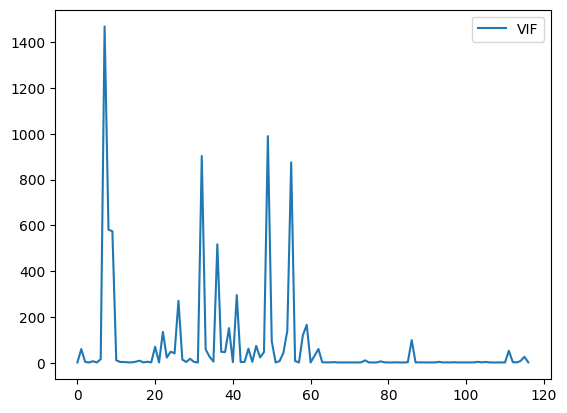

In [42]:
# Plot the VIF scores obtained from the validation dataset.
vif_scores.plot()

# Display all columns with VIF scores > 10.
vif_scores.loc[vif_scores['VIF'] > 10]

The features listed above have very high VIF scores, which indicate a high level of multicollinearity. However, in the edge cases where some of these values tend towards infinity, these can be discounted as they represent dummy variables that are perfectly anti-correlated (e.g. one applicant/row in the dataset can only belong to a single K-Means cluster).

More information on when it is safe to ignore multicollinearity can be found here: [Multicollinearity - Statistical Horizons](https://statisticalhorizons.com/multicollinearity/).

### 3.2.3 Method 3: Principal Component Analysis

Next, we will perform Principal Component Analysis in order to understand the most significant sources of variation within our dataset.

This will help us to understand whether there are particularly useful features in our dataset that should be preserved, during feature selection.

In [43]:
# Import/initialise key modules that will be used for visualising the Principal Component Analysis.
from IPython.display import display

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-43-d15a05cae365>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [44]:
# Define a custom function that plots the explained/cumulative variances for each Principal Component (PC) of a given dataset.

def plot_variance(pca, width=8, dpi=100):
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)

    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(xlabel="Component",
               title="% Explained Variance",
               ylim=(0.0, 0.2))

    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(xlabel="Component",
               title="% Cumulative Variance",
               ylim=(0.0, 1.0))

    fig.set(figwidth=8, dpi=100)
    return axs

In [45]:
from sklearn.decomposition import PCA

# Initialise the Principal Component Analysis (PCA) algorithm.
pca = PCA()

# Fit the PCA algorithm to the validation dataset, and generate its corresponding PCs.
X_val_pca = pca.fit_transform(X_val_KMeans)

# Create a list of labels for each PC, equal in length to the number of columns in the validation dataset.
X_val_component_names = [f"PC{i+1}" for i in range(X_val_pca.shape[1])]

# Create a dataframe that contains the PCs generated, along with their respective labels.
X_val_pca = pd.DataFrame(X_val_pca, columns=X_val_component_names)

array([<Axes: title={'center': '% Explained Variance'}, xlabel='Component'>,
       <Axes: title={'center': '% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

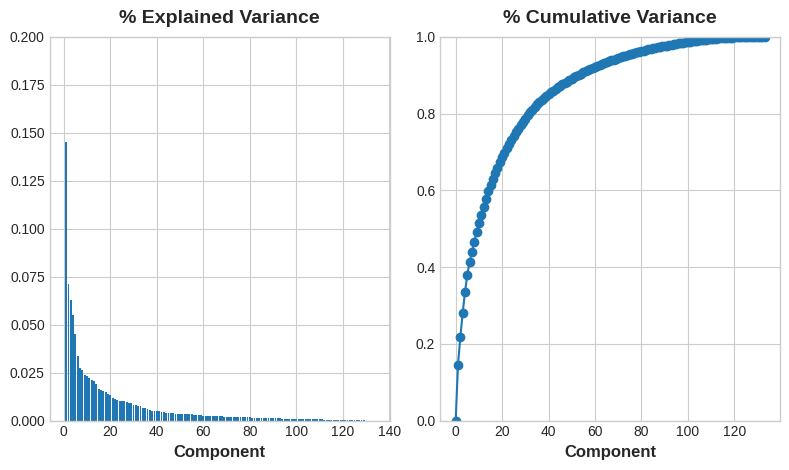

In [46]:
# Use the custom function to plot the explained/cumulative variances, for each PC, within the validation dataset.
plot_variance(pca)

In [47]:
# Calculate the cumulative sum of the explained variation ratios for the first 40 PCs in the validation dataset.
pca.explained_variance_ratio_[:40].cumsum()

array([0.14529995, 0.21669279, 0.27945884, 0.33438212, 0.37928974,
       0.41316568, 0.44038088, 0.46652328, 0.49044031, 0.51387267,
       0.53604237, 0.5574205 , 0.57782759, 0.59705266, 0.61368765,
       0.62938853, 0.6446959 , 0.65934068, 0.67331753, 0.68664331,
       0.69854487, 0.70970962, 0.7205915 , 0.73087523, 0.74101784,
       0.75100089, 0.76082404, 0.76999293, 0.77890026, 0.78709176,
       0.79521736, 0.8030616 , 0.81073709, 0.81734446, 0.82381988,
       0.82991673, 0.8353668 , 0.84056082, 0.8456746 , 0.85047768])

As shown in the cells above, the first 40 PCs contain just over 80% of the cumulative variance in the validation dataset.

This means that we can still capture a significant majority of the dataset's cumulative variance, were we to use a lower dimensionality feature-space instead, rather than simply using all features together.


In [48]:
# Create a dataframe which displays each principal component's loading/s on each original feature in the dataset.

X_val_loadings = pd.DataFrame(
    pca.components_.T,  # We need to transpose the matrix of loadings.
    columns=X_val_component_names,  # Columns are set as the principal components.
    index=X_val_KMeans.columns,  # Rows are set as the original features.
)
X_val_loadings


PC1       PC2       PC3       PC4       PC5       PC6  \
Product_Info_1   -0.003473 -0.004438 -0.014282 -0.000124  0.017949 -0.015054   
Product_Info_3    0.007491 -0.014935 -0.098987  0.013726 -0.027993 -0.079083   
Product_Info_4   -0.009546 -0.110137 -0.067372  0.009630 -0.001536 -0.121956   
Product_Info_5    0.002165 -0.002871 -0.007088 -0.000783 -0.000309 -0.004868   
Product_Info_6   -0.005520  0.006790  0.032885 -0.012801 -0.034091  0.141275   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.059612  0.118422 -0.007236  0.176946 -0.076370  0.046052   
KMeansCluster_11  0.044107  0.078022  0.007703 -0.043106  0.043270 -0.027364   
KMeansCluster_12 -0.142936 -0.018672  0.154990 -0.038907  0.006804 -0.031683   
KMeansCluster_13 -0.032941 -0.014148 -0.019433 -0.003835 -0.039033 -0.033990   
KMeansCluster_14  0.036168 -0.103100  0.142463  0.142312  0.033878  0.112440   

                       PC7       PC8       PC9      PC10  ...     PC124  \
Product_Info_1   -0.012031  0.018022 -0.009621  0.002674  ...  0.001862   
Product_Info_3   -0.095707 -0.073110  0.086326  0.050611  ... -0.009769   
Product_Info_4   -0.046473  0.040036 -0.047143  0.008175  ...  0.001692   
Product_Info_5    0.003410  0.003749 -0.002889  0.002892  ... -0.001854   
Product_Info_6    0.083368 -0.211464  0.138044  0.178447  ...  0.001036   
...                    ...       ...       ...       ...  ...       ...   
KMeansCluster_10 -0.045946 -0.012779 -0.035626 -0.003083  ... -0.019349   
KMeansCluster_11  0.058590  0.054299  0.068636  0.064101  ...  0.018799   
KMeansCluster_12 -0.208860 -0.226843  0.221007  0.099087  ... -0.001659   
KMeansCluster_13  0.008891  0.028723  0.001954 -0.030800  ...  0.001967   
KMeansCluster_14 -0.052110 -0.043677  0.009054  0.000274  ... -0.022947   

                     PC125     PC126     PC127     PC128     PC129     PC130  \
Product_Info_1    0.000378 -0.000466 -0.000727 -0.000170 -0.002052 -0.001185   
Product_Info_3   -0.005066 -0.003095 -0.001474 -0.001587  0.001958  0.001149   
Product_Info_4   -0.000565 -0.006857  0.000704 -0.001196  0.000073 -0.000249   
Product_Info_5    0.001122 -0.007394  0.000226 -0.000085  0.000185 -0.000384   
Product_Info_6   -0.000353  0.000207  0.000069 -0.000068  0.000081 -0.000369   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10 -0.002207  0.010489  0.003446  0.001338  0.000143 -0.215718   
KMeansCluster_11 -0.000507 -0.008574  0.000483  0.001113 -0.000763 -0.228804   
KMeansCluster_12  0.000614 -0.000222  0.001130 -0.000837 -0.000933  0.252850   
KMeansCluster_13  0.001507  0.002954  0.000909 -0.000614  0.007558  0.254139   
KMeansCluster_14 -0.001059  0.006117 -0.001420 -0.000473  0.000420 -0.212347   

                     PC131         PC132         PC133  
Product_Info_1    0.000644 -2.095045e-16 -0.000000e+00  
Product_Info_3    0.001351 -4.191558e-16 -2.419737e-17  
Product_Info_4    0.000083 -6.808265e-17  1.567277e-17  
Product_Info_5    0.001266  2.029525e-16 -5.279277e-18  
Product_Info_6   -0.000385 -1.396505e-17 -2.863651e-18  
...                    ...           ...           ...  
KMeansCluster_10  0.002141 -2.581989e-01  5.280954e-15  
KMeansCluster_11  0.001492 -2.581989e-01  5.316177e-15  
KMeansCluster_12 -0.004759 -2.581989e-01  5.264021e-15  
KMeansCluster_13 -0.000159 -2.581989e-01  5.253659e-15  
KMeansCluster_14 -0.001053 -2.581989e-01  5.218486e-15  

[133 rows x 133 columns]

We can also display how each principal component is comprised, in terms of the original features' loadings.

Hence, when looking in the top 40 principal components, we can see which of the original features contribute most strongly towards the cumulative variance of the validation dataset.

In [49]:
X_val_loadings_first40 = X_val_loadings.iloc[:, :40]
X_val_loadings_first40

PC1       PC2       PC3       PC4       PC5       PC6  \
Product_Info_1   -0.003473 -0.004438 -0.014282 -0.000124  0.017949 -0.015054   
Product_Info_3    0.007491 -0.014935 -0.098987  0.013726 -0.027993 -0.079083   
Product_Info_4   -0.009546 -0.110137 -0.067372  0.009630 -0.001536 -0.121956   
Product_Info_5    0.002165 -0.002871 -0.007088 -0.000783 -0.000309 -0.004868   
Product_Info_6   -0.005520  0.006790  0.032885 -0.012801 -0.034091  0.141275   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.059612  0.118422 -0.007236  0.176946 -0.076370  0.046052   
KMeansCluster_11  0.044107  0.078022  0.007703 -0.043106  0.043270 -0.027364   
KMeansCluster_12 -0.142936 -0.018672  0.154990 -0.038907  0.006804 -0.031683   
KMeansCluster_13 -0.032941 -0.014148 -0.019433 -0.003835 -0.039033 -0.033990   
KMeansCluster_14  0.036168 -0.103100  0.142463  0.142312  0.033878  0.112440   

                       PC7       PC8       PC9      PC10  ...      PC31  \
Product_Info_1   -0.012031  0.018022 -0.009621  0.002674  ... -0.008714   
Product_Info_3   -0.095707 -0.073110  0.086326  0.050611  ... -0.025457   
Product_Info_4   -0.046473  0.040036 -0.047143  0.008175  ...  0.030599   
Product_Info_5    0.003410  0.003749 -0.002889  0.002892  ... -0.005219   
Product_Info_6    0.083368 -0.211464  0.138044  0.178447  ...  0.018951   
...                    ...       ...       ...       ...  ...       ...   
KMeansCluster_10 -0.045946 -0.012779 -0.035626 -0.003083  ... -0.219431   
KMeansCluster_11  0.058590  0.054299  0.068636  0.064101  ... -0.098247   
KMeansCluster_12 -0.208860 -0.226843  0.221007  0.099087  ...  0.039628   
KMeansCluster_13  0.008891  0.028723  0.001954 -0.030800  ... -0.049654   
KMeansCluster_14 -0.052110 -0.043677  0.009054  0.000274  ... -0.225240   

                      PC32      PC33      PC34      PC35      PC36      PC37  \
Product_Info_1    0.017721 -0.014859  0.073600  0.011596 -0.055328  0.002431   
Product_Info_3    0.005632 -0.006419  0.036908  0.006705 -0.015291  0.025262   
Product_Info_4    0.023425  0.023594  0.009037  0.003615 -0.000122 -0.046211   
Product_Info_5   -0.000695  0.001415 -0.000169  0.009121 -0.005598 -0.006721   
Product_Info_6    0.003400  0.025834 -0.071225 -0.015864  0.030510  0.023333   
...                    ...       ...       ...       ...       ...       ...   
KMeansCluster_10  0.009187 -0.026141 -0.038107 -0.010556 -0.004312 -0.036547   
KMeansCluster_11 -0.034565 -0.109847  0.070025  0.011496  0.141534  0.319615   
KMeansCluster_12 -0.023886 -0.039149  0.018120  0.015739  0.014195  0.008365   
KMeansCluster_13  0.037776  0.056512  0.023175  0.006704 -0.042584 -0.034808   
KMeansCluster_14 -0.031446 -0.147067 -0.008913  0.002537  0.012283 -0.061260   

                      PC38      PC39      PC40  
Product_Info_1   -0.006116 -0.019412  0.008023  
Product_Info_3   -0.046750  0.030675  0.013605  
Product_Info_4    0.052205  0.011736  0.011811  
Product_Info_5   -0.000021  0.001008  0.003209  
Product_Info_6   -0.024299  0.002682 -0.006521  
...                    ...       ...       ...  
KMeansCluster_10 -0.038596  0.055670 -0.022016  
KMeansCluster_11  0.134432  0.020186  0.401087  
KMeansCluster_12  0.198855 -0.322424 -0.017868  
KMeansCluster_13 -0.044977 -0.025394  0.325390  
KMeansCluster_14  0.010386 -0.150626  0.040877  

[133 rows x 40 columns]

In [50]:
useful_cols = []

# Visualise which columns in the top 40 PCs contain notable variance (i.e. where the absolute value of the columns's PC loading is > 0.25).
for col in X_val_loadings_first40.columns:
    cols = X_val_loadings_first40[col].loc[abs(X_val_loadings_first40[col]) > 0.25]
    cols_df = pd.DataFrame(cols)
    useful_cols.append(cols_df)

useful_cols

[                          PC1
 Insurance_History_1 -0.299975
 Insurance_History_3  0.496448
 Insurance_History_4 -0.467338
 Insurance_History_7 -0.475071
 Insurance_History_9 -0.252445,
                          PC2
 Medical_History_23 -0.481738
 Medical_History_29 -0.251928
 Medical_History_41  0.272282
 Medical_Keyword_15  0.433706,
                         PC3
 InsuredInfo_6      0.680720
 Medical_History_4  0.380813,
                           PC4
 Insurance_History_1  0.554252
 Insurance_History_8  0.608087
 KMeansCluster_4     -0.273820,
                          PC5
 Medical_History_4  -0.440951
 Medical_History_23  0.320319
 Medical_History_33 -0.285486
 Medical_History_41  0.394491
 Medical_Keyword_15 -0.303479
 Medical_Keyword_23  0.286546,
                          PC6
 InsuredInfo_6       0.290524
 Medical_History_4  -0.376355
 Medical_History_29  0.329966
 Medical_History_41 -0.536761,
                          PC7
 Employment_Info_3   0.395452
 Employment_Info_5   0.3446

The cell above indicates which columns/features appear most commonly throughout the top 40 PCs (which contain over 80% of the cumulative variance in the dataset).

The more frequently a column name appears above, the more indicative this is that the column is useful for capturing significant variance within the dataset. It is thus more important for the models to place greater importance on these features later on.

### 3.3.4 Method 4: Lasso (L1) Regularisation

Finally, we will perform feature selection via L1 (lasso) regularisation using functions that are readily available in sklearn - for more information, see this link: [Feature Selection via scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html#l1-based-feature-selection)

In [51]:
# Import key modules in order to perform LASSO-based feature selection.
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

# Establish the Lasso (L1) Regularisation model that will perform feature selection.
linearsvc = LinearSVC(penalty="l1", dual=False, tol=1e-3, C=1e-2, random_state=0).fit(X_val_KMeans, y_val)
model = SelectFromModel(linearsvc, prefit=True)

# Reduce the dataset to the most important features, using the regularisation model above.
X_val_L1 = model.transform(X_val_KMeans)

# Convert the transformed dataset into a dataframe with the same size/shape as the original dataset.
# For features that were previously removed, this dataset will now include zeroes instead of their original values.
selected_features = pd.DataFrame(model.inverse_transform(X_val_L1),
                                 index=X_val_KMeans.index,
                                 columns=X_val_KMeans.columns)

# Drop columns from the dataframe where features are deemed unimportant in capturing the dataset's variance.
# To achieve this, we selectively drop columns where their variance is equal to 0 (i.e. where a column only contains zeroes).
X_val_L1reg = selected_features.drop(selected_features.columns[selected_features.var() == 0], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [52]:
# Determine the number of columns that are kept after L1 regularisation.

len(selected_features.columns[selected_features.var() != 0])

51

We have now reduced our dataset down to 57 features, from a starting value of 126.

Next, we will transform our training/test subsets so that they are now constrained to the same set of columns as derived above.

In [53]:
# Produce a separate list containing the columns preserved after L1 regularisation.
selected_columns = selected_features.columns[selected_features.var() != 0]

# Reduce the training/test datasets to the same set of columns.
X_train_L1reg = X_train_KMeans[selected_columns]
X_test_L1reg = X_test_KMeans[selected_columns]

# 4. Modeling

## 4.1 Define Models

In this project, we aim to predict the target (Response) as well as the likelihood of belonging to the predicted group using the following approaches:

### Logistic/Softmax Regression
**Softmax Regression** is a generalised form of the standard logistic regression model. Given an instance  
$\mathbf{X}$, input features are supplied to the model in order to compute a score for each class - then, the probability of $\mathbf{X}$ belonging to each class is estimated by applying the softmax function (which calculates the exponential of every score, then normalises them). Then, the algorithm returns a prediction as the class with the highest estimated probability (simply the class with the highest score).

### Gaussian Naive Bayes
**Gaussian Naive Bayes** works as an extension of Naive Bayes (which is termed as "naive" due to its main assumption that all features are independent), by instead assuming that each feature within the data can be represented by a normal/Gaussian distribution. As a result, we only need to calculate the mean/standard deviation of each Gaussian distribution in order to predict the likelihood of an instance belonging to a given class, reducing computational complexity as compared to using other Bayesian methods.

### Support Vector Machines
**Support Vector Machines** are capable of performing linear or nonlinear classification, and are particularly well-suited for classification of complex small- and medium-sized datasets/segmentation of high dimensionality feature spaces. They essentially work by fitting the widest possible margin between each of the classes, as a function of each of the dataset's features. As can be imagined, this technique is sensitive to feature scaling, which is why min-max scaling was performed earlier above.

### Decision Trees/Random Forests
**Decision Trees** are powerful and versatile algorithms that are capable of fitting to/classifying complex datasets. They are generated by splitting a training dataset into two subsets recursively, based on a single feature and a corresponding threshold value (which are chosen as the pair that produces subsets with the lowest possible Gini impurity).

**Random Forest Classification** works by training multiple decision trees, based on the random sampling (with replacement) of a training dataset. Input features from an unseen dataset can then be supplied to each trained decision tree in order to generate a prediction, which is subsequently averaged across all predictions to produce a final classification output; averaging across all predictions has the benefit of reducing overfitting to any given random sample within the training set.

### Gradient Boosting Classifiers
Boosting refers to any ensemble method that combines several weak "learners" into a strong learner. Usually, this is accomplished by training predictors sequentially, where each tries to correct its predecessor.

With **AdaBoost classifiers**, a base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The algorithm then increases the relative weight of misclassified training instances, and then trains a second classifier using the updated weights, before making a new set of predictions. This loop is usually repeated up until there is no significant improvement in the last round's performance, or until the maximum number of iterations has been reached.

In the case of **Gradient Boosting classifiers**, the algorithm works very similarly to that used for training AdaBoost classifiers, which is by sequentially adding predictors to an ensemble - except for that, instead of updating instance weights at every iteration, the next predictor is instead fitted to the residual errors made by the previous predictor. Over the course of several iterations, this can lead to a highly refined model which is capable of recognising complex nuances in the training dataset and providing accurate classifications, however care must also be taken to avoid overfitting.

In [54]:
# Import the classification models from sklearn/xgboost.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

## 4.2 Optimize Hyperparameters

Here, we will utilise exhaustive grid-search methods in order to optimise several of the models' hyperparameters. These are:

### LogisticRegression

`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.

### GaussianNB

`var_smoothing` represents the degree to which we widen/"smooth" our Gaussian distributions, to account for additional samples that are further away from the distribution mean.
`SVC(kernel="linear")`

`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.

### LinearSVC

`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
`SVC(kernel="poly")`

`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
degree represents the degree of the polynomial kernel function that we want the model to fit.
`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
`SVC(kernel="rbf")`

`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.
`SVC(kernel="sigmoid")`

`C` represents the inverse of the regularisation strength, thus determining how strongly the model fits to the data.
`tol` represents the tolerance for the stopping criteria, i.e. the minimum step size of the loss function's improvement.

### DecisionTreeClassifier

`max_depth` represents the maximum depth of the tree, thus determining how strongly the model fits to the data.
`max_features` represents the number of features to consider, when looking for the optimum split.

### RandomForestClassifier

`n_estimators` represents the number of decision trees that are implemented by the random forest classifier.
`max_depth` represents the maximum depth of the tree, thus determining how strongly the model fits to the data.
`max_features` represents the number of features to consider, when looking for the optimum split.

### AdaBoostClassifier

`n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.
`learning_rate` represents the contribution weighting applied to each decision tree, at each boosting iteration.

### GradientBoostingClassifier

`learning_rate` represents the contribution weighting applied to each decision tree, at each boosting iteration.
`n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.

### XGBClassifier

`n_estimators` represents the maximum number of boosting rounds/decision trees to be used, at which point the boosting process is terminated.
learning_rate represents the contribution weighting applied to each decision tree, at each boosting iteration.

More information regarding exhaustive grid-search methods can be found at the following page: Exhaustive grid-search methods for tuning hyperparameters - [scikit-learn](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search).

In [55]:
# Import the GridSearchCV function from sklearn.

from sklearn.model_selection import GridSearchCV

### 4.2.1 Initialise each model

We set up each of the classifiers as baseline models, by initialising each model as a new object.

In [56]:
## Initialise each classifier - these are capable of providing predictions as well as their associated probabilities/likelihoods/confidences.

### Logistic/softmax regressors
Model1_Base = LogisticRegression(random_state=0,
                                 solver='liblinear')

### Naive Bayes classifiers
Model2_Base = GaussianNB()

### Support Vector Machines (linear/non-linear)
Model3_Base = SVC(kernel='linear',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model4_Base = LinearSVC(dual=False,
                        random_state=0,
                        max_iter=1000)

Model5_Base = SVC(kernel='poly',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model6_Base = SVC(kernel='rbf',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

Model7_Base = SVC(kernel='sigmoid',
                  probability=True,
                  max_iter=1000,
                  random_state=0)

### Decision Trees
Model8_Base = DecisionTreeClassifier(random_state=0)

### Random Forests
Model9_Base = RandomForestClassifier(n_jobs=-1,
                                     random_state=0)

### Gradient Boosting Machines
Model10_Base = AdaBoostClassifier(random_state=0)

Model11_Base = GradientBoostingClassifier(random_state=0)

Model12_Base = XGBClassifier(random_state=0,
                             n_jobs=-1,
                             eval_metric="merror")

### 4.2.2 Declare the hyperparameter grids for each model

Next, we declare the models' parameter grids that we require the grid-searches to be performed over.

In [57]:
# Config for model 1 - LogisticRegression.
param_grid_model1 = {'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001],
                     'C': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001]}


# Config for model 2 - GaussianNB.
param_grid_model2 = {'var_smoothing': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06, 1e-07, 1e-08, 1e-09, 1e-10]}


# Config for model 3 - SVC (linear kernel).
param_grid_model3 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 4 - LinearSVC.
param_grid_model4 = {'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06],
                     'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}


# Config for model 5 - SVC (polynomial kernel).
param_grid_model5 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'degree': [0, 1, 2, 3, 4, 5, 6],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 6 - SVC (rbf kernel).
param_grid_model6 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 7 - SVC (sigmoid kernel).
param_grid_model7 = {'C': [100, 10, 1.0, 0.1, 0.01, 0.001],
                     'tol': [1e-01, 1e-02, 1e-03, 1e-04, 1e-05, 1e-06]}


# Config for model 8 - DecisionTreeClassifier.
param_grid_model8 = {'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                     'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}


# Config for model 9 - RandomForestClassifier.
param_grid_model9 = {'n_estimators': [10, 100, 250, 500, 1000],
                     'max_depth': [5, 10, 15, 20, 25, 30, 35, 40],
                     'max_features': [0.2, 0.4, 0.6, 0.8, 1.0]}


# Config for model 10 - AdaBoostClassifier.
param_grid_model10 = {'n_estimators': [10, 100, 250, 500, 1000],
                      'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05]}


# Config for model 11 - GradientBoostingClassifier.
param_grid_model11 = {'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05],
                      'n_estimators': [10, 100, 250, 500, 1000]}


# Config for model 12 - XGBClassifier.
param_grid_model12 = {'n_estimators': [10, 100, 250, 500, 1000],
                      'learning_rate': [1e-0, 1e-01, 1e-02, 1e-03, 1e-04, 1e-05]}

# Create a list containing each of the baseline models.
BaseModels = [Model1_Base, Model2_Base, Model3_Base,
              Model4_Base, Model5_Base, Model6_Base,
              Model7_Base, Model8_Base, Model9_Base,
              Model10_Base, Model11_Base, Model12_Base]

# Create a list containing each of the model's parameter-grid dictionaries.
ParamGrids = [param_grid_model1, param_grid_model2, param_grid_model3,
              param_grid_model4, param_grid_model5, param_grid_model6,
              param_grid_model7, param_grid_model8, param_grid_model9,
              param_grid_model10, param_grid_model11, param_grid_model12]


### 4.2.3 Define a custom gridsearch function to time each experiment

In order to run each grid-search consecutively in a single loop, we define a custom function that performs a grid-search optimisation for a given model, and returns an object containing a set of optimised hyperparameters that can be easily retrieved afterwards.

In [58]:
from datetime import datetime
import pytz

# Define a custom function that performs a grid-search for a given model and parameter grid.
def GridSearcher(model, param_grid):
    ## Startup
    timezone = pytz.timezone('Europe/London')
    start_time = datetime.now(timezone)
    print("Running GridSearchCV for:", str(model))
    print("Starting at:",start_time.strftime("%H:%M:%S"))

    ## Perform the grid-search
    GridSearcher = GridSearchCV(model, param_grid, scoring='balanced_accuracy', refit=False, error_score='raise', verbose=2)
    GridSearcher.fit(X_valid_L1reg, y_valid)
    # HOLDOUT n_jobs=-1

    ## Finish
    finish_time = datetime.now(timezone)
    print("Finished at:", finish_time.strftime("%H:%M:%S"))
    duration = finish_time - start_time
    dur = divmod(duration.seconds, 60)
    print("Duration: ", dur[0], 'minutes', dur[1], 'seconds')
    return GridSearcher

### 4.2.4 Run grid-searches for all models

For each model, we loop through the custom grid-search function and retrieve its optimised hyperparameters.

**This section takes several hours to run.**

In [59]:
##     tz = pytz.timezone('Europe/London')
##     start = datetime.now(tz)
##     print("GridSearchCV runs starting at:",start.strftime("%H:%M:%S"))

##     for i in range(0, 12):
##         GridSearchResult = GridSearcher(BaseModels[i], ParamGrids[i])
##         print(GridSearchResult.best_params_)
##         GridSearchResults.append(GridSearchResult)

##     finish = datetime.now(tz)
##     print("GridSearchCV runs finished at:", finish.strftime("%H:%M:%S"))
##     duration = finish - start
##     dur = divmod(duration.seconds, 60)
##     print("Total Duration: ", dur[0], 'minutes', dur[1], 'seconds')

##     for i in GridSearchResults:
##         print(i.best_params_)

In [60]:
# The following sets of optimised hyperparameters were obtained via the cell above.

Model1_Opt_Params = {'C': 100.0, 'tol': 0.01}
Model2_Opt_Params = {'var_smoothing': 0.0001}
Model3_Opt_Params = {'C': 1.0, 'tol': 0.1}
Model4_Opt_Params = {'C': 100, 'tol': 0.001}
Model5_Opt_Params = {'C': 0.1, 'degree': 6, 'tol': 0.1}
Model6_Opt_Params = {'C': 10, 'tol': 0.01}
Model7_Opt_Params = {'C': 1.0, 'tol': 0.01}
Model8_Opt_Params = {'max_depth': 10, 'max_features': 0.8}
Model9_Opt_Params = {'max_depth': 40, 'max_features': 0.6, 'n_estimators': 1000}
Model10_Opt_Params = {'learning_rate': 1.0, 'n_estimators': 100}
Model11_Opt_Params = {'learning_rate': 0.1, 'n_estimators': 250}
Model12_Opt_Params = {'learning_rate': 1.0, 'n_estimators': 10}

# Create a list containing each of the models' optimised hyperparameters.
OptimisedParams = [Model1_Opt_Params, Model2_Opt_Params, Model3_Opt_Params,
                   Model4_Opt_Params, Model5_Opt_Params, Model6_Opt_Params,
                   Model7_Opt_Params, Model8_Opt_Params, Model9_Opt_Params,
                   Model10_Opt_Params, Model11_Opt_Params, Model12_Opt_Params]

### 4.2.5 Update all baseline models to use optimised hyperparameters

Finally, we update the baseline models declared earlier above, by passing the optimised hyperparameters to each model using the `.set_params(**kwargs)` method.

In [61]:
OptimisedModels = []

# Update each of the baseline models to include their (respective) optimised hyperparameters.
for i in range(0, 12):
    OptimisedModel = BaseModels[i].set_params(**OptimisedParams[i])
    OptimisedModels.append(OptimisedModel)

OptimisedModels

[LogisticRegression(C=100.0, random_state=0, solver='liblinear', tol=0.01),
 GaussianNB(var_smoothing=0.0001),
 SVC(kernel='linear', max_iter=1000, probability=True, random_state=0, tol=0.1),
 LinearSVC(C=100, dual=False, random_state=0, tol=0.001),
 SVC(C=0.1, degree=6, kernel='poly', max_iter=1000, probability=True,
     random_state=0, tol=0.1),
 SVC(C=10, max_iter=1000, probability=True, random_state=0, tol=0.01),
 SVC(kernel='sigmoid', max_iter=1000, probability=True, random_state=0, tol=0.01),
 DecisionTreeClassifier(max_depth=10, max_features=0.8, random_state=0),
 RandomForestClassifier(max_depth=40, max_features=0.6, n_estimators=1000,
                        n_jobs=-1, random_state=0),
 AdaBoostClassifier(n_estimators=100, random_state=0),
 GradientBoostingClassifier(n_estimators=250, random_state=0),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, ea

## 4.3 Train Models (using training data)

In this section, we will now train our optimised models on the encoded training dataset.

In [65]:
# Create a duplicate copy of the OptimisedModels list, for use in model training.
TrainedModels = OptimisedModels

XGBoost's classifiers require labels to be supplied in a zero-based fashion (i.e. classes 1-8 must instead be converted into labels 0-7 prior to training/prediction). Previously, this would have been handled automatically via the use of the `use_label_encoder` keyword argument - however, we must now explicitly label-encode our dataset prior to fitting/predicting as this has since become deprecated.

Hence, we will establish a label encoder that converts the classes into compatible labels.

In [66]:
# Label-encode each dataset for compatibility with the XGBoost classifier (model 12) - "use_label_encoder" has since become deprecated.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Convert each set of class labels (1-8) into encoded labels (0-7).
y_train = le.fit_transform(y_train)
y_val = le.transform(y_val)
y_test = le.transform(y_test)

In [67]:
#print(y_train)
#print(y_val.unique())
#print(y_test.unique())

We can now train all of our models using the encoded/transformed labels.

In [68]:
# Train each of the optimised models, using the training dataset.
for model in TrainedModels:
    tz = pytz.timezone('Europe/London')
    start = datetime.now(tz)
    print("Model training started at:",start.strftime("%H:%M:%S"))
    model.fit(X_train_L1reg, y_train)
    finish = datetime.now(tz)
    print("Model training finished at:",finish.strftime("%H:%M:%S"))
    duration = finish - start
    dur = divmod(duration.seconds, 60)
    print("Total Duration for model training: ", dur[0], 'minutes', dur[1], 'seconds')
    print("Model "+str(TrainedModels.index(model)+1)+" - "+model.__class__.__name__+" has been trained.")

Model training started at: 09:03:29
Model training finished at: 09:03:34
Total Duration for model training:  0 minutes 4 seconds
Model 1 - LogisticRegression has been trained.
Model training started at: 09:03:34
Model training finished at: 09:03:34
Total Duration for model training:  0 minutes 0 seconds
Model 2 - GaussianNB has been trained.
Model training started at: 09:03:34


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model training finished at: 09:06:41
Total Duration for model training:  3 minutes 6 seconds
Model 3 - SVC has been trained.
Model training started at: 09:06:41
Model training finished at: 09:06:50
Total Duration for model training:  0 minutes 8 seconds
Model 4 - LinearSVC has been trained.
Model training started at: 09:06:50


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model training finished at: 09:10:10
Total Duration for model training:  3 minutes 20 seconds
Model 5 - SVC has been trained.
Model training started at: 09:10:10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model training finished at: 09:15:35
Total Duration for model training:  5 minutes 24 seconds
Model 6 - SVC has been trained.
Model training started at: 09:15:35


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Model training finished at: 09:21:57
Total Duration for model training:  6 minutes 22 seconds
Model 7 - SVC has been trained.
Model training started at: 09:21:57
Model training finished at: 09:21:58
Total Duration for model training:  0 minutes 0 seconds
Model 8 - DecisionTreeClassifier has been trained.
Model training started at: 09:21:58
Model training finished at: 09:25:20
Total Duration for model training:  3 minutes 22 seconds
Model 9 - RandomForestClassifier has been trained.
Model training started at: 09:25:20
Model training finished at: 09:25:27
Total Duration for model training:  0 minutes 7 seconds
Model 10 - AdaBoostClassifier has been trained.
Model training started at: 09:25:27
Model training finished at: 09:28:07
Total Duration for model training:  2 minutes 40 seconds
Model 11 - GradientBoostingClassifier has been trained.
Model training started at: 09:28:07
Model training finished at: 09:28:08
Total Duration for model training:  0 minutes 0 seconds
Model 12 - XGBClassif

## 4.2 Calibrate Probabilities

Our models are now capable of providing predictions as well as some initial probability estimates - however, we wish to obtain true probabilities as currently, by default, ours do not yet factor in the expected distributions of the predicted classes. To this end, we will need to perform probability calibration for all of our models, so that they are capable of providing true likelihoods of belonging to each respective class.

More information on this topic can be found at the following page: [Probability Calibration - scikit-learn](https://scikit-learn.org/stable/modules/calibration.html).

In [69]:
from sklearn.calibration import CalibratedClassifierCV

In [70]:
# Calibrate each classifier using the validation dataset.

Model1_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[0], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model2_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[1], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model3_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[2], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model4_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[3], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model5_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[4], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model6_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[5], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model7_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[6], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model8_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[7], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model9_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[8], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model10_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[9], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model11_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[10], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)
Model12_Calibrated = CalibratedClassifierCV(estimator=TrainedModels[11], method="isotonic", cv="prefit").fit(X_val_L1reg, y_val)

In [71]:
# Use each model to generate predictions (as probability estimates of belonging to each Response class) from the validation dataset.

Model1_Valid_PredProb = Model1_Calibrated.predict_proba(X_val_L1reg)
Model2_Valid_PredProb = Model2_Calibrated.predict_proba(X_val_L1reg)
Model3_Valid_PredProb = Model3_Calibrated.predict_proba(X_val_L1reg)
Model4_Valid_PredProb = Model4_Calibrated.predict_proba(X_val_L1reg)
Model5_Valid_PredProb = Model5_Calibrated.predict_proba(X_val_L1reg)
Model6_Valid_PredProb = Model6_Calibrated.predict_proba(X_val_L1reg)
Model7_Valid_PredProb = Model7_Calibrated.predict_proba(X_val_L1reg)
Model8_Valid_PredProb = Model8_Calibrated.predict_proba(X_val_L1reg)
Model9_Valid_PredProb = Model9_Calibrated.predict_proba(X_val_L1reg)
Model10_Valid_PredProb = Model10_Calibrated.predict_proba(X_val_L1reg)
Model11_Valid_PredProb = Model11_Calibrated.predict_proba(X_val_L1reg)
Model12_Valid_PredProb = Model12_Calibrated.predict_proba(X_val_L1reg)

In [72]:
## Convert the probability estimates into label-based predictions, then label-encode for compatibility with XGBoost.

# Model 1 - converting probabilities into label predictions
Model1_Valid_Preds = np.argmax(Model1_Valid_PredProb, axis=1)
Model1_Valid_Classes = Model1_Calibrated.classes_
Model1_Valid_Preds = [Model1_Valid_Classes[i] for i in Model1_Valid_Preds]
Model1_Valid_Preds = le.inverse_transform(Model1_Valid_Preds)

# Model 2 - converting probabilities into label predictions
Model2_Valid_Preds = np.argmax(Model2_Valid_PredProb, axis=1)
Model2_Valid_Classes = Model2_Calibrated.classes_
Model2_Valid_Preds = [Model2_Valid_Classes[i] for i in Model2_Valid_Preds]
Model2_Valid_Preds = le.inverse_transform(Model2_Valid_Preds)

# Model 3 - converting probabilities into label predictions
Model3_Valid_Preds = np.argmax(Model3_Valid_PredProb, axis=1)
Model3_Valid_Classes = Model3_Calibrated.classes_
Model3_Valid_Preds = [Model3_Valid_Classes[i] for i in Model3_Valid_Preds]
Model3_Valid_Preds = le.inverse_transform(Model3_Valid_Preds)

# Model 4 - converting probabilities into label predictions
Model4_Valid_Preds = np.argmax(Model4_Valid_PredProb, axis=1)
Model4_Valid_Classes = Model4_Calibrated.classes_
Model4_Valid_Preds = [Model4_Valid_Classes[i] for i in Model4_Valid_Preds]
Model4_Valid_Preds = le.inverse_transform(Model4_Valid_Preds)

# Model 5 - converting probabilities into label predictions
Model5_Valid_Preds = np.argmax(Model5_Valid_PredProb, axis=1)
Model5_Valid_Classes = Model5_Calibrated.classes_
Model5_Valid_Preds = [Model5_Valid_Classes[i] for i in Model5_Valid_Preds]
Model5_Valid_Preds = le.inverse_transform(Model5_Valid_Preds)

# Model 6 - converting probabilities into label predictions
Model6_Valid_Preds = np.argmax(Model6_Valid_PredProb, axis=1)
Model6_Valid_Classes = Model6_Calibrated.classes_
Model6_Valid_Preds = [Model6_Valid_Classes[i] for i in Model6_Valid_Preds]
Model6_Valid_Preds = le.inverse_transform(Model6_Valid_Preds)

# Model 7 - converting probabilities into label predictions
Model7_Valid_Preds = np.argmax(Model7_Valid_PredProb, axis=1)
Model7_Valid_Classes = Model7_Calibrated.classes_
Model7_Valid_Preds = [Model7_Valid_Classes[i] for i in Model7_Valid_Preds]
Model7_Valid_Preds = le.inverse_transform(Model7_Valid_Preds)

# Model 8 - converting probabilities into label predictions
Model8_Valid_Preds = np.argmax(Model8_Valid_PredProb, axis=1)
Model8_Valid_Classes = Model8_Calibrated.classes_
Model8_Valid_Preds = [Model8_Valid_Classes[i] for i in Model8_Valid_Preds]
Model8_Valid_Preds = le.inverse_transform(Model8_Valid_Preds)

# Model 9 - converting probabilities into label predictions
Model9_Valid_Preds = np.argmax(Model9_Valid_PredProb, axis=1)
Model9_Valid_Classes = Model9_Calibrated.classes_
Model9_Valid_Preds = [Model9_Valid_Classes[i] for i in Model9_Valid_Preds]
Model9_Valid_Preds = le.inverse_transform(Model9_Valid_Preds)

# Model 10 - converting probabilities into label predictions
Model10_Valid_Preds = np.argmax(Model10_Valid_PredProb, axis=1)
Model10_Valid_Classes = Model10_Calibrated.classes_
Model10_Valid_Preds = [Model10_Valid_Classes[i] for i in Model10_Valid_Preds]
Model10_Valid_Preds = le.inverse_transform(Model10_Valid_Preds)

# Model 11 - converting probabilities into label predictions
Model11_Valid_Preds = np.argmax(Model11_Valid_PredProb, axis=1)
Model11_Valid_Classes = Model11_Calibrated.classes_
Model11_Valid_Preds = [Model11_Valid_Classes[i] for i in Model11_Valid_Preds]
Model11_Valid_Preds = le.inverse_transform(Model11_Valid_Preds)

# Model 12 - converting probabilities into label predictions
Model12_Valid_Preds = np.argmax(Model12_Valid_PredProb, axis=1)
Model12_Valid_Classes = Model12_Calibrated.classes_
Model12_Valid_Preds = [Model12_Valid_Classes[i] for i in Model12_Valid_Preds]
Model12_Valid_Preds = le.inverse_transform(Model12_Valid_Preds)

# 5. Final Model

## 5.1 Evaluate Model Performances (using validation data)

In a real-world situation, other factors - such as training time, model explainability and costs/difficulties associated with model deployment/maintenance - will also have an impact on which model should be chosen for live use.

However, for the purposes of this project we are simply aiming to compare each of the machine learning algorithms used thus far, solely based in terms of their predictive performances, in order to select the "best" model. In the code below, a number of techniques are demonstrated in order to display how each model has performed in terms of classifying applicants into each Response group.

We will use a combination of functions across both sklearn as well as scikitplot in order to visualise each model's performance.

In [73]:
!pip install scikit-plot

In [74]:
# Import key modules/functions for evaluating model performance.
from scikitplot.metrics import plot_roc, plot_confusion_matrix
from sklearn.metrics import classification_report, balanced_accuracy_score

In [75]:
# Convert the validation dataset's encoded labels (0-7) back to the original set of classes (1-8), for clearer reviews of model performance.
y_val = le.inverse_transform(y_val)

# Create a list containing each model's predicted labels.
Valid_Preds = [Model1_Valid_Preds, Model2_Valid_Preds, Model3_Valid_Preds,
               Model4_Valid_Preds, Model5_Valid_Preds, Model6_Valid_Preds,
               Model7_Valid_Preds, Model8_Valid_Preds, Model9_Valid_Preds,
               Model10_Valid_Preds, Model11_Valid_Preds, Model12_Valid_Preds]

# Create a list containing each model's prediction probabilities.
Valid_PredProbs = [Model1_Valid_PredProb, Model2_Valid_PredProb, Model3_Valid_PredProb,
                   Model4_Valid_PredProb, Model5_Valid_PredProb, Model6_Valid_PredProb,
                   Model7_Valid_PredProb, Model8_Valid_PredProb, Model9_Valid_PredProb,
                   Model10_Valid_PredProb, Model11_Valid_PredProb, Model12_Valid_PredProb]

### 5.1.1 ROC Curves

The plots below display the ROC Curves (i.e. TP rate vs. FP rate) for each of the 12 models.

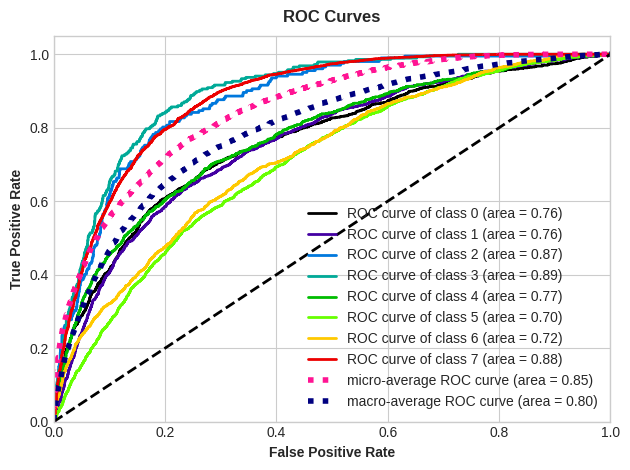

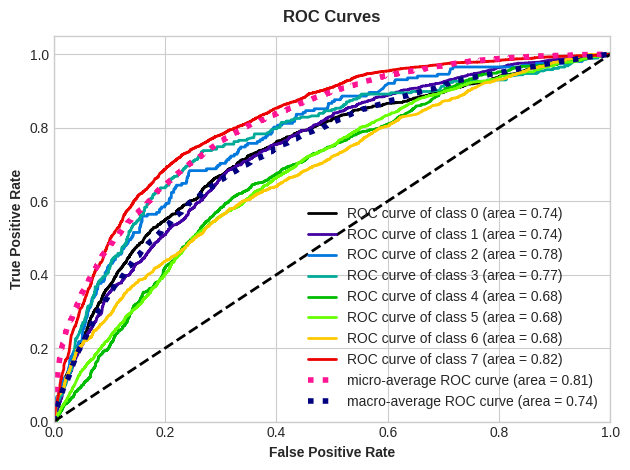

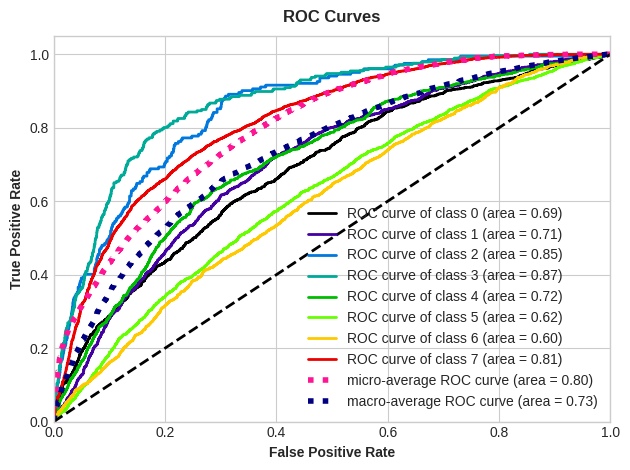

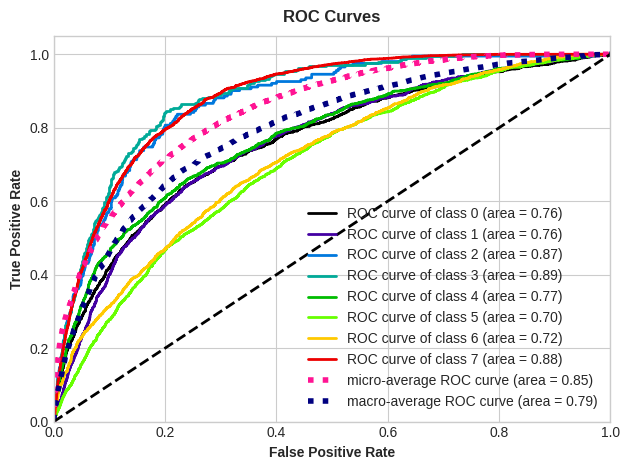

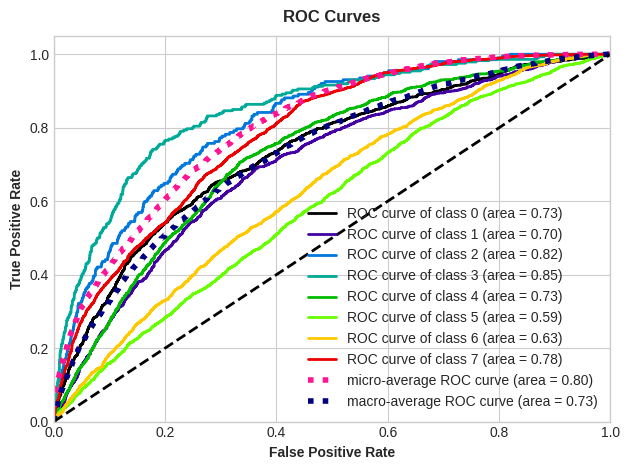

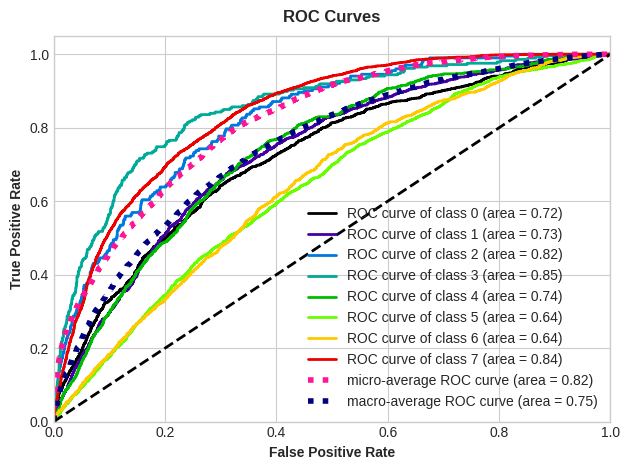

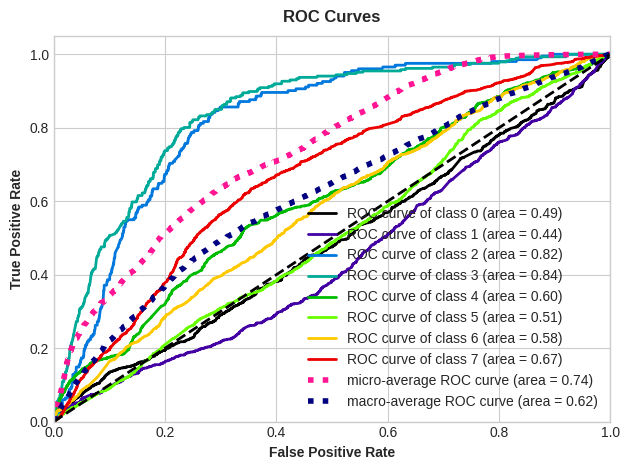

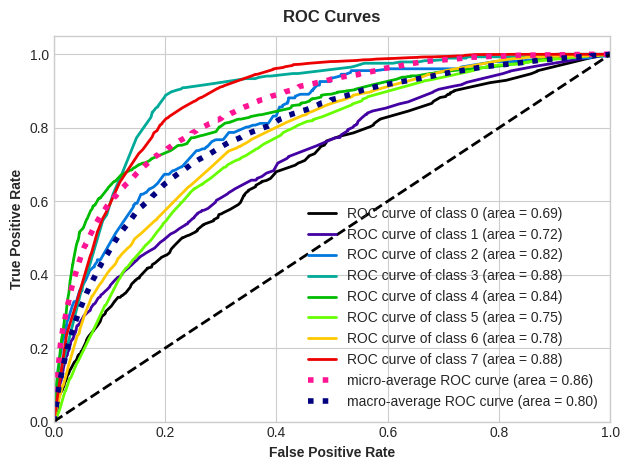

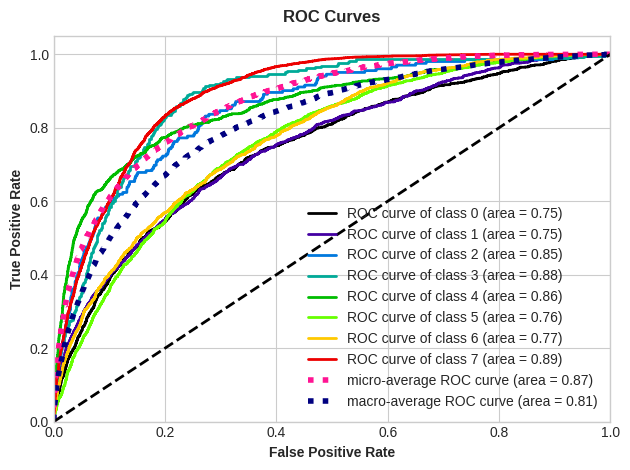

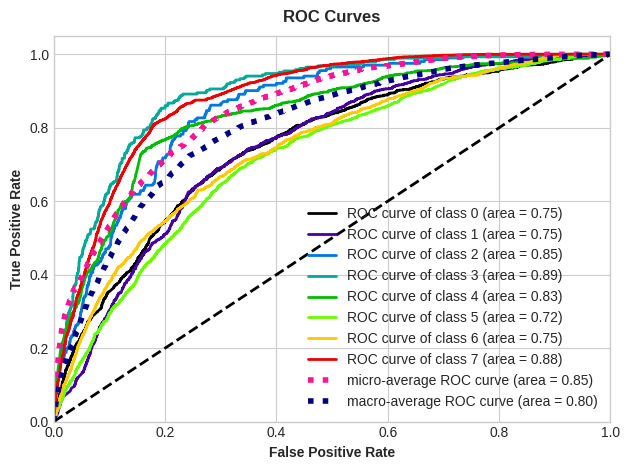

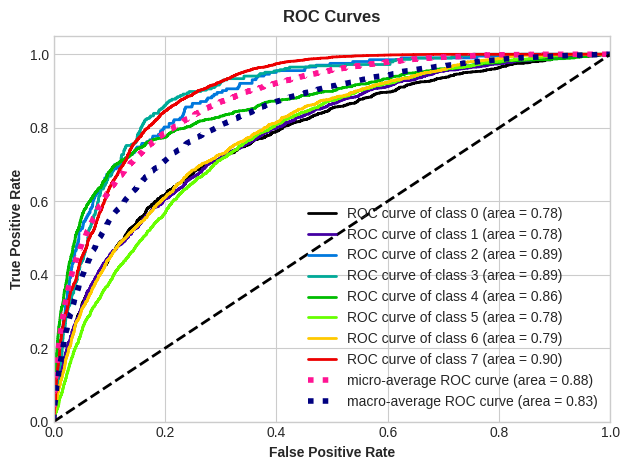

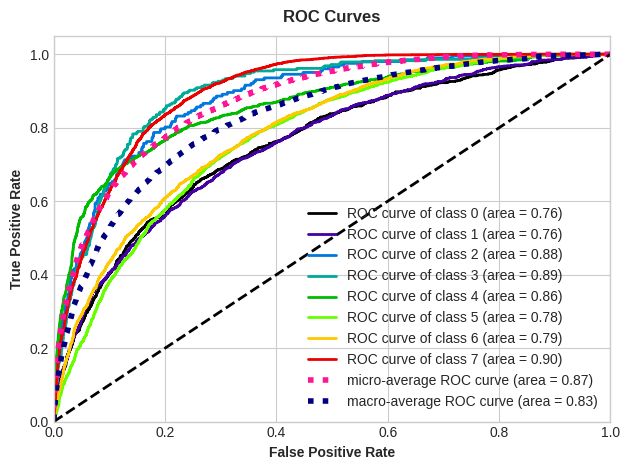

In [76]:
# For each model, plot an Receiver Operating Characteristic (ROC) curve to display model performance - TP rate vs FP rate.

for y_val_predprobs in Valid_PredProbs:
    plot_roc(y_val, y_val_predprobs)

As shown in the charts above, each model has a wide range of AUC values against each class, indicating a varying degree of sensitivity/specificity across the dataset. The two highest average AUC values were achieved by the gradient boosting classifiers (**model 11**: macro-average AUC=0.84, and **model 12**: macro-average AUC=0.83).

It is also worth noting that both of these models performed best when predicting applicants for classes 3/4/8, as indicated by the high AUC scores (~0.9) for their respective ROC curves, whereas they perform slightly worse when classifying applicants into the remaining groups.

### 5.1.2 Classification Reports (Precisions/Recalls/F1-Scores)

In [77]:
# For each model, print a Classification Report to display model performance - Precision/Recall/F1-score/Accuracy.

for y_val_preds in Valid_Preds:
    print(classification_report(y_val, y_val_preds))

              precision    recall  f1-score   support

           0       0.40      0.29      0.34      1242
           1       0.38      0.23      0.29      1310
           2       0.30      0.01      0.03       202
           3       0.43      0.01      0.02       286
           4       0.40      0.30      0.34      1087
           5       0.36      0.40      0.38      2246
           6       0.43      0.23      0.30      1605
           7       0.58      0.90      0.71      3898

    accuracy                           0.49     11876
   macro avg       0.41      0.30      0.30     11876
weighted avg       0.45      0.49      0.44     11876

              precision    recall  f1-score   support

           0       0.31      0.29      0.30      1242
           1       0.33      0.17      0.22      1310
           2       0.28      0.05      0.09       202
           3       0.00      0.00      0.00       286
           4       0.00      0.00      0.00      1087
           5       0.30 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.27      0.33      0.30      1242
           1       0.24      0.13      0.17      1310
           2       0.60      0.01      0.03       202
           3       0.26      0.13      0.17       286
           4       0.23      0.12      0.16      1087
           5       0.27      0.14      0.18      2246
           6       0.35      0.00      0.01      1605
           7       0.45      0.91      0.61      3898

    accuracy                           0.39     11876
   macro avg       0.34      0.22      0.20     11876
weighted avg       0.34      0.39      0.30     11876

              precision    recall  f1-score   support

           0       0.29      0.23      0.26      1242
           1       0.25      0.25      0.25      1310
           2       0.25      0.05      0.08       202
           3       0.29      0.12      0.17       286
           4       0.21      0.09      0.13      1087
           5       0.29 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

              precision    recall  f1-score   support

           0       0.39      0.08      0.13      1242
           1       0.40      0.11      0.17      1310
           2       0.00      0.00      0.00       202
           3       0.25      0.15      0.19       286
           4       0.49      0.32      0.39      1087
           5       0.35      0.54      0.42      2246
           6       0.45      0.07      0.13      1605
           7       0.54      0.92      0.68      3898

    accuracy                           0.47     11876
   macro avg       0.36      0.27      0.26     11876
weighted avg       0.44      0.47      0.39     11876

              precision    recall  f1-score   support

           0       0.49      0.19      0.27      1242
           1       0.50      0.21      0.30      1310
           2       0.00      0.00      0.00       202
           3       0.36      0.01      0.03       286
           4       0.54      0.53      0.53      1087
           5       0.40 

As shown in the summary tables above, each model has a wide range of precision/recall values against each class, indicating a varying degree of accuracy across the dataset.

In terms of precision, each of the models display somewhat mediocre performance for each class, with the highest value consistently belonging to class 8. Each model also consistently shows very high recall for class 8, and poorer values against the other groups. The same trend can also be observed for F1-score, indicating that the models are strongly fitted towards predicting applicants in class 8 as we would expect (given that they represent the largest class in our dataset).

It is interesting to observe that, for class 3, **model 11**'s precision/recall/F1-score values are equal to 0, which means that it did not correctly predict any applicants for this risk rating. On the other hand, **model 12** showed a precision of 0.27, a recall of 0.05 and an F1-score of 0.08. However, as will be discussed further in the next section, this does not necessarily mean that model 11 is wholly inaccurate and should not be trusted altogether.

Finally, it is important not to judge the models too severely based on their precision/recall/F1-scores alone. These are typically harsh metrics that can indicate where models are strongly under/overfitting as they evaluate accuracy in a "one vs. rest" fashion - if the set of possible Response values was much smaller instead, e.g. by grouping together classes 1-8 into Low/Med/High-risk, then each model's performance would appear to significantly improve.

### 5.1.3 Confusion Matrices

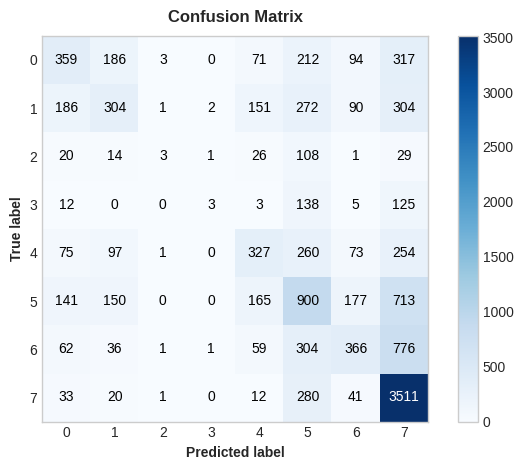

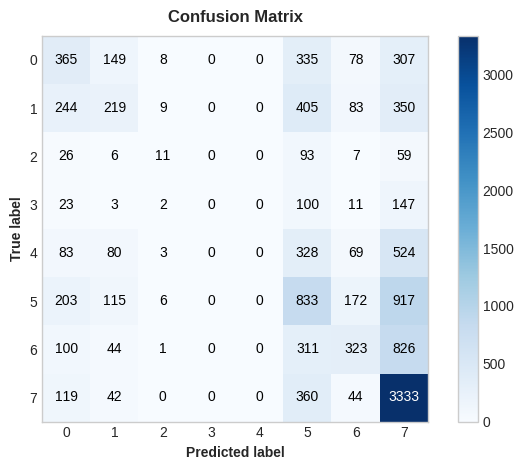

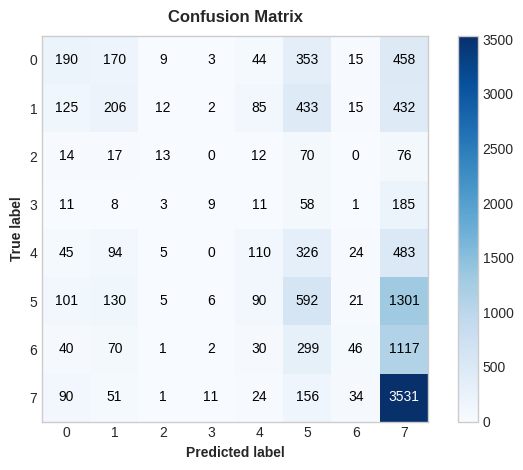

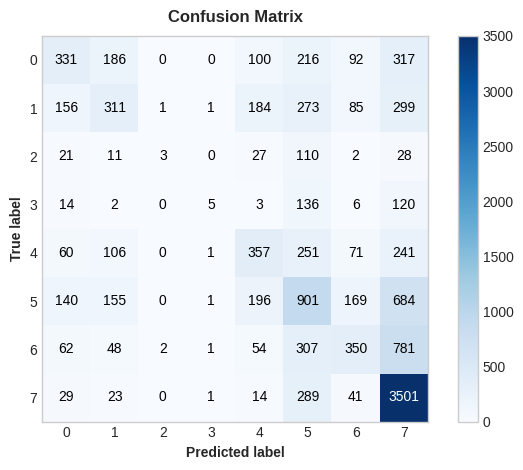

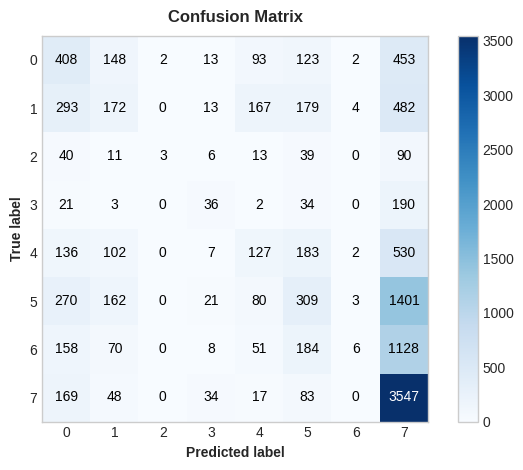

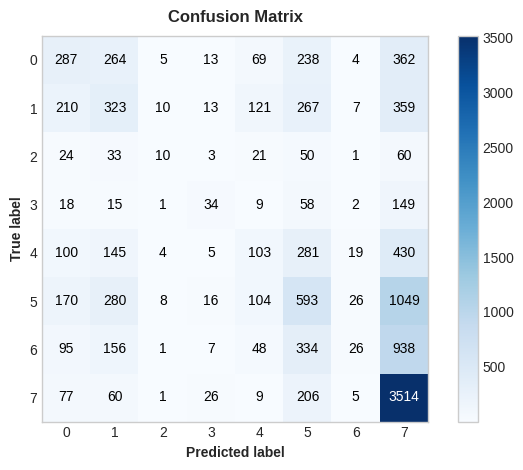

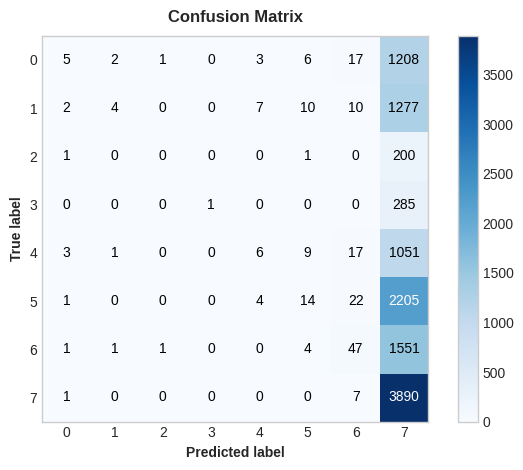

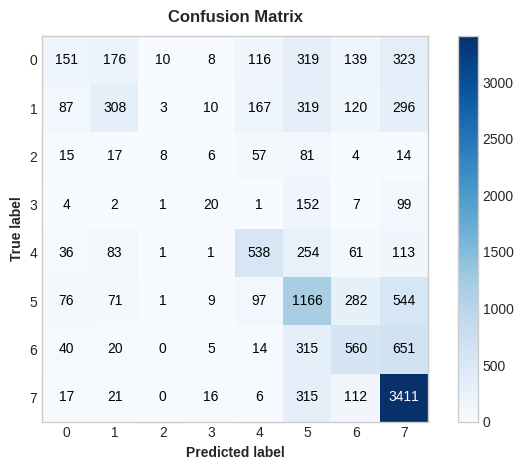

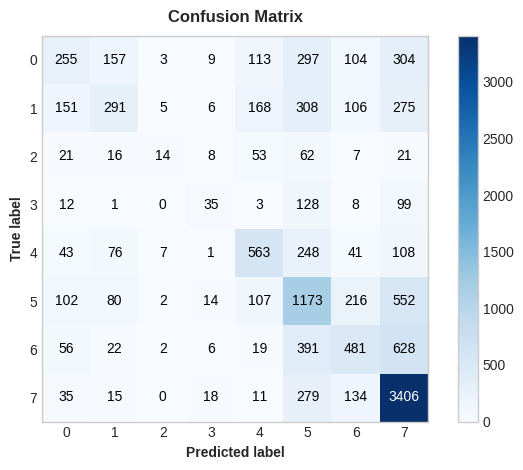

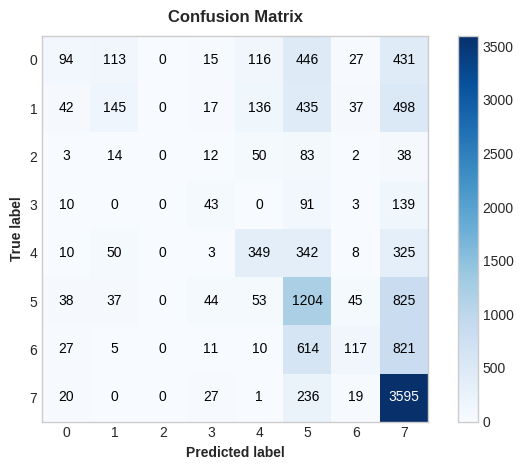

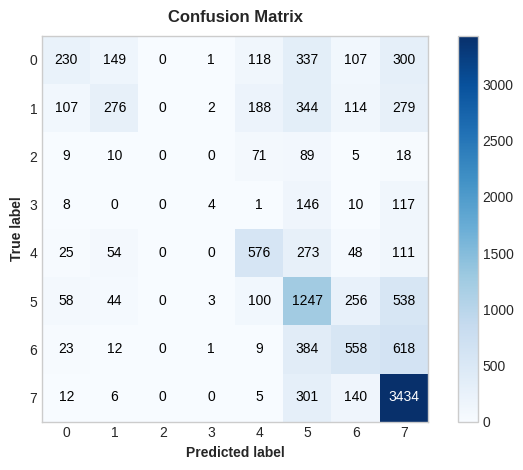

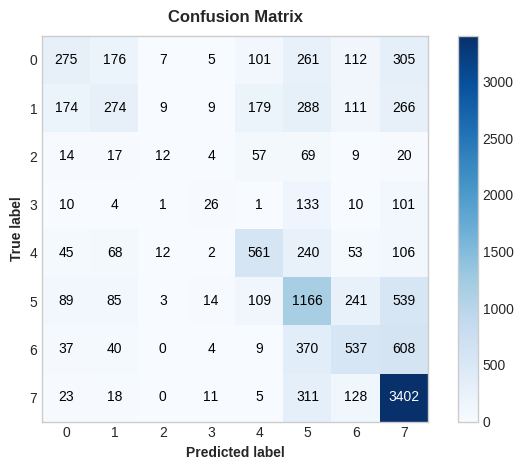

In [79]:
# For each model, plot a Confusion Matrix to display model performance - True labels vs False labels.

for y_val_preds in Valid_Preds:
    plot_confusion_matrix(y_val, y_val_preds)

The confusion matrices above have been assembled in order to visualise how each model's predictions map to the true set of labels available in the test dataset. These plots help to illustrate as to whether the model has become overfitted to any particular classes in the dataset, or whether they remain sufficiently generalised and capable of sensibly classifying applicants.

From the plots above, most appear to be fairly well-fitted to the data, in that they are capable of replicating the distribution of Response values (shown earlier above in Step 1) reasonably well. We can also see that a majority of the missed cases are in fact relatively close to where they should be (e.g. predicted as class 8, was actually class 7). However, there are some notably underperforming models which appear to be highly overfitted towards predicting applicants as belonging to class 8 (which represents the largest proportion across all applicants in the dataset). The confusion matrix for **model 7** (SVC with sigmoid kernel) demonstrates this trait extremely well, which shows that only a tiny proportion of predictions were made in any other class apart from 8. **Models 3 and 5** (SVCs with linear and polynomial kernels, respectively) also demonstrate this trend to a lesser extent as well.

**Models 11 and 12**, on the other hand, appear to generalise reasonably well to the dataset, mimicking the distribution plot shown in Step 1. Furthermore, the only notable drawback of these models that can be observed is that they tend to predict some low-risk applicants (e.g. classes 1-2) as high-risk applicants (e.g. classes 6-8) with a higher than expected frequency - see the top-right corners of each plot. In terms of using either of these models in a real-world business scenario, this would only mean that more effort/time is potentially wasted on scrutinising low-risk applicants further before offering a policy, rather than treating high-risk applicants with a light touch and introducing unnecessary risk into the insurer's portfolio.

### 5.1.4 Balanced Accuracy Scores


Here, we calculate the balanced accuracy score of each model, by comparing their predictions against the known set of results in the validation dataset. This can be derived as the arithmetic mean of the recalls of each class.

It is important to note that, following similar logic to what has already been mentioned above, this metric is also harsh in that it categorises the predictions in a 'one-vs-rest' fashion - this does not adequately reflect the level of difficulty in correctly classifying each applicant with the exact rating they were given in the validation dataset.

We can derive the balanced accuracy scores of each model as follows:

In [80]:
BalancedAccScores = []

# Calculate the balanced accuracy score for each model's set of predictions.
for y_val_preds in Valid_Preds:
    BalancedAccScore = balanced_accuracy_score(y_val, y_val_preds)
    BalancedAccScores.append(BalancedAccScore)

# Collect all Balanced Accuracy scores in a single dictionary.
BalancedAccScoreResults_y_val   = {'Model1_Calibrated': BalancedAccScores[0],
                                   'Model2_Calibrated': BalancedAccScores[1],
                                   'Model3_Calibrated': BalancedAccScores[2],
                                   'Model4_Calibrated': BalancedAccScores[3],
                                   'Model5_Calibrated': BalancedAccScores[4],
                                   'Model6_Calibrated': BalancedAccScores[5],
                                   'Model7_Calibrated': BalancedAccScores[6],
                                   'Model8_Calibrated': BalancedAccScores[7],
                                   'Model9_Calibrated': BalancedAccScores[8],
                                   'Model10_Calibrated': BalancedAccScores[9],
                                   'Model11_Calibrated': BalancedAccScores[10],
                                   'Model12_Calibrated': BalancedAccScores[11]}

# Select the model with the highest Balanced Accuracy.
Model_LowestBalancedAccScore_Valid = max(BalancedAccScoreResults_y_val, key=BalancedAccScoreResults_y_val.get)
print(Model_LowestBalancedAccScore_Valid)

Model9_Calibrated


## 5.2 Select Final Model

Assess & determine the best performing model, based on the metrics discussed above

In the section above, we considered a variety of performance-based factors that are commonly involved in choosing the best model to use for generating a final set of predictions.

Based on the discussions above RE: ROC Curve/Confusion Matrix/Balanced Accuracy Score analyses, we select Model 12 (XGBClassifier) as the best performing model to be used for testing purposes.

In [90]:
# Designate model 12 (XGBClassifier) as the best performing model of the cohort.
BestModel = Model12_Calibrated

## 5.3 Predict using final model (using test data)

Generate predictions/probability estimates using the best model (using test data)

Using the best performing model as determined above, we can now generate a set of test predictions which will be used to evaluate/review the model's performance on unseen data.

In [91]:
# Use the best performing model to generate predictions (as probability estimates) on the test dataset.
BestModel_Test_PredProb = BestModel.predict_proba(X_test_L1reg)

## Convert the probability estimates into label-encoded predictions, then convert back to the original set of classes.
BestModel_Test_Preds = np.argmax(BestModel_Test_PredProb, axis=1)
BestModel_Test_Classes = BestModel.classes_
BestModel_Test_Preds = [BestModel_Test_Classes[i] for i in BestModel_Test_Preds]
BestModel_Test_Preds = le.inverse_transform(BestModel_Test_Preds)

## 5.4 Evaluate performance of final model (using test data)

In the section below, we will review how the selected model has performed in terms of classifying applicants into each Response group, based on the test dataset.

In [92]:
# Convert the test dataset's encoded labels (0-7) back to the original set of classes (1-8), for clearer reviews of model performance.
y_test = le.inverse_transform(y_test)

# Create a duplicate copy of the model's predicted labels.
Test_Preds = BestModel_Test_Preds

# Create a duplicate copy of the model's prediction probabilities.
Test_PredProbs = BestModel_Test_PredProb

### 5.4.1 ROC Curve

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

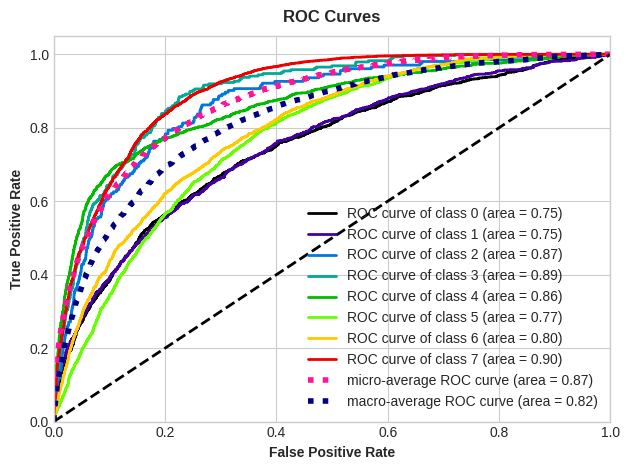

In [93]:
# Plot the ROC curve to display the selected model's performance - TP rate vs FP rate.
plot_roc(y_test, Test_PredProbs)

As shown in the chart above, the `XGBClassifier` model features a similarly broad range of AUC values against each class, indicating a varying degree of sensitivity/specificity across the dataset. Furthermore, the model has also performed relatively strongly when predicting applicants for classes 3/4/8, as indicated by the high AUC scores (~0.9) for their respective ROC curves - this is a good sign that our model is still able to generalise well, even when handling previously unseen data.

### 5.4.2 Classification Report (i.e. Precision/Recall/F1-Score)

In [94]:
# Print a Classification Report to display the selected model's performance - Precision/Recall/F1-score/Accuracy.

print(classification_report(y_test, Test_Preds))

              precision    recall  f1-score   support

           0       0.41      0.20      0.26      1241
           1       0.42      0.22      0.29      1310
           2       0.11      0.02      0.03       203
           3       0.26      0.07      0.11       286
           4       0.53      0.52      0.53      1086
           5       0.41      0.51      0.45      2247
           6       0.45      0.34      0.39      1606
           7       0.64      0.88      0.74      3898

    accuracy                           0.53     11877
   macro avg       0.40      0.34      0.35     11877
weighted avg       0.49      0.53      0.49     11877



As shown in the classification report above, the model shows a broad range of precision/recall/F1-score values against each class, indicating a varying degree of accuracy across the dataset and emphasising how the model has been generally well-fitted towards the most important Response groups. The model still appears to perform best when predicting for class 8 applicants, as evidenced by the relatively higher precision/recall/F1-score values for this group.

### 5.4.3 Confusion Matrix

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

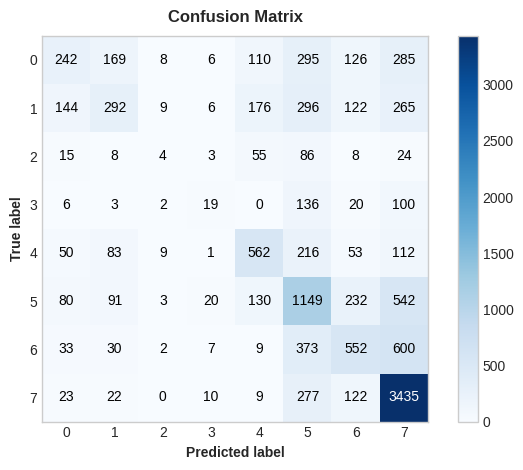

In [95]:
# Plot a Confusion Matrix to display the selected model's performance - True labels vs False labels.

plot_confusion_matrix(y_test, Test_Preds)

From the confusion matrix above, it is clear that the model has performed on the test dataset very similarly to the validation scenario discussed earlier above. Furthermore, the model has also been relatively successful in replicating the Response distribution shown earlier in Step 1,

Any off-diagonal hotspots (representing notable proportions of incorrect predictions) have already been revealed as part of the model validation process earlier above - so this should not come as a huge surprise. The important thing to note is that, with the exception of the observations in the top-right corner (where the model has predicted higher risk levels than required), the model appears to be well-fitted towards handling a multitude of applicants with varying levels of risk.

### 5.4.4 Balanced Accuracy Score

Finally, we can calculate the balanced accuracy score of the selected model, using the test dataset:

In [87]:
# Calculate the balanced accuracy score for the selected model.
BalancedAccScore_y_test = balanced_accuracy_score(y_test, Test_Preds)

print(BalancedAccScore_y_test)

0.34472735941868105


# 6. XAI

Review model performance in the context of "feature importance" and explainability.

In the section above, we considered how well the model has performed against a number of key metrics such as ROC-AUC scores and precisions/recalls. However, we also need to think about how the model's decisions/behaviour can be explained in a clear and consistent manner - this is important in a real-world scenario from both a legal and ethical perspective, as we are assessing the prospective risk levels of numerous applicants for life insurance policies. Agreeing/rejecting applicants on insufficient/incorrect grounds could otherwise lead to reputational/financial damages.

In this section, we will now consider:

* what features have the biggest impact on the `XGBClassifier` model's predictions, and
* how the `XGBClassifier` model has generated its predictions based on the values of the most important features.

## 6.1 Feature Importances

Firstly, we will take a look at the XGBClassifier a bit more closely, in order to understand what features the model values most highly.

In [97]:
# Review the feature importances of the XGBoost classifier.

FeatureImportances_BestModel = BestModel.estimator.feature_importances_
print(FeatureImportances_BestModel)

[0.02962677 0.00549039 0.01174553 0.04689321 0.01466229 0.00429588
 0.0045532  0.01748632 0.02984915 0.01626327 0.00678037 0.01859754
 0.0054375  0.00530047 0.01373699 0.01150078 0.00572414 0.1284729
 0.00639807 0.0130651  0.01570216 0.00403922 0.00507401 0.01028776
 0.0142527  0.00990891 0.16276564 0.00562569 0.01219341 0.01538336
 0.00583326 0.03163917 0.00972926 0.01405321 0.00499007 0.00951086
 0.04225305 0.00477418 0.08690244 0.05934878 0.01290899 0.00608523
 0.00655162 0.00396254 0.01752653 0.00538595 0.00380044 0.00636886
 0.00570582 0.0057692  0.00578775]


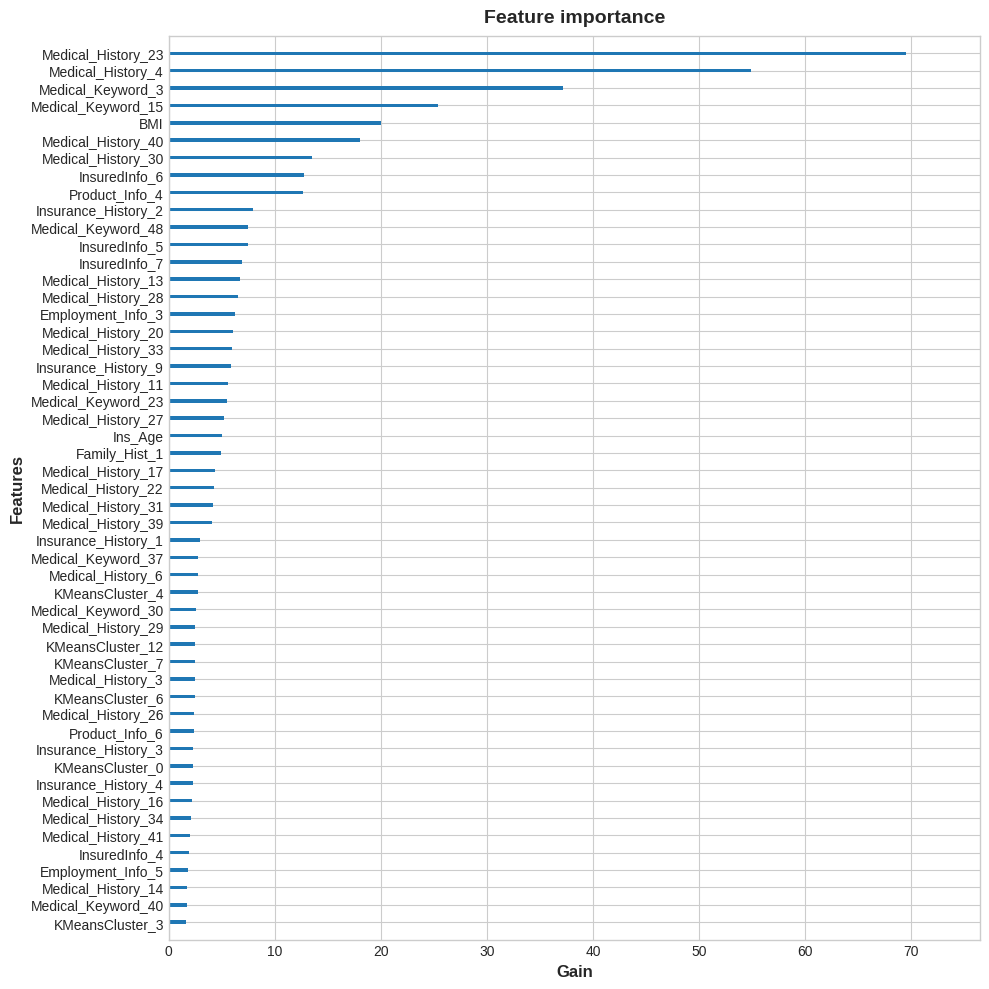

In [98]:
from xgboost import plot_importance

# Generate a Feature Importance plot using the selected model.

fig, ax = plt.subplots(figsize=(10, 10))
plot_importance(BestModel.estimator,
                importance_type="gain",
                xlabel="Gain",
                show_values=False,
                ax=ax)
plt.show()

The Gain chart above demonstrates the relative contribution of each feature to the model - which is calculated by taking each feature's contribution for each decision tree that is used in the model.

This plot shows that the top five most important features (in terms of Gain/model contribution) are:

* `Medical_History_23`,
* `Medical_History_4`,
* `Medical_Keyword_3`,
* `Medical_Keyword_15`, and
* `BMI`.

Interestingly, these five features were also highly ranked within the Mutual Information score chart (see Step 7 earlier above), which lends some credibility to the view that these features may be closely involved in governing what risk rating an applicant should be assigned.

The bottom five (i.e. least important) features in terms of Gain are:

* `Medical_History_34`,
* `Product_Info_2_E1`,
* `KMeansCluster_4`,
* `Insurance_History_8`, and
* `Medical_History_41`.

Four of these five features were also poorly ranked within the MI score chart shown in Step 7, however KMeansCluster_4 was instead moderately ranked (residing within the top 15 features). This implies that, whilst `KMeansCluster_4` was initially deemed to show some potential in terms of predictive power, the `XGBClassifier` does not value this feature as highly when generating predictions for the test dataset.

## 6.2 Permutation Importance

Next, we can review how the model handles random column-wise reordering of data - performing what is more commonly known as permutation importance analysis - to see which features increase the volatility of our model's predictions upon random shuffling (and hence, which features the model relies on most heavily for generating predictions).

To do this, we will calculate the permutation importance weights using our test dataset, as shown below:

In [100]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=38d855c8b47c23613541e61f4f2fd6a2fe7a0092377629887f86375e312a8470
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [101]:
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

# Calculate the Permutation Importances of the selected model.

perm = PermutationImportance(BestModel.estimator, random_state=0).fit(X_test_L1reg, y_test)

In [102]:
# Show the Permutation Importance weights (plus errors) of the top 20 features.

show_weights(perm, feature_names=X_test_L1reg.columns.tolist())


The values towards the top of the table are the most important, and those towards the bottom matter the least.

Here, the top five features that appear to have the strongest impact on the model's performance/accuracy when shuffled randomly are:

* `Medical_Keyword_3`
* `Medical_History_39`
* `InsuredInfo_5`
* `Product_Info_2_D1`
* `Medical_History_17`

Most of these features were also highlighted as having the highest feature importances in the section above. Interestingly, `Medical_History_23` (the highest scored feature in terms of Feature Importance) does not show up in the top 20 permutation importance weightings - this could imply that this feature does not have any meaningful causational relationship with Response, and has unintentionally been given higher importance due to possible overfitting.

More information on the topic of comparing tree-based feature importances against permutation importances can be found at the following page: [Relation to impurity-based importance in trees - scikit-learn](https://scikit-learn.org/stable/modules/permutation_importance.html#relation-to-impurity-based-importance-in-trees).

### 6.2.1 SHAP Values

The SHAP framework (acronym derived from **SH**apley **A**dditive ex**P**lanations) is excellent for breaking down predictions in order to show the impact of each feature. This is especially useful for when we want to explain how/why we have classified certain applicants who may have demonstrated high/low risk potential.

The advantage that this approach has over calculating permutation importances alone, is that SHAP values can express whether a feature has a broad effect across all predictions, or whether its effect is more localised for a handful of predictions and negligible in general; permutation importance simply captures the "average" impact of each feature.

Here, we will calculate the SHAP values for the test dataset to visualise how the XGBClassifier model has behaved, based on the values of the most important features.

In [105]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.8 MB/s eta 0:00:00


In [110]:
import shap

# Initialise the explainer object in order to calculate SHAP values.
explainer = shap.TreeExplainer(BestModel.estimator)

# Calculate SHAP values for the whole test dataset.
shap_values = explainer.shap_values(X_test_L1reg)

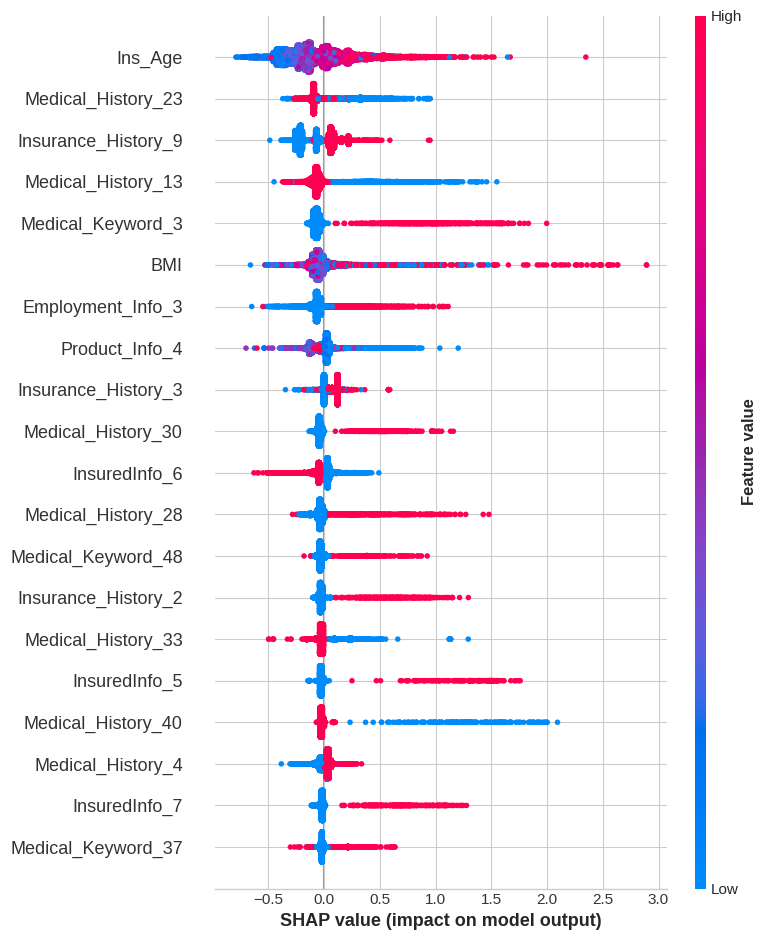

In [111]:
# Create a summary plot of the SHAP values.
# shap.summary_plot(shap_values, X_test_L1reg)

# Select the SHAP values for the first class/cluster if necessary
shap_values_class0 = shap_values[:,:,0]

# Create a summary plot for the first class/cluster
shap.summary_plot(shap_values_class0, X_test_L1reg)

The SHAP summary plot above provides us with a top-down view of feature importance, for the top 20 features as calculated via the SHAP framework. The colour of each dot represents whether that feature was high or low (for that row in the dataset), and its horizontal location shows whether the effect of that value caused a higher (towards 8) or lower (towards 1) prediction.

For instance, the `BMI` feature clearly expresses that as the BMI of the applicant increases, then their predicted risk rating also increases strongly. As another example, `Product_Info_2_A6` - i.e. whether the applicant's selection for `Product_Info_2` is equal to *A6* - shows a clear negative correlation with the predicted risk rating.

However, there are also a couple of other interesting cases to note - for example, `Ins_Age` shows a negative correlation when away from the baseline value (class 5) but is more mixed as the value approaches the baseline. `Family_Hist_4` appears to show a mixed effect on the value of `Response` regardless of the choice of class.

### 6.2.2 SHAP Dependence Plots

We can also review individual features more closely, by creating SHAP dependence contribution plots.

These are extremely helpful for displaying what the distribution of effects is, and linking this to a model's predictions.

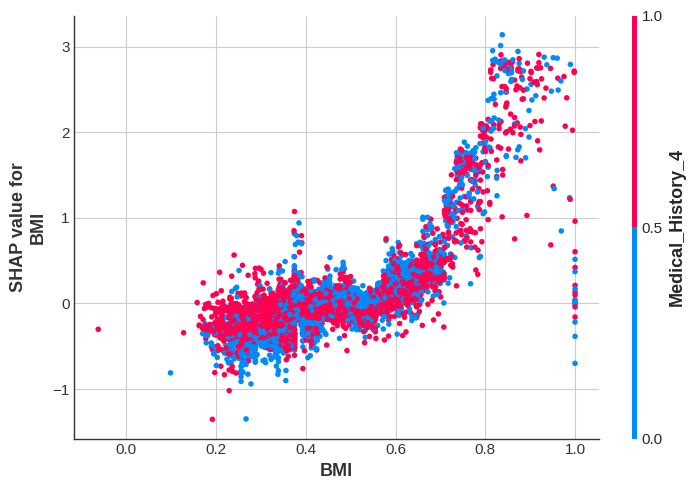

In [114]:
# Create a SHAP Dependence plot of the highest ranked feature - "BMI".

# shap.dependence_plot("rank(0)", shap_values[1], X_test_L1reg)
#shap.dependence_plot("rank(0)", shap_values[:, :, 0], X_test_L1reg)
shap.dependence_plot("rank(0)", shap_values[:, :, 1], X_test_L1reg)

Here, we have generated a SHAP dependence contribution plot for `BMI` as a function of `Ins_Age`. The horizontal location of each dot represents the actual value from the test dataset, and the vertical location represents the impact (on the prediction) of having that value.

The shape of the plot indicates that, once BMI exceeds 0.7, the distribution slopes sharply upwards - inferring that the likelihood of being assigned to a higher risk rating greatly increases after this point. However, as `BMI` approaches 1.0, the distribution then quickly slopes downwards. The drastic increase in the distribution's spread as the feature value approaches 1.0 implies that other features begin to interact more strongly with `BMI` at this upper limit.

Upon reviewing the interaction between `BMI` and `Ins_Age` more closely at this upper limit, it appears that on average, younger applicants with high BMIs tend to be assigned higher risk ratings by the model than high-BMI applicants that are more elderly, however more data would be required in order to validate this hypothesis, before any relevant business decisions could be made.

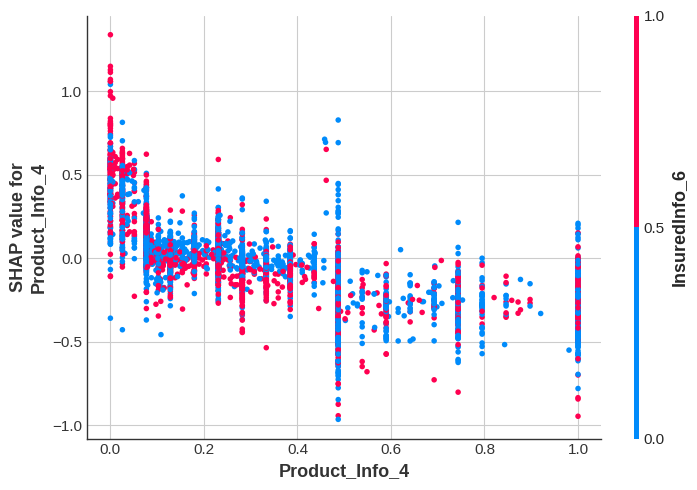

In [116]:
# Create a SHAP Dependence plot of the 2nd highest ranked feature - "Product_Info_4".

#shap.dependence_plot("rank(1)", shap_values[1], X_test_L1reg)
shap.dependence_plot("rank(1)", shap_values[:, :, 1], X_test_L1reg)

The shape of this plot indicates a broad range of interaction between `Product_Info_4` and Response within the test dataset. However, the general trend is that at low values of `Product_Info_4`, the likelihood of being assigned to a higher risk rating is increased - however a couple of notable exceptions to this are when the distribution's spread is at its widest, where `Product_Info_4` is close to either 0.0, 0.5 or 1.0.

The interaction between `Product_Info_4` and `Medical_History_13` seems to vary quite significantly - however a notable trend that can be observed is that, for a given value of `Product_Info_4`, applicants with lower values of `Medical_History_13` tend to be rated as less risky than their counterparts with higher values of `Medical_History_13`. This trend is especially notable when `Product_Info_4` approaches either 0.0, 0.5 or 1.0.

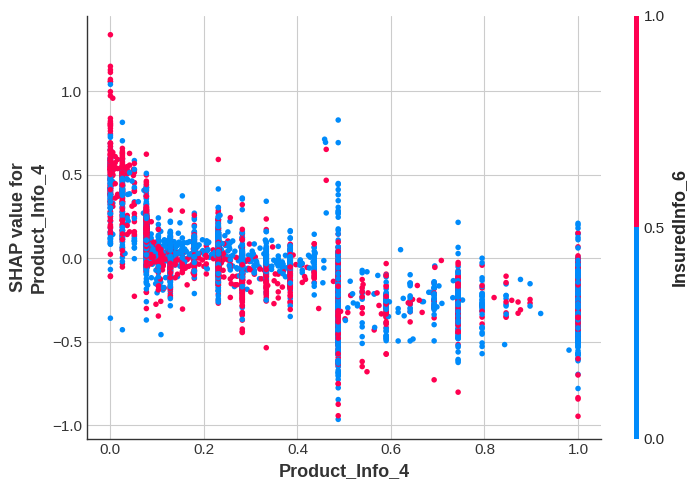

In [121]:
# Create a SHAP Dependence plot of the 3rd highest ranked feature - "Product_Info_2_A6".

# shap.dependence_plot("rank(2)", shap_values[1], X_test_L1reg)



# Select the SHAP values for the 3rd highest ranked feature (index 2) for all samples
#shap_values_for_feature = shap_values[:, 2, :]

# Take the mean SHAP value across different models (if applicable)
#shap_values_mean = np.mean(shap_values_for_feature, axis=1)

#shap.dependence_plot("rank(2)", shap_values_mean, X_test_L1reg)



# Calculate the mean absolute SHAP values across all samples and models
mean_abs_shap = np.mean(np.abs(shap_values), axis=(0, 2))

# Get the index of the 3rd highest ranked feature
ind = np.argsort(-mean_abs_shap)[2]

# Use the calculated index for the dependence plot
shap.dependence_plot(ind, shap_values[:, :, 1], X_test_L1reg)

The error message "IndexError: index 2 is out of bounds for axis 0 with size 1" suggests that you're trying to access an element at index 2 of an array that only has one element along axis 0. This is happening within the convert_name function of the shap library, which is used to determine the feature index based on the provided "rank(2)" string.

The issue likely stems from the shape of your shap_values array. The traceback and global variables show that shap_values is a 3D array with shape (11877, 51, 8). However, the convert_name function expects the mean of absolute SHAP values along axis 0 to have at least 3 elements to be able to access index 2. This indicates that after taking the mean of absolute values, you might end up with an array with a single element, causing the index error.

**Explanation:**

Calculate Mean Absolute SHAP Values: We calculate the mean of absolute SHAP values across both samples (axis 0) and models (axis 2) to get a 1D array representing the average impact of each feature.
Find Index of 3rd Highest Ranked Feature: We sort the mean absolute SHAP values in descending order and take the index at position 2 (remember Python uses zero-based indexing) to find the index of the third most important feature.
Use Calculated Index: Instead of using "rank(2)", we directly pass the calculated index ind to the shap.dependence_plot function, ensuring you're referencing the correct feature.

This plot displays that, when the applicant's selection for `Product_Info_2` is equal to **A6**, the predicted risk rating is generally much lower on average (as already mentioned in the summary plot), whereas if it is not equal to **A6** then the risk rating is extremely likely to stay at the baseline (class 5).

Although it is difficult to spot visually, `Product_Info_2_A6` does also show some interaction with `Medical_Keyword_3`. In cases where Product_Info_2_A6 feature is equal to 1.0, applicants with lower values of `Medical_Keyword_3` tend to shift the model's predictions away from class 1, and slightly closer towards class 2.

# Conclusion

## Areas of Improvement¶


Whilst this project has aimed to showcase an implementation of the DS/ML workflow in an insurance-based context, it does not aim to provide a comprehensive "A-Z" approach on how to apply ML techniques for the risk classification of insurance applicants. There are, however, a couple of areas where this project could be improved.

For example, in terms of **model performance**:

* The aim of this project has been to establish an ML model that is capable of accurately predicting risk ratings (split between 8 different categories) for insurance applicants. However, as this involves working with a fairly complex dataset with a wide range of features, the model has not been fully able to capture every single nuance within the dataset, and has instead generalised to predict across the entire distribution to a reasonable degree of accuracy. Therefore, the model may actually prove to be more useful for business purposes if it was instead assigned to predict based on broader sets of risk bandings (e.g. classes 1-3 could be grouped together into Low, classes 4-6 into Medium, and classes 7-9 into High). Then, further refinement of these initial groupings could be made by assembling another layer of classifiers that are specifically trained on datasets that are representative of each risk banding (e.g. another model specifically trained for performing further segmentation of low-risk applicants).

In terms of **feature engineering**:

* As this dataset's feature names have been anonymised, it has not been possible to incorporate "business logic"-driven feature engineering directly into the model preparation process. However, potential interactions between features could still be studied further during EDA in order to produce new features that take advantage of statistical correlations within the dataset. With the assistance of an "unanonymised" dataset as well as the input of subject matter expertise, it may be possible to create more predictive features and validate them for use in production.

Lastly, in terms of **feature selection**:

* More stringent and quantitative-based approaches could have been used, in order to combine the methods employed for selecting the list of features that would be supplied to each model during the training process. For clarity, whilst we used Mutual Information/Variance Inflation Factor/Principal Component analysis techniques to display how the importance of each feature varied throughout the dataset, we only relied on Lasso regularisation in order to produce the final cut of selected features. It may be worth considering the use of a "voting system" in order to select features based on how they are ranked across each of the techniques used, so that one technique alone does not provide a final view.